In [1]:
import pandas as pd
import numpy as np

In [2]:
credits = pd.read_csv('C:/Users/Administrator/Desktop/ML/tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
movies  = pd.read_csv('C:/Users/Administrator/Desktop/ML/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
credits.shape, movies.shape

((4803, 4), (4803, 20))

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
#lets try to extract some features from credits first
import json

def load_tmdb_credits(df):
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

data = load_tmdb_credits(credits)

In [10]:
data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [13]:
#lets check
len(data['cast'][0])

83

In [4]:
data['total_cast'] = [len(data['cast'][i]) for i in data.index]
data['total_crew'] = [len(data['crew'][i]) for i in data.index]

data.head()

,movie_id,title,cast,crew,total_cast,total_crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",83,153
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",34,32
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",83,155
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",158,217
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",27,132


In [15]:
credits['cast'].iloc[0]
#so lets create a feature with gender male & female

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [5]:
fc = []
mc = []

for i in data['cast']:
    m_count = 0
    f_count = 0
    for j in i:
        if j['gender'] == 1:
            f_count = f_count + 1
        elif j['gender'] == 2:
            m_count = m_count + 1
    fc.append(f_count)
    mc.append(m_count)

data['male_count']   = mc
data['female_count'] = fc

data.head()

,movie_id,title,cast,crew,total_cast,total_crew,male_count,female_count
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",83,153,20,12
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",34,32,25,5
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",83,155,55,13
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",158,217,73,11
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",27,132,19,6


In [21]:
credits['crew'].iloc[0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [6]:
dept = []
for i in data['crew'].head(1):
    for c in i:
        dept.append(c['department'])
ser = pd.Series(dept,index=None)
ser_list = ser.unique().tolist()
ser_list[0]

'Editing'

In [7]:
ser_list

['Editing',
 'Art',
 'Sound',
 'Production',
 'Directing',
 'Writing',
 'Visual Effects',
 'Costume & Make-Up',
 'Camera',
 'Crew',
 'Lighting']

In [12]:
ser.value_counts()

Crew                 38
Art                  32
Visual Effects       26
Costume & Make-Up    15
Sound                13
Production            9
Editing               8
Camera                6
Lighting              3
Writing               2
Directing             1
dtype: int64

In [45]:
#just testing
data_test = data.head(1)

ser_list

['Editing',
 'Art',
 'Sound',
 'Production',
 'Directing',
 'Writing',
 'Visual Effects',
 'Costume & Make-Up',
 'Camera',
 'Crew',
 'Lighting']

In [48]:
import warnings
warnings.filterwarnings('ignore')

editing = []
art     = []
sound   = []
prod    = []
dire    = []
writing = []
effects = []
makeup  = []
camera  = []
crew    = []
lighting= []
for i in data['crew']:
    Editing = 0
    Art=0
    Sound=0
    Production=0
    Directing=0
    Writing=0
    Visual_Effects=0
    Costume_Make_Up=0
    Camera=0
    Crew=0
    Lighting = 0
    

    
    for c in i:
        
        if c['department']   == ser_list[0]:
            Editing      = Editing + 1
        elif c['department'] == ser_list[1]:
            Art          = Art     + 1
        elif c['department'] == ser_list[2]:
            Sound        = Sound   + 1
        elif c['department'] == ser_list[3]:
            Production=Production+ 1
        elif c['department'] == ser_list[4]:
            Directing    = Directing   + 1
        elif c['department'] == ser_list[5]:
            Writing      = Writing     + 1
        elif c['department'] == ser_list[6]:
            Visual_Effects= Visual_Effects    + 1
        elif c['department'] == ser_list[7]:
            Costume_Make_Up=  Costume_Make_Up + 1
        elif c['department'] == ser_list[8]:
            Camera       = Camera   + 1
        elif c['department'] == ser_list[9]:
            Crew         = Crew   + 1
        elif c['department'] == ser_list[10]:
            Lighting     = Lighting + 1
        
    editing.append(Editing)
    art.append(Art)
    sound.append(Sound)
    prod.append(Production)
    dire.append(Directing)
    writing.append(Writing)
    effects.append(Visual_Effects)
    makeup.append(Costume_Make_Up)
    camera.append(Camera)
    crew.append(Crew)
    lighting.append(Lighting)

    
    
data['art_count']           = art
data['sound_count']         = sound
data['editing_count']       = editing
data['production_count']    = prod
data['director_count']      = dire
data['writing_count']       = writing
data['visual_count']        = effects
data['makeup_count']        = makeup
data['camera_count']        = camera
data['crew_count']          = crew
data['lighting_count']      = lighting


In [49]:
data.head()

,movie_id,title,cast,crew,total_cast,total_crew,male_count,female_count,art_count,sound_count,editing_count,production_count,director_count,writing_count,visual_count,makeup_count,camera_count,crew_count,lighting_count
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",83,153,20,12,32,13,8,9,1,2,26,15,6,38,3
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",34,32,25,5,4,5,2,8,4,2,0,3,1,3,0
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",83,155,55,13,14,17,4,21,4,8,24,23,15,22,3
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",158,217,73,11,31,20,6,24,5,5,7,27,15,68,9
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",27,132,19,6,28,14,4,15,5,4,5,33,9,13,2


In [51]:
#lets head to other dataframe now
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [52]:
import json

def load_tmdb_credits(df):
    json_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

data_movies = load_tmdb_credits(movies)


In [56]:
data_movies.genres.iloc[2]
#we have multiple genre for one movie

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 80, 'name': 'Crime'}]

In [61]:
gen = []
for i in data_movies['genres']:
    for c in i:
        gen.append(c['name'])

ser      = pd.Series(gen,index=None)
ser_list = ser.unique().tolist()
ser_list

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie']

In [69]:
a     = ser.str.lower()
a_low = a.unique().tolist()
a_low

['action',
 'adventure',
 'fantasy',
 'science fiction',
 'crime',
 'drama',
 'thriller',
 'animation',
 'family',
 'western',
 'comedy',
 'romance',
 'horror',
 'mystery',
 'history',
 'war',
 'music',
 'documentary',
 'foreign',
 'tv movie']

In [71]:
Action= []
Adventure= []
Fantasy= []
Science_Fiction= []
Crime= []
Drama= []
Thriller= []
Animation= []
Family= []
Western= []
Comedy= []
Romance= []
Horror= []
Mystery= []
History= []
War= []
Music= []
Documentary= []
Foreign= []
TV_Movie = []


    
for i in data_movies['genres']:
    action= 0
    adventure= 0
    fantasy= 0
    science_fiction= 0
    crime= 0
    drama= 0
    thriller= 0
    animation= 0
    family= 0
    western= 0
    comedy= 0
    romance= 0
    horror= 0
    mystery= 0
    history= 0
    war= 0
    music= 0
    documentary= 0
    foreign= 0
    tv_movie = 0

    
    for c in i:
        
        if c['name']   == ser_list[0]:
            action      = action + 1
        elif c['name'] == ser_list[1]:
            adventure   = adventure     + 1
        elif c['name'] == ser_list[2]:
            fantasy        = fantasy   + 1
        elif c['name'] == ser_list[3]:
            science_fiction=science_fiction+ 1
        elif c['name'] == ser_list[4]:
            crime    = crime   + 1
        elif c['name'] == ser_list[5]:
            drama      = drama     + 1
        elif c['name'] == ser_list[6]:
            thriller= thriller    + 1
        elif c['name'] == ser_list[7]:
            animation=  animation + 1
        elif c['name'] == ser_list[8]:
            family       = family   + 1
        elif c['name'] == ser_list[9]:
            western         = western   + 1
        elif c['name'] == ser_list[10]:
            comedy     = comedy + 1
        elif c['name'] == ser_list[11]:
            romance        = romance   + 1
        elif c['name'] == ser_list[12]:
            horror = horror+ 1
        elif c['name'] == ser_list[13]:
            mystery    = mystery   + 1
        elif c['name'] == ser_list[14]:
            history      = history     + 1
        elif c['name'] == ser_list[15]:
            war = war    + 1
        elif c['name'] == ser_list[16]:
            music =  music + 1
        elif c['name'] == ser_list[17]:
            documentary       = documentary   + 1
        elif c['name'] == ser_list[18]:
            foreign         = foreign   + 1
        elif c['name'] == ser_list[19]:
            tv_movie     = tv_movie + 1
    
    
    Action.append(action)
    Adventure.append(adventure)
    Fantasy.append(fantasy)
    Science_Fiction.append(science_fiction)
    Crime.append(crime)
    Drama.append(drama)
    Thriller.append(thriller)
    Animation.append(animation)
    Family.append(family)
    Western.append(western)
    Comedy.append(comedy)
    Romance.append(romance)
    Horror.append(horror)
    Mystery.append(mystery)
    History.append(history)
    War.append(war)
    Music.append(music)
    Documentary.append(documentary)
    Foreign.append(foreign)
    TV_Movie.append(tv_movie)

    
data_movies['Actiondata_movies'] = Action
data_movies['Adventuredata_movies']= Adventure
data_movies['Fantasydata_movies']=Fantasy
data_movies['ScienceFictiondata_movies']=Science_Fiction
data_movies['Crimedata_movies']=Crime
data_movies['Dramadata_movies']=Drama
data_movies['Thrillerdata_movies']=Thriller
data_movies['Animationdata_movies']=Animation
data_movies['Familydata_movies']=Family
data_movies['Westerndata_movies']=Western
data_movies['Comedydata_movies']=Comedy
data_movies['Romancedata_movies']=Romance
data_movies['Horrordata_movies']=Horror
data_movies['Mysterydata_movies']=Mystery
data_movies['Historydata_movies']=History
data_movies['Wardata_movies']=War
data_movies['Musicdata_movies']=Music
data_movies['Documentarydata_movies']=Documentary
data_movies['Foreigndata_movies']=Foreign
data_movies['TV_Movies'] = TV_Movie

In [73]:
pd.set_option('display.max_columns', None)
data_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Actiondata_movies,Adventuredata_movies,Fantasydata_movies,ScienceFictiondata_movies,Crimedata_movies,Dramadata_movies,Thrillerdata_movies,Animationdata_movies,Familydata_movies,Westerndata_movies,Comedydata_movies,Romancedata_movies,Horrordata_movies,Mysterydata_movies,Historydata_movies,Wardata_movies,Musicdata_movies,Documentarydata_movies,Foreigndata_movies,TV_Movies
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
#lets drop it for a while
data_movies['keywords'].iloc[0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [76]:
#a text column we could do a bit of NLP on it later
data_movies.overview.iloc[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [89]:
print(len(data_movies.production_companies.iloc[0]))
data_movies.production_companies.iloc[0]

4


[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [97]:
print(len(data_movies.production_countries.iloc[0]))
data_movies.production_countries.iloc[0]

2


[{'iso_3166_1': 'US', 'name': 'United States of America'},
 {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

In [102]:
data_movies['num_of_companies'] = [len(data_movies['production_companies'].iloc[i]) for i in data_movies.index]
data_movies['num_of_countries'] = [len(data_movies['production_countries'].iloc[i]) for i in data_movies.index]
data_movies['num_of_languages'] = [len(data_movies['spoken_languages'].iloc[i]) for i in data_movies.index]

In [106]:
#lets club them up with id

merged_df = pd.merge(data_movies,data, left_on='id', right_on= 'movie_id', how='inner')
merged_df.shape

(4803, 62)

In [109]:
merged_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,Actiondata_movies,Adventuredata_movies,Fantasydata_movies,ScienceFictiondata_movies,Crimedata_movies,Dramadata_movies,Thrillerdata_movies,Animationdata_movies,Familydata_movies,Westerndata_movies,Comedydata_movies,Romancedata_movies,Horrordata_movies,Mysterydata_movies,Historydata_movies,Wardata_movies,Musicdata_movies,Documentarydata_movies,Foreigndata_movies,TV_Movies,num_of_companies,num_of_countries,num_of_languages,movie_id,title_y,cast,crew,total_cast,total_crew,male_count,female_count,art_count,sound_count,editing_count,production_count,director_count,writing_count,visual_count,makeup_count,camera_count,crew_count,lighting_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",83,153,20,12,32,13,8,9,1,2,26,15,6,38,3


In [237]:
#with time constraints lets start getting rid of really useless features acc to domain knowledge
final_df = merged_df.drop(['genres','homepage','keywords','overview','production_companies','production_countries','spoken_languages',
                          'tagline','title_x','movie_id','title_y','cast','crew','status'], axis = 1)
final_df.head()

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Actiondata_movies,Adventuredata_movies,Fantasydata_movies,ScienceFictiondata_movies,Crimedata_movies,Dramadata_movies,Thrillerdata_movies,Animationdata_movies,Familydata_movies,Westerndata_movies,Comedydata_movies,Romancedata_movies,Horrordata_movies,Mysterydata_movies,Historydata_movies,Wardata_movies,Musicdata_movies,Documentarydata_movies,Foreigndata_movies,TV_Movies,num_of_companies,num_of_countries,num_of_languages,total_cast,total_crew,male_count,female_count,art_count,sound_count,editing_count,production_count,director_count,writing_count,visual_count,makeup_count,camera_count,crew_count,lighting_count
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,11800,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2,83,153,20,12,32,13,8,9,1,2,26,15,6,38,3
1,300000000,285,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,4500,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,34,32,25,5,4,5,2,8,4,2,0,3,1,3,0
2,245000000,206647,en,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,4466,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,5,83,155,55,13,14,17,4,21,4,8,24,23,15,22,3
3,250000000,49026,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,9106,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,158,217,73,11,31,20,6,24,5,5,7,27,15,68,9
4,260000000,49529,en,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,2124,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,27,132,19,6,28,14,4,15,5,4,5,33,9,13,2


In [238]:
final_df['release_date'] = pd.to_datetime(final_df['release_date'])
final_df['year']  = final_df['release_date'].dt.year
final_df['month'] = final_df['release_date'].dt.month
final_df['date']  = final_df['release_date'].dt.day

final_df.head(1)

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Actiondata_movies,Adventuredata_movies,Fantasydata_movies,ScienceFictiondata_movies,Crimedata_movies,Dramadata_movies,Thrillerdata_movies,Animationdata_movies,Familydata_movies,Westerndata_movies,Comedydata_movies,Romancedata_movies,Horrordata_movies,Mysterydata_movies,Historydata_movies,Wardata_movies,Musicdata_movies,Documentarydata_movies,Foreigndata_movies,TV_Movies,num_of_companies,num_of_countries,num_of_languages,total_cast,total_crew,male_count,female_count,art_count,sound_count,editing_count,production_count,director_count,writing_count,visual_count,makeup_count,camera_count,crew_count,lighting_count,year,month,date
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,11800,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2,83,153,20,12,32,13,8,9,1,2,26,15,6,38,3,2009.0,12.0,10.0


In [239]:
final_df = final_df.drop(['release_date'], axis = 1)

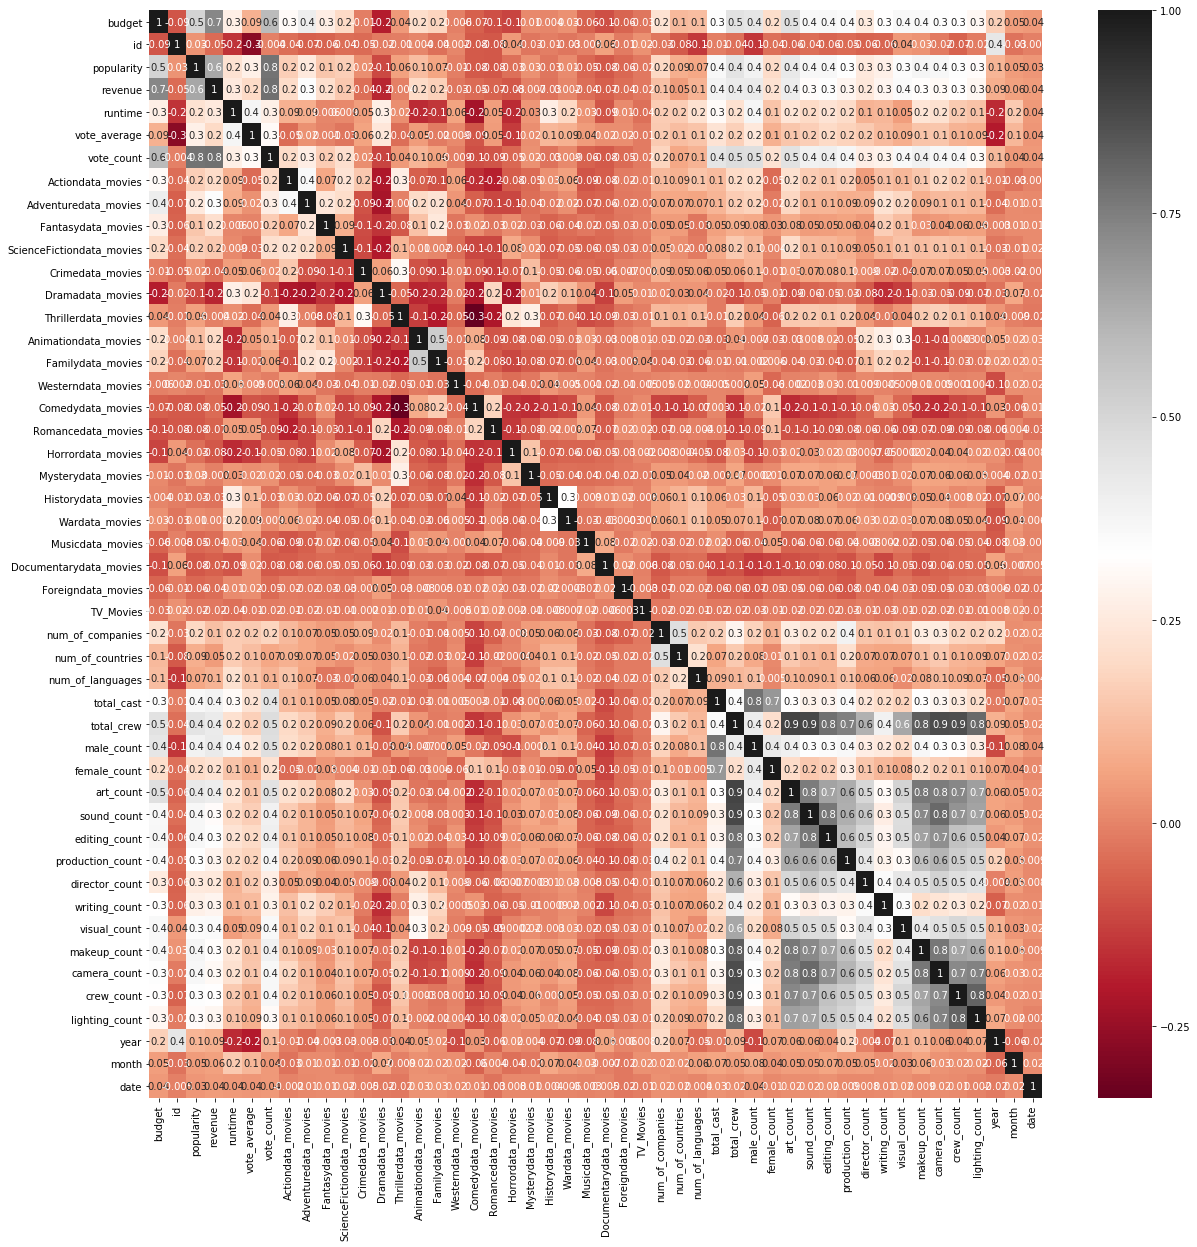

In [127]:
#lets vistualize a bit
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(), annot=True,cmap = 'RdGy',fmt = '.1g')
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 6.09 and sigma = 1.19



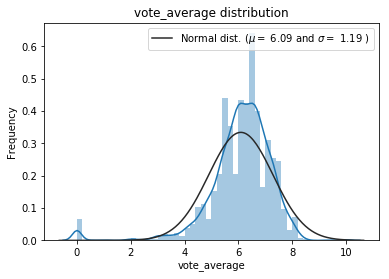

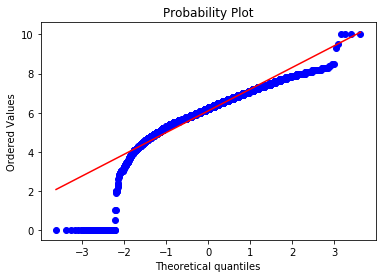

1.1946121628478925


In [129]:
#way too many features for such visualization. lets sort it later

#we will try to make a model robust rather than imputing outliers

from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(final_df['vote_average'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(final_df['vote_average'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('vote_average distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(final_df['vote_average'], plot=plt)
plt.show()

print(final_df['vote_average'].std())

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import catboost

In [240]:
print(final_df.isnull().sum())
x = final_df['runtime'].mean()
final_df['runtime'].fillna(x, inplace=True)

budget                       0
id                           0
original_language            0
original_title               0
popularity                   0
revenue                      0
runtime                      2
vote_average                 0
vote_count                   0
Actiondata_movies            0
Adventuredata_movies         0
Fantasydata_movies           0
ScienceFictiondata_movies    0
Crimedata_movies             0
Dramadata_movies             0
Thrillerdata_movies          0
Animationdata_movies         0
Familydata_movies            0
Westerndata_movies           0
Comedydata_movies            0
Romancedata_movies           0
Horrordata_movies            0
Mysterydata_movies           0
Historydata_movies           0
Wardata_movies               0
Musicdata_movies             0
Documentarydata_movies       0
Foreigndata_movies           0
TV_Movies                    0
num_of_companies             0
num_of_countries             0
num_of_languages             0
total_ca

In [242]:
final_df.fillna(-999, inplace = True)

In [190]:
train.dtypes

budget                                  int64
id                                      int64
original_language                      object
popularity                            float64
revenue                                 int64
runtime                               float64
vote_average                          float64
vote_count                              int64
Actiondata_movies                       int64
Adventuredata_movies                    int64
Fantasydata_movies                      int64
ScienceFictiondata_movies               int64
Crimedata_movies                        int64
Dramadata_movies                        int64
Thrillerdata_movies                     int64
Animationdata_movies                    int64
Familydata_movies                       int64
Westerndata_movies                      int64
Comedydata_movies                       int64
Romancedata_movies                      int64
Horrordata_movies                       int64
Mysterydata_movies                

In [194]:
final_df.dtypes

budget                         int64
id                             int64
original_language             object
popularity                   float64
revenue                        int64
runtime                      float64
vote_average                 float64
vote_count                     int64
Actiondata_movies              int64
Adventuredata_movies           int64
Fantasydata_movies             int64
ScienceFictiondata_movies      int64
Crimedata_movies               int64
Dramadata_movies               int64
Thrillerdata_movies            int64
Animationdata_movies           int64
Familydata_movies              int64
Westerndata_movies             int64
Comedydata_movies              int64
Romancedata_movies             int64
Horrordata_movies              int64
Mysterydata_movies             int64
Historydata_movies             int64
Wardata_movies                 int64
Musicdata_movies               int64
Documentarydata_movies         int64
Foreigndata_movies             int64
T

In [300]:
train,test = train_test_split(final_df, test_size = 0.3)
print(train.shape, test.shape)
train_x = train.drop(['vote_average','original_title'], axis = 1)
train_y = train['vote_average']
test_x  = test.drop(['vote_average','original_title'], axis = 1)
test_y  = test['vote_average']
train_x.shape,train_y.shape,test_x.shape,test_y.shape

(3362, 50) (1441, 50)


((3362, 48), (3362,), (1441, 48), (1441,))

In [301]:
final_df.original_language.nunique()

37

In [302]:
from sklearn import base

class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames,targetName,n_fold=5,verbosity=True,discardOriginal_col=False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self


    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        from sklearn.model_selection import KFold
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=2019)



        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
#             print(tr_ind,val_ind)
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:

            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,
                                                                                      self.targetName,
                                                                                      np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            

        return X

In [303]:
targetc   = KFoldTargetEncoderTrain('original_language','vote_average',n_fold=5)
train_new = targetc.fit_transform(train)

Correlation between the new feature, original_language_Kfold_Target_Enc and, vote_average is 0.03251515619912122.


In [304]:
train_new.dtypes

budget                                  int64
id                                      int64
original_language                      object
original_title                         object
popularity                            float64
revenue                                 int64
runtime                               float64
vote_average                          float64
vote_count                              int64
Actiondata_movies                       int64
Adventuredata_movies                    int64
Fantasydata_movies                      int64
ScienceFictiondata_movies               int64
Crimedata_movies                        int64
Dramadata_movies                        int64
Thrillerdata_movies                     int64
Animationdata_movies                    int64
Familydata_movies                       int64
Westerndata_movies                      int64
Comedydata_movies                       int64
Romancedata_movies                      int64
Horrordata_movies                 

In [305]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
        
    def fit(self, X, y=None):
        return self

    def transform(self,X):


        mean = self.train[[self.colNames,self.encodedName]].groupby(self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]

        
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})

        return X

In [306]:
test_targetc   = KFoldTargetEncoderTest(train_new,'original_language','original_language_Kfold_Target_Enc')
test_new       = test_targetc.fit_transform(test)

In [310]:
test_new['original_language_Kfold_Target_Enc'].replace('vi',0, inplace = True)
test_new['original_language_Kfold_Target_Enc'].replace('af',0, inplace = True)
test_new['original_language_Kfold_Target_Enc'].replace('no',0, inplace = True)
test_new['original_language_Kfold_Target_Enc'].replace('cs',0, inplace = True)

In [311]:
test_new.original_language_Kfold_Target_Enc.unique()

array([6.07960827, 6.09836407, 6.63857143, 6.31309254, 6.20112487,
       0.        , 7.41666667, 6.77611111, 6.67064905, 6.65      ,
       5.85499722, 6.75404762, 5.54      , 7.75      , 6.30619048,
       6.1266841 ])

In [312]:
train_final   = train_new.drop(['original_language','original_title'], axis = 1)
test_final    = test_new.drop(['original_language','original_title'], axis = 1)
train_final.shape, test_final.shape

train_final_x = train_final.drop('vote_average', axis = 1)
train_final_y = train_final['vote_average']
test_final_x  = test_final.drop('vote_average', axis = 1)
test_final_y  = test_final['vote_average']
train_final_x.shape,train_final_y.shape,test_final_x.shape,test_final_y.shape

((3362, 48), (3362,), (1441, 48), (1441,))

In [313]:
from sklearn.preprocessing import RobustScaler
scaler_impute = RobustScaler()
scaler_impute.fit(train_final_x)
train_x_scaled = scaler_impute.transform(train_final_x)
test_x_scaled  = scaler_impute.transform(test_final_x)
train_x_scaled_df = pd.DataFrame(train_x_scaled, columns=train_final_x.columns)
test_x_scaled_df  = pd.DataFrame(test_x_scaled, columns=test_final_x.columns)
train_x_scaled_df.shape,test_x_scaled_df.shape


((3362, 48), (1441, 48))

In [270]:
test_final_x.dtypes

budget                                  int64
id                                      int64
popularity                            float64
revenue                                 int64
runtime                               float64
vote_count                              int64
Actiondata_movies                       int64
Adventuredata_movies                    int64
Fantasydata_movies                      int64
ScienceFictiondata_movies               int64
Crimedata_movies                        int64
Dramadata_movies                        int64
Thrillerdata_movies                     int64
Animationdata_movies                    int64
Familydata_movies                       int64
Westerndata_movies                      int64
Comedydata_movies                       int64
Romancedata_movies                      int64
Horrordata_movies                       int64
Mysterydata_movies                      int64
Historydata_movies                      int64
Wardata_movies                    

In [314]:
#model 1 
lr = LinearRegression()
lr.fit(train_x_scaled_df, train_y)
pred = lr.predict(test_x_scaled_df)
rms = sqrt(mean_squared_error(test_y, pred))
rms

0.9532311137931406

In [325]:
#model 1 
lr = Lasso()
lr.fit(train_x_scaled_df, train_y)
pred = lr.predict(test_x_scaled_df)
rms = sqrt(mean_squared_error(test_y, pred))
rms

1.1936708030010896

In [315]:
#model 2
gb = GradientBoostingRegressor()
gb.fit(train_x_scaled_df, train_y)
pred = gb.predict(test_x_scaled_df)
rms = sqrt(mean_squared_error(test_y, pred))
rms

0.6902608935805913

In [316]:
#model 2
from xgboost import XGBRegressor
gb = XGBRegressor()
gb.fit(train_x_scaled_df, train_y)
pred = gb.predict(test_x_scaled_df)
rms = sqrt(mean_squared_error(test_y, pred))
rms

0.685320280883088

In [223]:
df = pd.DataFrame(gb.feature_importances_, index=train_x_scaled_df.columns).sort_values(0, ascending = False)
df.head(10)

,0
vote_count,0.170946
Dramadata_movies,0.140811
runtime,0.083079
Documentarydata_movies,0.047358
id,0.040747
year,0.033584
Horrordata_movies,0.032943
Actiondata_movies,0.029268
budget,0.026115
Comedydata_movies,0.023437


In [317]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(max_depth=5,learning_rate=0.07,eval_metric='RMSE',random_state=28192,n_estimators=1600)
cat.fit(train_x_scaled_df, train_y,plot= True,verbose=200)
pred = cat.predict(test_x_scaled_df)
rms = sqrt(mean_squared_error(test_y, pred))
rms

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5.7984777	total: 44.8ms	remaining: 1m 11s
200:	learn: 0.6768604	total: 10.4s	remaining: 1m 12s
400:	learn: 0.6349565	total: 20.5s	remaining: 1m 1s
600:	learn: 0.6088979	total: 30.7s	remaining: 51s
800:	learn: 0.5906291	total: 40.8s	remaining: 40.6s
1000:	learn: 0.5740448	total: 51s	remaining: 30.5s
1200:	learn: 0.5589865	total: 1m 1s	remaining: 20.4s
1400:	learn: 0.5510326	total: 1m 11s	remaining: 10.2s
1599:	learn: 0.5418702	total: 1m 22s	remaining: 0us


0.6916727244527672

In [235]:
from sklearn.feature_selection import RFE
cat = CatBoostRegressor()
selector = RFE(cat,15, step=1)
selector.fit(train_x_scaled_df, train_y)
pred = selector.predict(test_x_scaled_df)
rms = sqrt(mean_squared_error(test_y, pred))
rms

0:	learn: 6.0387670	total: 52.2ms	remaining: 52.1s
1:	learn: 5.8676624	total: 120ms	remaining: 59.9s
2:	learn: 5.6998870	total: 188ms	remaining: 1m 2s
3:	learn: 5.5366991	total: 260ms	remaining: 1m 4s
4:	learn: 5.3793787	total: 323ms	remaining: 1m 4s
5:	learn: 5.2279998	total: 387ms	remaining: 1m 4s
6:	learn: 5.0810400	total: 451ms	remaining: 1m 4s
7:	learn: 4.9377613	total: 518ms	remaining: 1m 4s
8:	learn: 4.7995101	total: 589ms	remaining: 1m 4s
9:	learn: 4.6646838	total: 657ms	remaining: 1m 5s
10:	learn: 4.5350433	total: 723ms	remaining: 1m 4s
11:	learn: 4.4088599	total: 787ms	remaining: 1m 4s
12:	learn: 4.2869445	total: 849ms	remaining: 1m 4s
13:	learn: 4.1682041	total: 929ms	remaining: 1m 5s
14:	learn: 4.0531359	total: 997ms	remaining: 1m 5s
15:	learn: 3.9419871	total: 1.06s	remaining: 1m 5s
16:	learn: 3.8353753	total: 1.13s	remaining: 1m 5s
17:	learn: 3.7316259	total: 1.2s	remaining: 1m 5s
18:	learn: 3.6304214	total: 1.27s	remaining: 1m 5s
19:	learn: 3.5335070	total: 1.35s	remaini

162:	learn: 0.7468242	total: 10.5s	remaining: 54.1s
163:	learn: 0.7458157	total: 10.6s	remaining: 54s
164:	learn: 0.7449281	total: 10.7s	remaining: 53.9s
165:	learn: 0.7433608	total: 10.7s	remaining: 53.9s
166:	learn: 0.7425152	total: 10.8s	remaining: 53.8s
167:	learn: 0.7421157	total: 10.8s	remaining: 53.7s
168:	learn: 0.7411589	total: 10.9s	remaining: 53.7s
169:	learn: 0.7403981	total: 11s	remaining: 53.6s
170:	learn: 0.7400983	total: 11s	remaining: 53.5s
171:	learn: 0.7394312	total: 11.1s	remaining: 53.5s
172:	learn: 0.7389128	total: 11.2s	remaining: 53.4s
173:	learn: 0.7381177	total: 11.2s	remaining: 53.4s
174:	learn: 0.7378534	total: 11.3s	remaining: 53.3s
175:	learn: 0.7373530	total: 11.4s	remaining: 53.2s
176:	learn: 0.7367608	total: 11.4s	remaining: 53.2s
177:	learn: 0.7364015	total: 11.5s	remaining: 53.1s
178:	learn: 0.7360111	total: 11.6s	remaining: 53.1s
179:	learn: 0.7354981	total: 11.6s	remaining: 53s
180:	learn: 0.7343636	total: 11.7s	remaining: 52.9s
181:	learn: 0.733773

322:	learn: 0.6970274	total: 20.6s	remaining: 43.3s
323:	learn: 0.6970143	total: 20.7s	remaining: 43.2s
324:	learn: 0.6964043	total: 20.8s	remaining: 43.1s
325:	learn: 0.6963220	total: 20.8s	remaining: 43.1s
326:	learn: 0.6958719	total: 20.9s	remaining: 43s
327:	learn: 0.6956924	total: 21s	remaining: 42.9s
328:	learn: 0.6951469	total: 21s	remaining: 42.9s
329:	learn: 0.6946491	total: 21.1s	remaining: 42.8s
330:	learn: 0.6946152	total: 21.1s	remaining: 42.7s
331:	learn: 0.6941593	total: 21.2s	remaining: 42.7s
332:	learn: 0.6940094	total: 21.3s	remaining: 42.6s
333:	learn: 0.6939275	total: 21.3s	remaining: 42.5s
334:	learn: 0.6938704	total: 21.4s	remaining: 42.4s
335:	learn: 0.6938387	total: 21.5s	remaining: 42.4s
336:	learn: 0.6934137	total: 21.5s	remaining: 42.3s
337:	learn: 0.6933939	total: 21.6s	remaining: 42.3s
338:	learn: 0.6933358	total: 21.6s	remaining: 42.2s
339:	learn: 0.6932813	total: 21.7s	remaining: 42.1s
340:	learn: 0.6925365	total: 21.8s	remaining: 42.1s
341:	learn: 0.6921

483:	learn: 0.6666246	total: 31.2s	remaining: 33.2s
484:	learn: 0.6666112	total: 31.2s	remaining: 33.2s
485:	learn: 0.6666077	total: 31.3s	remaining: 33.1s
486:	learn: 0.6665883	total: 31.4s	remaining: 33s
487:	learn: 0.6665730	total: 31.4s	remaining: 33s
488:	learn: 0.6665693	total: 31.5s	remaining: 32.9s
489:	learn: 0.6665496	total: 31.6s	remaining: 32.9s
490:	learn: 0.6665481	total: 31.6s	remaining: 32.8s
491:	learn: 0.6660847	total: 31.7s	remaining: 32.8s
492:	learn: 0.6659169	total: 31.8s	remaining: 32.7s
493:	learn: 0.6657520	total: 31.9s	remaining: 32.6s
494:	learn: 0.6657370	total: 31.9s	remaining: 32.6s
495:	learn: 0.6656495	total: 32s	remaining: 32.5s
496:	learn: 0.6656277	total: 32.1s	remaining: 32.5s
497:	learn: 0.6656140	total: 32.1s	remaining: 32.4s
498:	learn: 0.6655489	total: 32.2s	remaining: 32.3s
499:	learn: 0.6655467	total: 32.3s	remaining: 32.3s
500:	learn: 0.6655411	total: 32.3s	remaining: 32.2s
501:	learn: 0.6654714	total: 32.4s	remaining: 32.1s
502:	learn: 0.6654

643:	learn: 0.6508768	total: 41.8s	remaining: 23.1s
644:	learn: 0.6508479	total: 41.8s	remaining: 23s
645:	learn: 0.6508459	total: 41.9s	remaining: 23s
646:	learn: 0.6507620	total: 42s	remaining: 22.9s
647:	learn: 0.6507610	total: 42s	remaining: 22.8s
648:	learn: 0.6507490	total: 42.1s	remaining: 22.8s
649:	learn: 0.6507476	total: 42.2s	remaining: 22.7s
650:	learn: 0.6507467	total: 42.2s	remaining: 22.6s
651:	learn: 0.6507397	total: 42.3s	remaining: 22.6s
652:	learn: 0.6507354	total: 42.4s	remaining: 22.5s
653:	learn: 0.6507195	total: 42.4s	remaining: 22.5s
654:	learn: 0.6503778	total: 42.5s	remaining: 22.4s
655:	learn: 0.6503608	total: 42.6s	remaining: 22.4s
656:	learn: 0.6501289	total: 42.7s	remaining: 22.3s
657:	learn: 0.6501270	total: 42.8s	remaining: 22.2s
658:	learn: 0.6500931	total: 42.9s	remaining: 22.2s
659:	learn: 0.6500531	total: 42.9s	remaining: 22.1s
660:	learn: 0.6497240	total: 43s	remaining: 22.1s
661:	learn: 0.6494228	total: 43.1s	remaining: 22s
662:	learn: 0.6489414	to

802:	learn: 0.6396370	total: 51.6s	remaining: 12.7s
803:	learn: 0.6396271	total: 51.7s	remaining: 12.6s
804:	learn: 0.6396239	total: 51.8s	remaining: 12.5s
805:	learn: 0.6396107	total: 51.8s	remaining: 12.5s
806:	learn: 0.6396102	total: 51.9s	remaining: 12.4s
807:	learn: 0.6395482	total: 52s	remaining: 12.3s
808:	learn: 0.6395452	total: 52s	remaining: 12.3s
809:	learn: 0.6391077	total: 52.1s	remaining: 12.2s
810:	learn: 0.6390833	total: 52.2s	remaining: 12.2s
811:	learn: 0.6389668	total: 52.2s	remaining: 12.1s
812:	learn: 0.6386510	total: 52.3s	remaining: 12s
813:	learn: 0.6383440	total: 52.4s	remaining: 12s
814:	learn: 0.6380734	total: 52.4s	remaining: 11.9s
815:	learn: 0.6380727	total: 52.5s	remaining: 11.8s
816:	learn: 0.6377363	total: 52.6s	remaining: 11.8s
817:	learn: 0.6377358	total: 52.6s	remaining: 11.7s
818:	learn: 0.6376978	total: 52.7s	remaining: 11.6s
819:	learn: 0.6376890	total: 52.8s	remaining: 11.6s
820:	learn: 0.6376884	total: 52.8s	remaining: 11.5s
821:	learn: 0.637679

964:	learn: 0.6274484	total: 1m 1s	remaining: 2.24s
965:	learn: 0.6274347	total: 1m 1s	remaining: 2.17s
966:	learn: 0.6269246	total: 1m 1s	remaining: 2.11s
967:	learn: 0.6269245	total: 1m 1s	remaining: 2.04s
968:	learn: 0.6269138	total: 1m 1s	remaining: 1.98s
969:	learn: 0.6269049	total: 1m 1s	remaining: 1.92s
970:	learn: 0.6268266	total: 1m 1s	remaining: 1.85s
971:	learn: 0.6268104	total: 1m 2s	remaining: 1.79s
972:	learn: 0.6263773	total: 1m 2s	remaining: 1.72s
973:	learn: 0.6263525	total: 1m 2s	remaining: 1.66s
974:	learn: 0.6263524	total: 1m 2s	remaining: 1.59s
975:	learn: 0.6263519	total: 1m 2s	remaining: 1.53s
976:	learn: 0.6261427	total: 1m 2s	remaining: 1.47s
977:	learn: 0.6261370	total: 1m 2s	remaining: 1.4s
978:	learn: 0.6259727	total: 1m 2s	remaining: 1.34s
979:	learn: 0.6259267	total: 1m 2s	remaining: 1.28s
980:	learn: 0.6259136	total: 1m 2s	remaining: 1.21s
981:	learn: 0.6259082	total: 1m 2s	remaining: 1.15s
982:	learn: 0.6259066	total: 1m 2s	remaining: 1.08s
983:	learn: 0

127:	learn: 0.7805933	total: 8.06s	remaining: 54.9s
128:	learn: 0.7791021	total: 8.13s	remaining: 54.9s
129:	learn: 0.7774207	total: 8.2s	remaining: 54.9s
130:	learn: 0.7757782	total: 8.27s	remaining: 54.8s
131:	learn: 0.7741888	total: 8.34s	remaining: 54.9s
132:	learn: 0.7723630	total: 8.41s	remaining: 54.8s
133:	learn: 0.7711459	total: 8.47s	remaining: 54.8s
134:	learn: 0.7698376	total: 8.53s	remaining: 54.7s
135:	learn: 0.7681596	total: 8.59s	remaining: 54.6s
136:	learn: 0.7664904	total: 8.66s	remaining: 54.5s
137:	learn: 0.7647669	total: 8.72s	remaining: 54.5s
138:	learn: 0.7632031	total: 8.78s	remaining: 54.4s
139:	learn: 0.7616130	total: 8.84s	remaining: 54.3s
140:	learn: 0.7605804	total: 8.91s	remaining: 54.3s
141:	learn: 0.7595701	total: 8.98s	remaining: 54.2s
142:	learn: 0.7584521	total: 9.04s	remaining: 54.2s
143:	learn: 0.7575973	total: 9.1s	remaining: 54.1s
144:	learn: 0.7567689	total: 9.16s	remaining: 54s
145:	learn: 0.7555820	total: 9.22s	remaining: 53.9s
146:	learn: 0.75

288:	learn: 0.6963855	total: 18.8s	remaining: 46.2s
289:	learn: 0.6961565	total: 18.9s	remaining: 46.2s
290:	learn: 0.6956123	total: 19s	remaining: 46.2s
291:	learn: 0.6954305	total: 19s	remaining: 46.1s
292:	learn: 0.6954221	total: 19.1s	remaining: 46s
293:	learn: 0.6953497	total: 19.2s	remaining: 46s
294:	learn: 0.6950140	total: 19.2s	remaining: 45.9s
295:	learn: 0.6947902	total: 19.3s	remaining: 45.9s
296:	learn: 0.6947326	total: 19.3s	remaining: 45.8s
297:	learn: 0.6946916	total: 19.4s	remaining: 45.7s
298:	learn: 0.6943571	total: 19.5s	remaining: 45.7s
299:	learn: 0.6939356	total: 19.5s	remaining: 45.6s
300:	learn: 0.6936593	total: 19.6s	remaining: 45.5s
301:	learn: 0.6935275	total: 19.7s	remaining: 45.5s
302:	learn: 0.6934761	total: 19.8s	remaining: 45.5s
303:	learn: 0.6934485	total: 19.8s	remaining: 45.4s
304:	learn: 0.6932144	total: 19.9s	remaining: 45.4s
305:	learn: 0.6927789	total: 20s	remaining: 45.3s
306:	learn: 0.6926853	total: 20s	remaining: 45.2s
307:	learn: 0.6926202	to

449:	learn: 0.6699612	total: 30.7s	remaining: 37.5s
450:	learn: 0.6693703	total: 30.8s	remaining: 37.4s
451:	learn: 0.6693670	total: 30.8s	remaining: 37.4s
452:	learn: 0.6693581	total: 30.9s	remaining: 37.3s
453:	learn: 0.6689722	total: 31s	remaining: 37.3s
454:	learn: 0.6685387	total: 31.1s	remaining: 37.2s
455:	learn: 0.6679753	total: 31.1s	remaining: 37.1s
456:	learn: 0.6679238	total: 31.2s	remaining: 37.1s
457:	learn: 0.6678613	total: 31.3s	remaining: 37.1s
458:	learn: 0.6677878	total: 31.4s	remaining: 37s
459:	learn: 0.6677133	total: 31.5s	remaining: 36.9s
460:	learn: 0.6674783	total: 31.5s	remaining: 36.9s
461:	learn: 0.6674174	total: 31.6s	remaining: 36.8s
462:	learn: 0.6673689	total: 31.7s	remaining: 36.8s
463:	learn: 0.6673665	total: 31.8s	remaining: 36.7s
464:	learn: 0.6673193	total: 31.9s	remaining: 36.6s
465:	learn: 0.6672892	total: 31.9s	remaining: 36.6s
466:	learn: 0.6671819	total: 32s	remaining: 36.5s
467:	learn: 0.6671764	total: 32.1s	remaining: 36.5s
468:	learn: 0.6667

610:	learn: 0.6495841	total: 42s	remaining: 26.7s
611:	learn: 0.6492488	total: 42s	remaining: 26.6s
612:	learn: 0.6491486	total: 42.1s	remaining: 26.6s
613:	learn: 0.6490140	total: 42.2s	remaining: 26.5s
614:	learn: 0.6490119	total: 42.2s	remaining: 26.4s
615:	learn: 0.6486315	total: 42.3s	remaining: 26.4s
616:	learn: 0.6485992	total: 42.4s	remaining: 26.3s
617:	learn: 0.6485025	total: 42.5s	remaining: 26.2s
618:	learn: 0.6483394	total: 42.5s	remaining: 26.2s
619:	learn: 0.6483353	total: 42.6s	remaining: 26.1s
620:	learn: 0.6483321	total: 42.6s	remaining: 26s
621:	learn: 0.6483233	total: 42.7s	remaining: 25.9s
622:	learn: 0.6483173	total: 42.8s	remaining: 25.9s
623:	learn: 0.6483080	total: 42.8s	remaining: 25.8s
624:	learn: 0.6482985	total: 42.9s	remaining: 25.7s
625:	learn: 0.6481504	total: 42.9s	remaining: 25.7s
626:	learn: 0.6481256	total: 43s	remaining: 25.6s
627:	learn: 0.6480602	total: 43.1s	remaining: 25.5s
628:	learn: 0.6478870	total: 43.1s	remaining: 25.4s
629:	learn: 0.647535

770:	learn: 0.6328134	total: 52.3s	remaining: 15.5s
771:	learn: 0.6326802	total: 52.4s	remaining: 15.5s
772:	learn: 0.6326596	total: 52.5s	remaining: 15.4s
773:	learn: 0.6324126	total: 52.5s	remaining: 15.3s
774:	learn: 0.6324096	total: 52.6s	remaining: 15.3s
775:	learn: 0.6323918	total: 52.7s	remaining: 15.2s
776:	learn: 0.6321337	total: 52.7s	remaining: 15.1s
777:	learn: 0.6320937	total: 52.8s	remaining: 15.1s
778:	learn: 0.6320546	total: 52.8s	remaining: 15s
779:	learn: 0.6320281	total: 52.9s	remaining: 14.9s
780:	learn: 0.6320197	total: 53s	remaining: 14.9s
781:	learn: 0.6320175	total: 53s	remaining: 14.8s
782:	learn: 0.6320151	total: 53.1s	remaining: 14.7s
783:	learn: 0.6320103	total: 53.2s	remaining: 14.6s
784:	learn: 0.6319779	total: 53.2s	remaining: 14.6s
785:	learn: 0.6319648	total: 53.3s	remaining: 14.5s
786:	learn: 0.6319209	total: 53.4s	remaining: 14.4s
787:	learn: 0.6319203	total: 53.4s	remaining: 14.4s
788:	learn: 0.6319098	total: 53.5s	remaining: 14.3s
789:	learn: 0.6318

932:	learn: 0.6244725	total: 1m 2s	remaining: 4.47s
933:	learn: 0.6241697	total: 1m 2s	remaining: 4.4s
934:	learn: 0.6241691	total: 1m 2s	remaining: 4.33s
935:	learn: 0.6241680	total: 1m 2s	remaining: 4.26s
936:	learn: 0.6241461	total: 1m 2s	remaining: 4.2s
937:	learn: 0.6240945	total: 1m 2s	remaining: 4.13s
938:	learn: 0.6240506	total: 1m 2s	remaining: 4.06s
939:	learn: 0.6240423	total: 1m 2s	remaining: 4s
940:	learn: 0.6240381	total: 1m 2s	remaining: 3.93s
941:	learn: 0.6240222	total: 1m 2s	remaining: 3.86s
942:	learn: 0.6240147	total: 1m 2s	remaining: 3.8s
943:	learn: 0.6239475	total: 1m 2s	remaining: 3.73s
944:	learn: 0.6236861	total: 1m 2s	remaining: 3.66s
945:	learn: 0.6236658	total: 1m 3s	remaining: 3.6s
946:	learn: 0.6235217	total: 1m 3s	remaining: 3.53s
947:	learn: 0.6235211	total: 1m 3s	remaining: 3.46s
948:	learn: 0.6235049	total: 1m 3s	remaining: 3.39s
949:	learn: 0.6234749	total: 1m 3s	remaining: 3.33s
950:	learn: 0.6234717	total: 1m 3s	remaining: 3.26s
951:	learn: 0.62340

97:	learn: 0.8834360	total: 6.2s	remaining: 57s
98:	learn: 0.8777973	total: 6.26s	remaining: 56.9s
99:	learn: 0.8717164	total: 6.32s	remaining: 56.9s
100:	learn: 0.8663122	total: 6.38s	remaining: 56.8s
101:	learn: 0.8619111	total: 6.45s	remaining: 56.8s
102:	learn: 0.8578172	total: 6.52s	remaining: 56.8s
103:	learn: 0.8537010	total: 6.59s	remaining: 56.8s
104:	learn: 0.8488347	total: 6.65s	remaining: 56.7s
105:	learn: 0.8451954	total: 6.71s	remaining: 56.6s
106:	learn: 0.8419706	total: 6.78s	remaining: 56.5s
107:	learn: 0.8379409	total: 6.84s	remaining: 56.5s
108:	learn: 0.8347670	total: 6.89s	remaining: 56.3s
109:	learn: 0.8313614	total: 6.96s	remaining: 56.3s
110:	learn: 0.8278160	total: 7.03s	remaining: 56.3s
111:	learn: 0.8242871	total: 7.09s	remaining: 56.2s
112:	learn: 0.8212170	total: 7.15s	remaining: 56.2s
113:	learn: 0.8180525	total: 7.23s	remaining: 56.2s
114:	learn: 0.8152378	total: 7.29s	remaining: 56.1s
115:	learn: 0.8126874	total: 7.36s	remaining: 56.1s
116:	learn: 0.8106

258:	learn: 0.7064992	total: 16.7s	remaining: 47.7s
259:	learn: 0.7063924	total: 16.7s	remaining: 47.6s
260:	learn: 0.7062768	total: 16.8s	remaining: 47.5s
261:	learn: 0.7058533	total: 16.8s	remaining: 47.5s
262:	learn: 0.7057457	total: 16.9s	remaining: 47.4s
263:	learn: 0.7054231	total: 17s	remaining: 47.3s
264:	learn: 0.7050694	total: 17s	remaining: 47.3s
265:	learn: 0.7046979	total: 17.1s	remaining: 47.2s
266:	learn: 0.7042969	total: 17.2s	remaining: 47.1s
267:	learn: 0.7040873	total: 17.2s	remaining: 47.1s
268:	learn: 0.7039716	total: 17.3s	remaining: 47s
269:	learn: 0.7038694	total: 17.4s	remaining: 46.9s
270:	learn: 0.7035899	total: 17.4s	remaining: 46.9s
271:	learn: 0.7035410	total: 17.5s	remaining: 46.8s
272:	learn: 0.7035232	total: 17.6s	remaining: 46.7s
273:	learn: 0.7034809	total: 17.6s	remaining: 46.7s
274:	learn: 0.7034112	total: 17.7s	remaining: 46.6s
275:	learn: 0.7031620	total: 17.8s	remaining: 46.6s
276:	learn: 0.7031263	total: 17.8s	remaining: 46.5s
277:	learn: 0.7024

417:	learn: 0.6778881	total: 26.7s	remaining: 37.1s
418:	learn: 0.6778498	total: 26.7s	remaining: 37.1s
419:	learn: 0.6778402	total: 26.8s	remaining: 37s
420:	learn: 0.6778026	total: 26.9s	remaining: 37s
421:	learn: 0.6772362	total: 26.9s	remaining: 36.9s
422:	learn: 0.6768002	total: 27s	remaining: 36.8s
423:	learn: 0.6767423	total: 27.1s	remaining: 36.8s
424:	learn: 0.6762356	total: 27.1s	remaining: 36.7s
425:	learn: 0.6762299	total: 27.2s	remaining: 36.6s
426:	learn: 0.6762187	total: 27.2s	remaining: 36.5s
427:	learn: 0.6762030	total: 27.3s	remaining: 36.5s
428:	learn: 0.6761378	total: 27.4s	remaining: 36.4s
429:	learn: 0.6761013	total: 27.4s	remaining: 36.4s
430:	learn: 0.6759961	total: 27.5s	remaining: 36.3s
431:	learn: 0.6759735	total: 27.6s	remaining: 36.3s
432:	learn: 0.6754873	total: 27.6s	remaining: 36.2s
433:	learn: 0.6752525	total: 27.7s	remaining: 36.1s
434:	learn: 0.6750662	total: 27.8s	remaining: 36.1s
435:	learn: 0.6749903	total: 27.8s	remaining: 36s
436:	learn: 0.674984

579:	learn: 0.6627659	total: 36.8s	remaining: 26.7s
580:	learn: 0.6627604	total: 36.9s	remaining: 26.6s
581:	learn: 0.6627575	total: 37s	remaining: 26.5s
582:	learn: 0.6625306	total: 37s	remaining: 26.5s
583:	learn: 0.6625093	total: 37.1s	remaining: 26.4s
584:	learn: 0.6625029	total: 37.1s	remaining: 26.4s
585:	learn: 0.6624994	total: 37.2s	remaining: 26.3s
586:	learn: 0.6623809	total: 37.3s	remaining: 26.2s
587:	learn: 0.6623721	total: 37.3s	remaining: 26.2s
588:	learn: 0.6621356	total: 37.4s	remaining: 26.1s
589:	learn: 0.6616438	total: 37.5s	remaining: 26s
590:	learn: 0.6614914	total: 37.5s	remaining: 26s
591:	learn: 0.6614808	total: 37.6s	remaining: 25.9s
592:	learn: 0.6613788	total: 37.7s	remaining: 25.8s
593:	learn: 0.6609690	total: 37.7s	remaining: 25.8s
594:	learn: 0.6609609	total: 37.8s	remaining: 25.7s
595:	learn: 0.6606960	total: 37.8s	remaining: 25.7s
596:	learn: 0.6603796	total: 37.9s	remaining: 25.6s
597:	learn: 0.6603562	total: 38s	remaining: 25.5s
598:	learn: 0.6603531	

738:	learn: 0.6483198	total: 46.8s	remaining: 16.5s
739:	learn: 0.6483082	total: 46.8s	remaining: 16.4s
740:	learn: 0.6482897	total: 46.9s	remaining: 16.4s
741:	learn: 0.6482471	total: 46.9s	remaining: 16.3s
742:	learn: 0.6482312	total: 47s	remaining: 16.3s
743:	learn: 0.6482165	total: 47.1s	remaining: 16.2s
744:	learn: 0.6482068	total: 47.1s	remaining: 16.1s
745:	learn: 0.6478835	total: 47.2s	remaining: 16.1s
746:	learn: 0.6478579	total: 47.3s	remaining: 16s
747:	learn: 0.6477584	total: 47.4s	remaining: 16s
748:	learn: 0.6476073	total: 47.4s	remaining: 15.9s
749:	learn: 0.6475806	total: 47.5s	remaining: 15.8s
750:	learn: 0.6475756	total: 47.6s	remaining: 15.8s
751:	learn: 0.6475690	total: 47.6s	remaining: 15.7s
752:	learn: 0.6475604	total: 47.7s	remaining: 15.6s
753:	learn: 0.6475580	total: 47.7s	remaining: 15.6s
754:	learn: 0.6475495	total: 47.8s	remaining: 15.5s
755:	learn: 0.6474719	total: 47.9s	remaining: 15.4s
756:	learn: 0.6474074	total: 47.9s	remaining: 15.4s
757:	learn: 0.6473

900:	learn: 0.6364645	total: 57s	remaining: 6.27s
901:	learn: 0.6364528	total: 57.1s	remaining: 6.21s
902:	learn: 0.6364226	total: 57.2s	remaining: 6.14s
903:	learn: 0.6363756	total: 57.3s	remaining: 6.08s
904:	learn: 0.6363699	total: 57.3s	remaining: 6.02s
905:	learn: 0.6363643	total: 57.4s	remaining: 5.96s
906:	learn: 0.6363455	total: 57.5s	remaining: 5.89s
907:	learn: 0.6362608	total: 57.6s	remaining: 5.83s
908:	learn: 0.6362569	total: 57.6s	remaining: 5.77s
909:	learn: 0.6362514	total: 57.7s	remaining: 5.71s
910:	learn: 0.6362468	total: 57.8s	remaining: 5.64s
911:	learn: 0.6362465	total: 57.8s	remaining: 5.58s
912:	learn: 0.6362463	total: 57.8s	remaining: 5.51s
913:	learn: 0.6361443	total: 57.9s	remaining: 5.45s
914:	learn: 0.6361440	total: 58s	remaining: 5.38s
915:	learn: 0.6361355	total: 58s	remaining: 5.32s
916:	learn: 0.6359478	total: 58.1s	remaining: 5.26s
917:	learn: 0.6359288	total: 58.1s	remaining: 5.19s
918:	learn: 0.6359282	total: 58.2s	remaining: 5.13s
919:	learn: 0.6355

62:	learn: 1.3130134	total: 3.98s	remaining: 59.2s
63:	learn: 1.2906554	total: 4.05s	remaining: 59.2s
64:	learn: 1.2690396	total: 4.12s	remaining: 59.3s
65:	learn: 1.2478026	total: 4.2s	remaining: 59.4s
66:	learn: 1.2282522	total: 4.26s	remaining: 59.4s
67:	learn: 1.2097266	total: 4.32s	remaining: 59.3s
68:	learn: 1.1923425	total: 4.39s	remaining: 59.2s
69:	learn: 1.1742313	total: 4.45s	remaining: 59.1s
70:	learn: 1.1572212	total: 4.52s	remaining: 59.1s
71:	learn: 1.1403524	total: 4.58s	remaining: 59s
72:	learn: 1.1239389	total: 4.64s	remaining: 59s
73:	learn: 1.1088188	total: 4.7s	remaining: 58.8s
74:	learn: 1.0958853	total: 4.76s	remaining: 58.8s
75:	learn: 1.0825133	total: 4.83s	remaining: 58.7s
76:	learn: 1.0684421	total: 4.89s	remaining: 58.6s
77:	learn: 1.0548853	total: 4.95s	remaining: 58.5s
78:	learn: 1.0426026	total: 5.01s	remaining: 58.5s
79:	learn: 1.0311134	total: 5.08s	remaining: 58.4s
80:	learn: 1.0191752	total: 5.13s	remaining: 58.3s
81:	learn: 1.0091984	total: 5.2s	rema

225:	learn: 0.7172364	total: 14.8s	remaining: 50.6s
226:	learn: 0.7169773	total: 14.8s	remaining: 50.5s
227:	learn: 0.7166778	total: 14.9s	remaining: 50.5s
228:	learn: 0.7164496	total: 15s	remaining: 50.4s
229:	learn: 0.7162195	total: 15s	remaining: 50.4s
230:	learn: 0.7157092	total: 15.1s	remaining: 50.3s
231:	learn: 0.7156313	total: 15.2s	remaining: 50.2s
232:	learn: 0.7151164	total: 15.2s	remaining: 50.1s
233:	learn: 0.7149254	total: 15.3s	remaining: 50s
234:	learn: 0.7145005	total: 15.3s	remaining: 49.9s
235:	learn: 0.7138461	total: 15.4s	remaining: 49.8s
236:	learn: 0.7136491	total: 15.5s	remaining: 49.8s
237:	learn: 0.7134255	total: 15.5s	remaining: 49.7s
238:	learn: 0.7133928	total: 15.6s	remaining: 49.6s
239:	learn: 0.7131120	total: 15.6s	remaining: 49.5s
240:	learn: 0.7130454	total: 15.7s	remaining: 49.4s
241:	learn: 0.7125755	total: 15.8s	remaining: 49.4s
242:	learn: 0.7125046	total: 15.8s	remaining: 49.3s
243:	learn: 0.7124112	total: 15.9s	remaining: 49.2s
244:	learn: 0.7123

385:	learn: 0.6836442	total: 25.4s	remaining: 40.4s
386:	learn: 0.6836187	total: 25.4s	remaining: 40.3s
387:	learn: 0.6835585	total: 25.5s	remaining: 40.2s
388:	learn: 0.6835150	total: 25.6s	remaining: 40.2s
389:	learn: 0.6835003	total: 25.6s	remaining: 40.1s
390:	learn: 0.6834695	total: 25.7s	remaining: 40s
391:	learn: 0.6833733	total: 25.8s	remaining: 39.9s
392:	learn: 0.6830279	total: 25.8s	remaining: 39.9s
393:	learn: 0.6827208	total: 25.9s	remaining: 39.8s
394:	learn: 0.6820078	total: 25.9s	remaining: 39.7s
395:	learn: 0.6816935	total: 26s	remaining: 39.7s
396:	learn: 0.6815703	total: 26.1s	remaining: 39.6s
397:	learn: 0.6814920	total: 26.1s	remaining: 39.5s
398:	learn: 0.6812256	total: 26.2s	remaining: 39.4s
399:	learn: 0.6811277	total: 26.3s	remaining: 39.4s
400:	learn: 0.6810333	total: 26.3s	remaining: 39.3s
401:	learn: 0.6810125	total: 26.4s	remaining: 39.2s
402:	learn: 0.6809027	total: 26.4s	remaining: 39.2s
403:	learn: 0.6807582	total: 26.5s	remaining: 39.1s
404:	learn: 0.68

544:	learn: 0.6629340	total: 36.1s	remaining: 30.2s
545:	learn: 0.6627693	total: 36.2s	remaining: 30.1s
546:	learn: 0.6626574	total: 36.2s	remaining: 30s
547:	learn: 0.6626463	total: 36.3s	remaining: 30s
548:	learn: 0.6626218	total: 36.4s	remaining: 29.9s
549:	learn: 0.6620463	total: 36.4s	remaining: 29.8s
550:	learn: 0.6615480	total: 36.5s	remaining: 29.8s
551:	learn: 0.6612899	total: 36.6s	remaining: 29.7s
552:	learn: 0.6612765	total: 36.6s	remaining: 29.6s
553:	learn: 0.6612597	total: 36.7s	remaining: 29.6s
554:	learn: 0.6612141	total: 36.8s	remaining: 29.5s
555:	learn: 0.6608918	total: 36.8s	remaining: 29.4s
556:	learn: 0.6608894	total: 36.9s	remaining: 29.3s
557:	learn: 0.6608012	total: 36.9s	remaining: 29.3s
558:	learn: 0.6607851	total: 37s	remaining: 29.2s
559:	learn: 0.6607484	total: 37.1s	remaining: 29.1s
560:	learn: 0.6607306	total: 37.1s	remaining: 29.1s
561:	learn: 0.6607049	total: 37.2s	remaining: 29s
562:	learn: 0.6604024	total: 37.3s	remaining: 28.9s
563:	learn: 0.660402

706:	learn: 0.6457750	total: 46.3s	remaining: 19.2s
707:	learn: 0.6457715	total: 46.3s	remaining: 19.1s
708:	learn: 0.6457474	total: 46.4s	remaining: 19s
709:	learn: 0.6457378	total: 46.4s	remaining: 19s
710:	learn: 0.6457346	total: 46.5s	remaining: 18.9s
711:	learn: 0.6457330	total: 46.6s	remaining: 18.8s
712:	learn: 0.6456396	total: 46.6s	remaining: 18.8s
713:	learn: 0.6455865	total: 46.7s	remaining: 18.7s
714:	learn: 0.6455723	total: 46.8s	remaining: 18.6s
715:	learn: 0.6455576	total: 46.8s	remaining: 18.6s
716:	learn: 0.6454359	total: 46.9s	remaining: 18.5s
717:	learn: 0.6453689	total: 46.9s	remaining: 18.4s
718:	learn: 0.6453475	total: 47s	remaining: 18.4s
719:	learn: 0.6453464	total: 47s	remaining: 18.3s
720:	learn: 0.6453381	total: 47.1s	remaining: 18.2s
721:	learn: 0.6452251	total: 47.2s	remaining: 18.2s
722:	learn: 0.6452194	total: 47.2s	remaining: 18.1s
723:	learn: 0.6450285	total: 47.3s	remaining: 18s
724:	learn: 0.6450187	total: 47.4s	remaining: 18s
725:	learn: 0.6445469	to

867:	learn: 0.6331057	total: 56.7s	remaining: 8.63s
868:	learn: 0.6330109	total: 56.8s	remaining: 8.56s
869:	learn: 0.6330033	total: 56.8s	remaining: 8.49s
870:	learn: 0.6329886	total: 56.9s	remaining: 8.43s
871:	learn: 0.6329681	total: 57s	remaining: 8.36s
872:	learn: 0.6329656	total: 57s	remaining: 8.29s
873:	learn: 0.6328768	total: 57.1s	remaining: 8.22s
874:	learn: 0.6328547	total: 57.1s	remaining: 8.16s
875:	learn: 0.6328538	total: 57.2s	remaining: 8.1s
876:	learn: 0.6328316	total: 57.3s	remaining: 8.03s
877:	learn: 0.6328233	total: 57.3s	remaining: 7.97s
878:	learn: 0.6327276	total: 57.4s	remaining: 7.9s
879:	learn: 0.6326152	total: 57.5s	remaining: 7.84s
880:	learn: 0.6326147	total: 57.5s	remaining: 7.77s
881:	learn: 0.6326141	total: 57.5s	remaining: 7.7s
882:	learn: 0.6326086	total: 57.6s	remaining: 7.63s
883:	learn: 0.6325973	total: 57.7s	remaining: 7.57s
884:	learn: 0.6325899	total: 57.7s	remaining: 7.5s
885:	learn: 0.6325823	total: 57.8s	remaining: 7.43s
886:	learn: 0.632542

29:	learn: 2.7030852	total: 2.1s	remaining: 1m 8s
30:	learn: 2.6354186	total: 2.16s	remaining: 1m 7s
31:	learn: 2.5700808	total: 2.24s	remaining: 1m 7s
32:	learn: 2.5067669	total: 2.32s	remaining: 1m 8s
33:	learn: 2.4413830	total: 2.4s	remaining: 1m 8s
34:	learn: 2.3823651	total: 2.48s	remaining: 1m 8s
35:	learn: 2.3256920	total: 2.55s	remaining: 1m 8s
36:	learn: 2.2706377	total: 2.61s	remaining: 1m 8s
37:	learn: 2.2151197	total: 2.68s	remaining: 1m 7s
38:	learn: 2.1600061	total: 2.74s	remaining: 1m 7s
39:	learn: 2.1103600	total: 2.8s	remaining: 1m 7s
40:	learn: 2.0628322	total: 2.89s	remaining: 1m 7s
41:	learn: 2.0131586	total: 2.96s	remaining: 1m 7s
42:	learn: 1.9681012	total: 3.03s	remaining: 1m 7s
43:	learn: 1.9220044	total: 3.09s	remaining: 1m 7s
44:	learn: 1.8803966	total: 3.15s	remaining: 1m 6s
45:	learn: 1.8368330	total: 3.21s	remaining: 1m 6s
46:	learn: 1.7982905	total: 3.28s	remaining: 1m 6s
47:	learn: 1.7568683	total: 3.34s	remaining: 1m 6s
48:	learn: 1.7200780	total: 3.42s	

192:	learn: 0.7257287	total: 12.7s	remaining: 53s
193:	learn: 0.7253726	total: 12.7s	remaining: 53s
194:	learn: 0.7243147	total: 12.8s	remaining: 52.9s
195:	learn: 0.7241816	total: 12.9s	remaining: 52.8s
196:	learn: 0.7236437	total: 12.9s	remaining: 52.7s
197:	learn: 0.7230411	total: 13s	remaining: 52.6s
198:	learn: 0.7228651	total: 13s	remaining: 52.5s
199:	learn: 0.7221829	total: 13.1s	remaining: 52.4s
200:	learn: 0.7216588	total: 13.2s	remaining: 52.3s
201:	learn: 0.7211696	total: 13.2s	remaining: 52.2s
202:	learn: 0.7210538	total: 13.3s	remaining: 52.2s
203:	learn: 0.7208857	total: 13.4s	remaining: 52.1s
204:	learn: 0.7206735	total: 13.4s	remaining: 52s
205:	learn: 0.7200328	total: 13.5s	remaining: 51.9s
206:	learn: 0.7195937	total: 13.5s	remaining: 51.8s
207:	learn: 0.7194235	total: 13.6s	remaining: 51.7s
208:	learn: 0.7191495	total: 13.6s	remaining: 51.6s
209:	learn: 0.7185169	total: 13.7s	remaining: 51.5s
210:	learn: 0.7184397	total: 13.7s	remaining: 51.4s
211:	learn: 0.7182521	

352:	learn: 0.6872323	total: 22.1s	remaining: 40.6s
353:	learn: 0.6872130	total: 22.2s	remaining: 40.5s
354:	learn: 0.6870600	total: 22.2s	remaining: 40.4s
355:	learn: 0.6868360	total: 22.3s	remaining: 40.3s
356:	learn: 0.6868012	total: 22.4s	remaining: 40.3s
357:	learn: 0.6866879	total: 22.4s	remaining: 40.2s
358:	learn: 0.6866419	total: 22.5s	remaining: 40.1s
359:	learn: 0.6864771	total: 22.5s	remaining: 40.1s
360:	learn: 0.6864611	total: 22.6s	remaining: 40s
361:	learn: 0.6862918	total: 22.6s	remaining: 39.9s
362:	learn: 0.6860908	total: 22.7s	remaining: 39.8s
363:	learn: 0.6860686	total: 22.8s	remaining: 39.8s
364:	learn: 0.6860153	total: 22.8s	remaining: 39.7s
365:	learn: 0.6859380	total: 22.9s	remaining: 39.6s
366:	learn: 0.6858180	total: 22.9s	remaining: 39.5s
367:	learn: 0.6856911	total: 23s	remaining: 39.5s
368:	learn: 0.6853528	total: 23.1s	remaining: 39.4s
369:	learn: 0.6847522	total: 23.1s	remaining: 39.4s
370:	learn: 0.6846938	total: 23.2s	remaining: 39.3s
371:	learn: 0.68

512:	learn: 0.6638492	total: 31.3s	remaining: 29.8s
513:	learn: 0.6634070	total: 31.4s	remaining: 29.7s
514:	learn: 0.6632644	total: 31.5s	remaining: 29.6s
515:	learn: 0.6626831	total: 31.5s	remaining: 29.6s
516:	learn: 0.6626519	total: 31.6s	remaining: 29.5s
517:	learn: 0.6625739	total: 31.7s	remaining: 29.5s
518:	learn: 0.6624628	total: 31.7s	remaining: 29.4s
519:	learn: 0.6620305	total: 31.8s	remaining: 29.3s
520:	learn: 0.6620020	total: 31.9s	remaining: 29.3s
521:	learn: 0.6619935	total: 31.9s	remaining: 29.2s
522:	learn: 0.6619751	total: 32s	remaining: 29.2s
523:	learn: 0.6619529	total: 32s	remaining: 29.1s
524:	learn: 0.6619004	total: 32.1s	remaining: 29s
525:	learn: 0.6618331	total: 32.1s	remaining: 29s
526:	learn: 0.6613907	total: 32.2s	remaining: 28.9s
527:	learn: 0.6610831	total: 32.3s	remaining: 28.8s
528:	learn: 0.6609294	total: 32.3s	remaining: 28.8s
529:	learn: 0.6609217	total: 32.4s	remaining: 28.7s
530:	learn: 0.6608791	total: 32.5s	remaining: 28.7s
531:	learn: 0.660494

671:	learn: 0.6478272	total: 40.4s	remaining: 19.7s
672:	learn: 0.6478249	total: 40.4s	remaining: 19.6s
673:	learn: 0.6478205	total: 40.5s	remaining: 19.6s
674:	learn: 0.6477510	total: 40.6s	remaining: 19.5s
675:	learn: 0.6477383	total: 40.6s	remaining: 19.5s
676:	learn: 0.6476421	total: 40.7s	remaining: 19.4s
677:	learn: 0.6472419	total: 40.7s	remaining: 19.3s
678:	learn: 0.6469497	total: 40.8s	remaining: 19.3s
679:	learn: 0.6465405	total: 40.9s	remaining: 19.2s
680:	learn: 0.6465326	total: 40.9s	remaining: 19.2s
681:	learn: 0.6460975	total: 41s	remaining: 19.1s
682:	learn: 0.6460843	total: 41s	remaining: 19s
683:	learn: 0.6460663	total: 41.1s	remaining: 19s
684:	learn: 0.6460663	total: 41.1s	remaining: 18.9s
685:	learn: 0.6460610	total: 41.2s	remaining: 18.9s
686:	learn: 0.6456159	total: 41.3s	remaining: 18.8s
687:	learn: 0.6455100	total: 41.3s	remaining: 18.7s
688:	learn: 0.6454698	total: 41.4s	remaining: 18.7s
689:	learn: 0.6454479	total: 41.5s	remaining: 18.6s
690:	learn: 0.645447

831:	learn: 0.6360269	total: 49.2s	remaining: 9.94s
832:	learn: 0.6360135	total: 49.3s	remaining: 9.88s
833:	learn: 0.6359782	total: 49.3s	remaining: 9.82s
834:	learn: 0.6358255	total: 49.4s	remaining: 9.76s
835:	learn: 0.6357900	total: 49.5s	remaining: 9.7s
836:	learn: 0.6357164	total: 49.5s	remaining: 9.64s
837:	learn: 0.6356069	total: 49.6s	remaining: 9.58s
838:	learn: 0.6356063	total: 49.6s	remaining: 9.52s
839:	learn: 0.6355954	total: 49.7s	remaining: 9.46s
840:	learn: 0.6355909	total: 49.7s	remaining: 9.4s
841:	learn: 0.6350457	total: 49.8s	remaining: 9.34s
842:	learn: 0.6346705	total: 49.8s	remaining: 9.28s
843:	learn: 0.6345084	total: 49.9s	remaining: 9.22s
844:	learn: 0.6344995	total: 50s	remaining: 9.16s
845:	learn: 0.6344891	total: 50s	remaining: 9.1s
846:	learn: 0.6341247	total: 50.1s	remaining: 9.04s
847:	learn: 0.6341134	total: 50.1s	remaining: 8.98s
848:	learn: 0.6340740	total: 50.2s	remaining: 8.92s
849:	learn: 0.6340733	total: 50.2s	remaining: 8.86s
850:	learn: 0.63392

991:	learn: 0.6243858	total: 58s	remaining: 468ms
992:	learn: 0.6243837	total: 58.1s	remaining: 409ms
993:	learn: 0.6243806	total: 58.1s	remaining: 351ms
994:	learn: 0.6243800	total: 58.2s	remaining: 292ms
995:	learn: 0.6240065	total: 58.2s	remaining: 234ms
996:	learn: 0.6239891	total: 58.3s	remaining: 175ms
997:	learn: 0.6239886	total: 58.4s	remaining: 117ms
998:	learn: 0.6238518	total: 58.5s	remaining: 58.5ms
999:	learn: 0.6238286	total: 58.5s	remaining: 0us
0:	learn: 6.0395564	total: 46.2ms	remaining: 46.1s
1:	learn: 5.8677165	total: 87.3ms	remaining: 43.6s
2:	learn: 5.7002615	total: 128ms	remaining: 42.4s
3:	learn: 5.5380949	total: 178ms	remaining: 44.4s
4:	learn: 5.3810591	total: 218ms	remaining: 43.3s
5:	learn: 5.2288274	total: 259ms	remaining: 43s
6:	learn: 5.0808681	total: 300ms	remaining: 42.5s
7:	learn: 4.9375530	total: 340ms	remaining: 42.2s
8:	learn: 4.7981615	total: 380ms	remaining: 41.8s
9:	learn: 4.6630172	total: 418ms	remaining: 41.4s
10:	learn: 4.5324943	total: 459ms	r

154:	learn: 0.7492014	total: 6.26s	remaining: 34.1s
155:	learn: 0.7483177	total: 6.3s	remaining: 34.1s
156:	learn: 0.7478867	total: 6.34s	remaining: 34s
157:	learn: 0.7469976	total: 6.38s	remaining: 34s
158:	learn: 0.7455265	total: 6.42s	remaining: 34s
159:	learn: 0.7450311	total: 6.47s	remaining: 34s
160:	learn: 0.7445771	total: 6.52s	remaining: 34s
161:	learn: 0.7438929	total: 6.57s	remaining: 34s
162:	learn: 0.7434350	total: 6.61s	remaining: 33.9s
163:	learn: 0.7427301	total: 6.65s	remaining: 33.9s
164:	learn: 0.7422451	total: 6.69s	remaining: 33.8s
165:	learn: 0.7418868	total: 6.73s	remaining: 33.8s
166:	learn: 0.7415550	total: 6.77s	remaining: 33.8s
167:	learn: 0.7409558	total: 6.81s	remaining: 33.7s
168:	learn: 0.7404138	total: 6.85s	remaining: 33.7s
169:	learn: 0.7400208	total: 6.89s	remaining: 33.6s
170:	learn: 0.7393100	total: 6.95s	remaining: 33.7s
171:	learn: 0.7386508	total: 7s	remaining: 33.7s
172:	learn: 0.7376090	total: 7.06s	remaining: 33.7s
173:	learn: 0.7368445	total:

315:	learn: 0.6973680	total: 13.5s	remaining: 29.3s
316:	learn: 0.6970634	total: 13.6s	remaining: 29.3s
317:	learn: 0.6965685	total: 13.6s	remaining: 29.3s
318:	learn: 0.6964012	total: 13.7s	remaining: 29.2s
319:	learn: 0.6963885	total: 13.7s	remaining: 29.2s
320:	learn: 0.6963146	total: 13.8s	remaining: 29.1s
321:	learn: 0.6962582	total: 13.8s	remaining: 29.1s
322:	learn: 0.6960694	total: 13.9s	remaining: 29.1s
323:	learn: 0.6960556	total: 13.9s	remaining: 29.1s
324:	learn: 0.6959408	total: 14s	remaining: 29.1s
325:	learn: 0.6954969	total: 14s	remaining: 29s
326:	learn: 0.6952233	total: 14.1s	remaining: 29s
327:	learn: 0.6946781	total: 14.1s	remaining: 28.9s
328:	learn: 0.6946500	total: 14.2s	remaining: 28.9s
329:	learn: 0.6945928	total: 14.2s	remaining: 28.9s
330:	learn: 0.6940984	total: 14.3s	remaining: 28.8s
331:	learn: 0.6939743	total: 14.3s	remaining: 28.8s
332:	learn: 0.6939588	total: 14.4s	remaining: 28.7s
333:	learn: 0.6934771	total: 14.4s	remaining: 28.7s
334:	learn: 0.693434

475:	learn: 0.6724465	total: 21s	remaining: 23.1s
476:	learn: 0.6724015	total: 21s	remaining: 23s
477:	learn: 0.6723088	total: 21.1s	remaining: 23s
478:	learn: 0.6723078	total: 21.1s	remaining: 22.9s
479:	learn: 0.6717062	total: 21.1s	remaining: 22.9s
480:	learn: 0.6714543	total: 21.2s	remaining: 22.9s
481:	learn: 0.6712261	total: 21.2s	remaining: 22.8s
482:	learn: 0.6712170	total: 21.3s	remaining: 22.8s
483:	learn: 0.6711763	total: 21.4s	remaining: 22.8s
484:	learn: 0.6711650	total: 21.4s	remaining: 22.7s
485:	learn: 0.6711565	total: 21.5s	remaining: 22.7s
486:	learn: 0.6710699	total: 21.5s	remaining: 22.7s
487:	learn: 0.6710569	total: 21.6s	remaining: 22.6s
488:	learn: 0.6710462	total: 21.6s	remaining: 22.6s
489:	learn: 0.6710357	total: 21.7s	remaining: 22.5s
490:	learn: 0.6710277	total: 21.7s	remaining: 22.5s
491:	learn: 0.6710260	total: 21.8s	remaining: 22.5s
492:	learn: 0.6706201	total: 21.8s	remaining: 22.4s
493:	learn: 0.6706141	total: 21.9s	remaining: 22.4s
494:	learn: 0.670606

639:	learn: 0.6574806	total: 28.6s	remaining: 16.1s
640:	learn: 0.6574749	total: 28.6s	remaining: 16s
641:	learn: 0.6574716	total: 28.7s	remaining: 16s
642:	learn: 0.6573609	total: 28.7s	remaining: 15.9s
643:	learn: 0.6573402	total: 28.7s	remaining: 15.9s
644:	learn: 0.6573385	total: 28.8s	remaining: 15.8s
645:	learn: 0.6572452	total: 28.8s	remaining: 15.8s
646:	learn: 0.6572411	total: 28.9s	remaining: 15.8s
647:	learn: 0.6572395	total: 28.9s	remaining: 15.7s
648:	learn: 0.6571783	total: 29s	remaining: 15.7s
649:	learn: 0.6571779	total: 29s	remaining: 15.6s
650:	learn: 0.6571763	total: 29s	remaining: 15.6s
651:	learn: 0.6570991	total: 29.1s	remaining: 15.5s
652:	learn: 0.6570954	total: 29.1s	remaining: 15.5s
653:	learn: 0.6569475	total: 29.2s	remaining: 15.4s
654:	learn: 0.6569457	total: 29.2s	remaining: 15.4s
655:	learn: 0.6569114	total: 29.2s	remaining: 15.3s
656:	learn: 0.6569088	total: 29.3s	remaining: 15.3s
657:	learn: 0.6568871	total: 29.3s	remaining: 15.2s
658:	learn: 0.6568856	

800:	learn: 0.6445064	total: 35.5s	remaining: 8.81s
801:	learn: 0.6444587	total: 35.5s	remaining: 8.77s
802:	learn: 0.6444484	total: 35.5s	remaining: 8.72s
803:	learn: 0.6444391	total: 35.6s	remaining: 8.68s
804:	learn: 0.6443182	total: 35.6s	remaining: 8.63s
805:	learn: 0.6443136	total: 35.7s	remaining: 8.59s
806:	learn: 0.6443126	total: 35.7s	remaining: 8.54s
807:	learn: 0.6443076	total: 35.8s	remaining: 8.5s
808:	learn: 0.6442890	total: 35.8s	remaining: 8.45s
809:	learn: 0.6442865	total: 35.8s	remaining: 8.41s
810:	learn: 0.6442854	total: 35.9s	remaining: 8.36s
811:	learn: 0.6442813	total: 35.9s	remaining: 8.32s
812:	learn: 0.6442028	total: 36s	remaining: 8.27s
813:	learn: 0.6442000	total: 36s	remaining: 8.23s
814:	learn: 0.6440875	total: 36s	remaining: 8.18s
815:	learn: 0.6440459	total: 36.1s	remaining: 8.14s
816:	learn: 0.6440448	total: 36.1s	remaining: 8.1s
817:	learn: 0.6440441	total: 36.2s	remaining: 8.05s
818:	learn: 0.6440348	total: 36.2s	remaining: 8s
819:	learn: 0.6440248	t

964:	learn: 0.6364712	total: 41.9s	remaining: 1.52s
965:	learn: 0.6364465	total: 41.9s	remaining: 1.48s
966:	learn: 0.6364089	total: 42s	remaining: 1.43s
967:	learn: 0.6363920	total: 42s	remaining: 1.39s
968:	learn: 0.6363726	total: 42s	remaining: 1.34s
969:	learn: 0.6363726	total: 42.1s	remaining: 1.3s
970:	learn: 0.6363629	total: 42.1s	remaining: 1.26s
971:	learn: 0.6363577	total: 42.2s	remaining: 1.21s
972:	learn: 0.6363255	total: 42.2s	remaining: 1.17s
973:	learn: 0.6362668	total: 42.2s	remaining: 1.13s
974:	learn: 0.6360302	total: 42.3s	remaining: 1.08s
975:	learn: 0.6360299	total: 42.3s	remaining: 1.04s
976:	learn: 0.6357064	total: 42.3s	remaining: 997ms
977:	learn: 0.6356987	total: 42.4s	remaining: 953ms
978:	learn: 0.6356987	total: 42.4s	remaining: 910ms
979:	learn: 0.6356910	total: 42.4s	remaining: 866ms
980:	learn: 0.6353998	total: 42.5s	remaining: 823ms
981:	learn: 0.6353827	total: 42.5s	remaining: 779ms
982:	learn: 0.6353800	total: 42.6s	remaining: 736ms
983:	learn: 0.63537

129:	learn: 0.7778481	total: 5.56s	remaining: 37.2s
130:	learn: 0.7760583	total: 5.61s	remaining: 37.2s
131:	learn: 0.7747659	total: 5.66s	remaining: 37.2s
132:	learn: 0.7728179	total: 5.7s	remaining: 37.1s
133:	learn: 0.7717750	total: 5.74s	remaining: 37.1s
134:	learn: 0.7703488	total: 5.77s	remaining: 37s
135:	learn: 0.7686052	total: 5.82s	remaining: 37s
136:	learn: 0.7672690	total: 5.87s	remaining: 37s
137:	learn: 0.7655906	total: 5.92s	remaining: 37s
138:	learn: 0.7643783	total: 5.96s	remaining: 36.9s
139:	learn: 0.7632346	total: 6.01s	remaining: 36.9s
140:	learn: 0.7625263	total: 6.05s	remaining: 36.9s
141:	learn: 0.7612353	total: 6.09s	remaining: 36.8s
142:	learn: 0.7604989	total: 6.13s	remaining: 36.7s
143:	learn: 0.7596291	total: 6.17s	remaining: 36.7s
144:	learn: 0.7588081	total: 6.21s	remaining: 36.6s
145:	learn: 0.7574590	total: 6.26s	remaining: 36.6s
146:	learn: 0.7563729	total: 6.3s	remaining: 36.5s
147:	learn: 0.7554280	total: 6.34s	remaining: 36.5s
148:	learn: 0.7542882	

291:	learn: 0.7015009	total: 12.4s	remaining: 30.1s
292:	learn: 0.7014605	total: 12.5s	remaining: 30.1s
293:	learn: 0.7010739	total: 12.5s	remaining: 30s
294:	learn: 0.7006456	total: 12.5s	remaining: 30s
295:	learn: 0.7004930	total: 12.6s	remaining: 29.9s
296:	learn: 0.7004038	total: 12.6s	remaining: 29.9s
297:	learn: 0.6999247	total: 12.7s	remaining: 29.9s
298:	learn: 0.6990222	total: 12.7s	remaining: 29.9s
299:	learn: 0.6990194	total: 12.8s	remaining: 29.8s
300:	learn: 0.6989818	total: 12.8s	remaining: 29.8s
301:	learn: 0.6989668	total: 12.9s	remaining: 29.7s
302:	learn: 0.6989012	total: 12.9s	remaining: 29.7s
303:	learn: 0.6988767	total: 12.9s	remaining: 29.6s
304:	learn: 0.6983668	total: 13s	remaining: 29.6s
305:	learn: 0.6980687	total: 13s	remaining: 29.5s
306:	learn: 0.6980003	total: 13.1s	remaining: 29.5s
307:	learn: 0.6978624	total: 13.1s	remaining: 29.4s
308:	learn: 0.6978242	total: 13.1s	remaining: 29.4s
309:	learn: 0.6977678	total: 13.2s	remaining: 29.3s
310:	learn: 0.697220

453:	learn: 0.6746801	total: 19.8s	remaining: 23.8s
454:	learn: 0.6746743	total: 19.9s	remaining: 23.8s
455:	learn: 0.6744941	total: 19.9s	remaining: 23.8s
456:	learn: 0.6744563	total: 20s	remaining: 23.7s
457:	learn: 0.6744174	total: 20s	remaining: 23.7s
458:	learn: 0.6740279	total: 20s	remaining: 23.6s
459:	learn: 0.6736006	total: 20.1s	remaining: 23.6s
460:	learn: 0.6735697	total: 20.1s	remaining: 23.5s
461:	learn: 0.6735203	total: 20.2s	remaining: 23.5s
462:	learn: 0.6734400	total: 20.2s	remaining: 23.4s
463:	learn: 0.6734131	total: 20.3s	remaining: 23.4s
464:	learn: 0.6730315	total: 20.3s	remaining: 23.4s
465:	learn: 0.6730191	total: 20.4s	remaining: 23.3s
466:	learn: 0.6726322	total: 20.4s	remaining: 23.3s
467:	learn: 0.6726217	total: 20.4s	remaining: 23.2s
468:	learn: 0.6726114	total: 20.5s	remaining: 23.2s
469:	learn: 0.6725815	total: 20.5s	remaining: 23.2s
470:	learn: 0.6725415	total: 20.6s	remaining: 23.1s
471:	learn: 0.6722736	total: 20.6s	remaining: 23.1s
472:	learn: 0.6720

613:	learn: 0.6574152	total: 27.1s	remaining: 17.1s
614:	learn: 0.6574114	total: 27.2s	remaining: 17s
615:	learn: 0.6573377	total: 27.2s	remaining: 17s
616:	learn: 0.6573253	total: 27.2s	remaining: 16.9s
617:	learn: 0.6573223	total: 27.3s	remaining: 16.9s
618:	learn: 0.6573080	total: 27.3s	remaining: 16.8s
619:	learn: 0.6571319	total: 27.4s	remaining: 16.8s
620:	learn: 0.6570893	total: 27.4s	remaining: 16.7s
621:	learn: 0.6570515	total: 27.4s	remaining: 16.7s
622:	learn: 0.6570483	total: 27.5s	remaining: 16.6s
623:	learn: 0.6570452	total: 27.5s	remaining: 16.6s
624:	learn: 0.6566113	total: 27.6s	remaining: 16.5s
625:	learn: 0.6566017	total: 27.6s	remaining: 16.5s
626:	learn: 0.6564844	total: 27.6s	remaining: 16.4s
627:	learn: 0.6563600	total: 27.7s	remaining: 16.4s
628:	learn: 0.6558661	total: 27.7s	remaining: 16.3s
629:	learn: 0.6558311	total: 27.8s	remaining: 16.3s
630:	learn: 0.6558293	total: 27.8s	remaining: 16.3s
631:	learn: 0.6558180	total: 27.8s	remaining: 16.2s
632:	learn: 0.65

772:	learn: 0.6431806	total: 33.3s	remaining: 9.77s
773:	learn: 0.6431630	total: 33.3s	remaining: 9.72s
774:	learn: 0.6431591	total: 33.3s	remaining: 9.68s
775:	learn: 0.6431460	total: 33.4s	remaining: 9.64s
776:	learn: 0.6431399	total: 33.4s	remaining: 9.59s
777:	learn: 0.6431313	total: 33.5s	remaining: 9.55s
778:	learn: 0.6431312	total: 33.5s	remaining: 9.5s
779:	learn: 0.6427309	total: 33.5s	remaining: 9.45s
780:	learn: 0.6427306	total: 33.5s	remaining: 9.4s
781:	learn: 0.6427168	total: 33.6s	remaining: 9.36s
782:	learn: 0.6427073	total: 33.6s	remaining: 9.31s
783:	learn: 0.6426926	total: 33.6s	remaining: 9.27s
784:	learn: 0.6426747	total: 33.7s	remaining: 9.23s
785:	learn: 0.6426747	total: 33.7s	remaining: 9.18s
786:	learn: 0.6426689	total: 33.7s	remaining: 9.13s
787:	learn: 0.6426340	total: 33.8s	remaining: 9.09s
788:	learn: 0.6426285	total: 33.8s	remaining: 9.04s
789:	learn: 0.6426201	total: 33.9s	remaining: 9s
790:	learn: 0.6426123	total: 33.9s	remaining: 8.96s
791:	learn: 0.642

936:	learn: 0.6333728	total: 39.2s	remaining: 2.64s
937:	learn: 0.6330258	total: 39.3s	remaining: 2.6s
938:	learn: 0.6330256	total: 39.3s	remaining: 2.55s
939:	learn: 0.6330189	total: 39.4s	remaining: 2.51s
940:	learn: 0.6329836	total: 39.4s	remaining: 2.47s
941:	learn: 0.6329801	total: 39.4s	remaining: 2.43s
942:	learn: 0.6329714	total: 39.5s	remaining: 2.38s
943:	learn: 0.6327333	total: 39.5s	remaining: 2.34s
944:	learn: 0.6327018	total: 39.5s	remaining: 2.3s
945:	learn: 0.6326998	total: 39.6s	remaining: 2.26s
946:	learn: 0.6326937	total: 39.6s	remaining: 2.22s
947:	learn: 0.6326851	total: 39.7s	remaining: 2.17s
948:	learn: 0.6326522	total: 39.7s	remaining: 2.13s
949:	learn: 0.6326512	total: 39.7s	remaining: 2.09s
950:	learn: 0.6326383	total: 39.8s	remaining: 2.05s
951:	learn: 0.6326371	total: 39.8s	remaining: 2.01s
952:	learn: 0.6324175	total: 39.9s	remaining: 1.97s
953:	learn: 0.6319777	total: 39.9s	remaining: 1.92s
954:	learn: 0.6317616	total: 39.9s	remaining: 1.88s
955:	learn: 0.

100:	learn: 0.8681199	total: 3.96s	remaining: 35.3s
101:	learn: 0.8623301	total: 4s	remaining: 35.2s
102:	learn: 0.8573635	total: 4.04s	remaining: 35.2s
103:	learn: 0.8533044	total: 4.08s	remaining: 35.1s
104:	learn: 0.8499618	total: 4.12s	remaining: 35.1s
105:	learn: 0.8451773	total: 4.16s	remaining: 35.1s
106:	learn: 0.8409954	total: 4.2s	remaining: 35.1s
107:	learn: 0.8370551	total: 4.24s	remaining: 35s
108:	learn: 0.8334061	total: 4.28s	remaining: 35s
109:	learn: 0.8296431	total: 4.32s	remaining: 34.9s
110:	learn: 0.8262292	total: 4.36s	remaining: 34.9s
111:	learn: 0.8231222	total: 4.39s	remaining: 34.8s
112:	learn: 0.8198489	total: 4.43s	remaining: 34.8s
113:	learn: 0.8168176	total: 4.47s	remaining: 34.8s
114:	learn: 0.8136219	total: 4.51s	remaining: 34.7s
115:	learn: 0.8112812	total: 4.55s	remaining: 34.7s
116:	learn: 0.8091371	total: 4.59s	remaining: 34.6s
117:	learn: 0.8066584	total: 4.63s	remaining: 34.6s
118:	learn: 0.8040597	total: 4.67s	remaining: 34.6s
119:	learn: 0.801890

260:	learn: 0.7076075	total: 10.3s	remaining: 29.1s
261:	learn: 0.7074250	total: 10.3s	remaining: 29.1s
262:	learn: 0.7073951	total: 10.4s	remaining: 29.1s
263:	learn: 0.7073252	total: 10.4s	remaining: 29s
264:	learn: 0.7071433	total: 10.4s	remaining: 29s
265:	learn: 0.7066783	total: 10.5s	remaining: 28.9s
266:	learn: 0.7065836	total: 10.5s	remaining: 28.9s
267:	learn: 0.7064758	total: 10.6s	remaining: 28.8s
268:	learn: 0.7058972	total: 10.6s	remaining: 28.8s
269:	learn: 0.7053485	total: 10.6s	remaining: 28.8s
270:	learn: 0.7051334	total: 10.7s	remaining: 28.7s
271:	learn: 0.7049141	total: 10.7s	remaining: 28.7s
272:	learn: 0.7047426	total: 10.8s	remaining: 28.6s
273:	learn: 0.7047042	total: 10.8s	remaining: 28.6s
274:	learn: 0.7044610	total: 10.8s	remaining: 28.6s
275:	learn: 0.7042979	total: 10.9s	remaining: 28.5s
276:	learn: 0.7038981	total: 10.9s	remaining: 28.5s
277:	learn: 0.7038014	total: 10.9s	remaining: 28.4s
278:	learn: 0.7037816	total: 11s	remaining: 28.4s
279:	learn: 0.7031

421:	learn: 0.6760994	total: 16.6s	remaining: 22.7s
422:	learn: 0.6760248	total: 16.6s	remaining: 22.6s
423:	learn: 0.6760089	total: 16.6s	remaining: 22.6s
424:	learn: 0.6759957	total: 16.7s	remaining: 22.6s
425:	learn: 0.6758826	total: 16.7s	remaining: 22.5s
426:	learn: 0.6758801	total: 16.8s	remaining: 22.5s
427:	learn: 0.6758664	total: 16.8s	remaining: 22.4s
428:	learn: 0.6758070	total: 16.8s	remaining: 22.4s
429:	learn: 0.6753437	total: 16.9s	remaining: 22.4s
430:	learn: 0.6749647	total: 16.9s	remaining: 22.3s
431:	learn: 0.6747055	total: 16.9s	remaining: 22.3s
432:	learn: 0.6747034	total: 17s	remaining: 22.2s
433:	learn: 0.6744049	total: 17s	remaining: 22.2s
434:	learn: 0.6743996	total: 17.1s	remaining: 22.2s
435:	learn: 0.6738997	total: 17.1s	remaining: 22.1s
436:	learn: 0.6738771	total: 17.1s	remaining: 22.1s
437:	learn: 0.6738724	total: 17.2s	remaining: 22s
438:	learn: 0.6738520	total: 17.2s	remaining: 22s
439:	learn: 0.6738312	total: 17.3s	remaining: 22s
440:	learn: 0.6735481	

582:	learn: 0.6593645	total: 22.7s	remaining: 16.3s
583:	learn: 0.6593534	total: 22.8s	remaining: 16.2s
584:	learn: 0.6588064	total: 22.8s	remaining: 16.2s
585:	learn: 0.6586178	total: 22.8s	remaining: 16.1s
586:	learn: 0.6586177	total: 22.9s	remaining: 16.1s
587:	learn: 0.6586172	total: 22.9s	remaining: 16s
588:	learn: 0.6586043	total: 22.9s	remaining: 16s
589:	learn: 0.6585831	total: 23s	remaining: 16s
590:	learn: 0.6581645	total: 23s	remaining: 15.9s
591:	learn: 0.6581519	total: 23s	remaining: 15.9s
592:	learn: 0.6581350	total: 23.1s	remaining: 15.8s
593:	learn: 0.6580960	total: 23.1s	remaining: 15.8s
594:	learn: 0.6580852	total: 23.2s	remaining: 15.8s
595:	learn: 0.6580395	total: 23.2s	remaining: 15.7s
596:	learn: 0.6580209	total: 23.2s	remaining: 15.7s
597:	learn: 0.6580075	total: 23.3s	remaining: 15.6s
598:	learn: 0.6580067	total: 23.3s	remaining: 15.6s
599:	learn: 0.6580067	total: 23.3s	remaining: 15.6s
600:	learn: 0.6578028	total: 23.4s	remaining: 15.5s
601:	learn: 0.6576374	to

745:	learn: 0.6439234	total: 29.1s	remaining: 9.91s
746:	learn: 0.6439227	total: 29.2s	remaining: 9.88s
747:	learn: 0.6438994	total: 29.2s	remaining: 9.85s
748:	learn: 0.6438986	total: 29.3s	remaining: 9.81s
749:	learn: 0.6438980	total: 29.3s	remaining: 9.77s
750:	learn: 0.6438591	total: 29.4s	remaining: 9.73s
751:	learn: 0.6438278	total: 29.4s	remaining: 9.69s
752:	learn: 0.6438068	total: 29.4s	remaining: 9.65s
753:	learn: 0.6437739	total: 29.5s	remaining: 9.62s
754:	learn: 0.6437638	total: 29.5s	remaining: 9.58s
755:	learn: 0.6437628	total: 29.6s	remaining: 9.54s
756:	learn: 0.6437624	total: 29.6s	remaining: 9.5s
757:	learn: 0.6437615	total: 29.6s	remaining: 9.46s
758:	learn: 0.6437269	total: 29.7s	remaining: 9.42s
759:	learn: 0.6437193	total: 29.7s	remaining: 9.38s
760:	learn: 0.6437068	total: 29.8s	remaining: 9.35s
761:	learn: 0.6437065	total: 29.8s	remaining: 9.3s
762:	learn: 0.6437059	total: 29.8s	remaining: 9.26s
763:	learn: 0.6437051	total: 29.8s	remaining: 9.22s
764:	learn: 0.

907:	learn: 0.6327590	total: 35.6s	remaining: 3.61s
908:	learn: 0.6327543	total: 35.7s	remaining: 3.57s
909:	learn: 0.6327255	total: 35.7s	remaining: 3.53s
910:	learn: 0.6327255	total: 35.7s	remaining: 3.49s
911:	learn: 0.6327253	total: 35.7s	remaining: 3.45s
912:	learn: 0.6326533	total: 35.8s	remaining: 3.41s
913:	learn: 0.6326371	total: 35.8s	remaining: 3.37s
914:	learn: 0.6321152	total: 35.9s	remaining: 3.33s
915:	learn: 0.6320221	total: 35.9s	remaining: 3.29s
916:	learn: 0.6320113	total: 36s	remaining: 3.25s
917:	learn: 0.6320057	total: 36s	remaining: 3.21s
918:	learn: 0.6315922	total: 36s	remaining: 3.17s
919:	learn: 0.6315032	total: 36.1s	remaining: 3.14s
920:	learn: 0.6315029	total: 36.1s	remaining: 3.1s
921:	learn: 0.6315026	total: 36.1s	remaining: 3.06s
922:	learn: 0.6314976	total: 36.2s	remaining: 3.02s
923:	learn: 0.6313695	total: 36.2s	remaining: 2.98s
924:	learn: 0.6313669	total: 36.2s	remaining: 2.94s
925:	learn: 0.6313668	total: 36.2s	remaining: 2.9s
926:	learn: 0.631350

69:	learn: 1.1655737	total: 2.86s	remaining: 38s
70:	learn: 1.1486576	total: 2.9s	remaining: 37.9s
71:	learn: 1.1325233	total: 2.94s	remaining: 37.8s
72:	learn: 1.1176383	total: 2.97s	remaining: 37.8s
73:	learn: 1.1031568	total: 3.02s	remaining: 37.8s
74:	learn: 1.0897836	total: 3.07s	remaining: 37.8s
75:	learn: 1.0755733	total: 3.12s	remaining: 37.9s
76:	learn: 1.0620112	total: 3.16s	remaining: 37.8s
77:	learn: 1.0489056	total: 3.19s	remaining: 37.8s
78:	learn: 1.0384167	total: 3.23s	remaining: 37.7s
79:	learn: 1.0266869	total: 3.27s	remaining: 37.6s
80:	learn: 1.0153907	total: 3.32s	remaining: 37.6s
81:	learn: 1.0061334	total: 3.36s	remaining: 37.6s
82:	learn: 0.9951856	total: 3.4s	remaining: 37.5s
83:	learn: 0.9845883	total: 3.43s	remaining: 37.5s
84:	learn: 0.9744963	total: 3.48s	remaining: 37.4s
85:	learn: 0.9654201	total: 3.52s	remaining: 37.4s
86:	learn: 0.9569188	total: 3.56s	remaining: 37.3s
87:	learn: 0.9475992	total: 3.6s	remaining: 37.3s
88:	learn: 0.9385131	total: 3.63s	re

231:	learn: 0.7141689	total: 9.37s	remaining: 31s
232:	learn: 0.7139802	total: 9.42s	remaining: 31s
233:	learn: 0.7139035	total: 9.46s	remaining: 31s
234:	learn: 0.7135796	total: 9.5s	remaining: 30.9s
235:	learn: 0.7131118	total: 9.54s	remaining: 30.9s
236:	learn: 0.7129801	total: 9.57s	remaining: 30.8s
237:	learn: 0.7126873	total: 9.62s	remaining: 30.8s
238:	learn: 0.7126182	total: 9.66s	remaining: 30.8s
239:	learn: 0.7123327	total: 9.7s	remaining: 30.7s
240:	learn: 0.7121654	total: 9.74s	remaining: 30.7s
241:	learn: 0.7120289	total: 9.77s	remaining: 30.6s
242:	learn: 0.7115478	total: 9.8s	remaining: 30.5s
243:	learn: 0.7114455	total: 9.85s	remaining: 30.5s
244:	learn: 0.7110979	total: 9.89s	remaining: 30.5s
245:	learn: 0.7108876	total: 9.93s	remaining: 30.4s
246:	learn: 0.7102133	total: 9.97s	remaining: 30.4s
247:	learn: 0.7101815	total: 10s	remaining: 30.3s
248:	learn: 0.7101597	total: 10s	remaining: 30.3s
249:	learn: 0.7095689	total: 10.1s	remaining: 30.3s
250:	learn: 0.7094440	tot

392:	learn: 0.6806514	total: 15.8s	remaining: 24.4s
393:	learn: 0.6806393	total: 15.8s	remaining: 24.3s
394:	learn: 0.6805990	total: 15.9s	remaining: 24.3s
395:	learn: 0.6805912	total: 15.9s	remaining: 24.2s
396:	learn: 0.6805739	total: 15.9s	remaining: 24.2s
397:	learn: 0.6804814	total: 16s	remaining: 24.2s
398:	learn: 0.6798258	total: 16s	remaining: 24.1s
399:	learn: 0.6797463	total: 16.1s	remaining: 24.1s
400:	learn: 0.6792086	total: 16.1s	remaining: 24s
401:	learn: 0.6791716	total: 16.1s	remaining: 24s
402:	learn: 0.6787485	total: 16.2s	remaining: 23.9s
403:	learn: 0.6783703	total: 16.2s	remaining: 23.9s
404:	learn: 0.6783532	total: 16.3s	remaining: 23.9s
405:	learn: 0.6779582	total: 16.3s	remaining: 23.8s
406:	learn: 0.6774689	total: 16.3s	remaining: 23.8s
407:	learn: 0.6773945	total: 16.4s	remaining: 23.8s
408:	learn: 0.6772864	total: 16.4s	remaining: 23.7s
409:	learn: 0.6772523	total: 16.4s	remaining: 23.7s
410:	learn: 0.6772136	total: 16.5s	remaining: 23.6s
411:	learn: 0.676958

551:	learn: 0.6606876	total: 22.1s	remaining: 17.9s
552:	learn: 0.6603061	total: 22.1s	remaining: 17.9s
553:	learn: 0.6600451	total: 22.2s	remaining: 17.9s
554:	learn: 0.6600362	total: 22.2s	remaining: 17.8s
555:	learn: 0.6599990	total: 22.3s	remaining: 17.8s
556:	learn: 0.6599869	total: 22.3s	remaining: 17.7s
557:	learn: 0.6597612	total: 22.3s	remaining: 17.7s
558:	learn: 0.6597463	total: 22.4s	remaining: 17.7s
559:	learn: 0.6596925	total: 22.4s	remaining: 17.6s
560:	learn: 0.6596924	total: 22.4s	remaining: 17.6s
561:	learn: 0.6596858	total: 22.5s	remaining: 17.5s
562:	learn: 0.6595524	total: 22.5s	remaining: 17.5s
563:	learn: 0.6593436	total: 22.6s	remaining: 17.4s
564:	learn: 0.6591125	total: 22.6s	remaining: 17.4s
565:	learn: 0.6588286	total: 22.6s	remaining: 17.4s
566:	learn: 0.6588220	total: 22.7s	remaining: 17.3s
567:	learn: 0.6588037	total: 22.7s	remaining: 17.3s
568:	learn: 0.6587347	total: 22.8s	remaining: 17.2s
569:	learn: 0.6587288	total: 22.8s	remaining: 17.2s
570:	learn: 

712:	learn: 0.6472748	total: 28.3s	remaining: 11.4s
713:	learn: 0.6472713	total: 28.3s	remaining: 11.3s
714:	learn: 0.6472614	total: 28.4s	remaining: 11.3s
715:	learn: 0.6472537	total: 28.4s	remaining: 11.3s
716:	learn: 0.6472232	total: 28.4s	remaining: 11.2s
717:	learn: 0.6472106	total: 28.5s	remaining: 11.2s
718:	learn: 0.6468627	total: 28.5s	remaining: 11.2s
719:	learn: 0.6468594	total: 28.6s	remaining: 11.1s
720:	learn: 0.6468228	total: 28.6s	remaining: 11.1s
721:	learn: 0.6467349	total: 28.6s	remaining: 11s
722:	learn: 0.6463972	total: 28.7s	remaining: 11s
723:	learn: 0.6463443	total: 28.7s	remaining: 10.9s
724:	learn: 0.6463347	total: 28.8s	remaining: 10.9s
725:	learn: 0.6463241	total: 28.8s	remaining: 10.9s
726:	learn: 0.6463241	total: 28.8s	remaining: 10.8s
727:	learn: 0.6463197	total: 28.9s	remaining: 10.8s
728:	learn: 0.6462967	total: 28.9s	remaining: 10.7s
729:	learn: 0.6461436	total: 28.9s	remaining: 10.7s
730:	learn: 0.6461345	total: 29s	remaining: 10.7s
731:	learn: 0.6461

872:	learn: 0.6361816	total: 34.4s	remaining: 5.01s
873:	learn: 0.6361807	total: 34.5s	remaining: 4.97s
874:	learn: 0.6360490	total: 34.5s	remaining: 4.93s
875:	learn: 0.6360379	total: 34.6s	remaining: 4.89s
876:	learn: 0.6360244	total: 34.6s	remaining: 4.85s
877:	learn: 0.6360235	total: 34.6s	remaining: 4.81s
878:	learn: 0.6360173	total: 34.7s	remaining: 4.77s
879:	learn: 0.6360105	total: 34.7s	remaining: 4.73s
880:	learn: 0.6356661	total: 34.7s	remaining: 4.69s
881:	learn: 0.6356607	total: 34.8s	remaining: 4.65s
882:	learn: 0.6356446	total: 34.8s	remaining: 4.61s
883:	learn: 0.6356442	total: 34.8s	remaining: 4.57s
884:	learn: 0.6356434	total: 34.9s	remaining: 4.53s
885:	learn: 0.6355021	total: 34.9s	remaining: 4.49s
886:	learn: 0.6354824	total: 35s	remaining: 4.45s
887:	learn: 0.6354776	total: 35s	remaining: 4.41s
888:	learn: 0.6354516	total: 35s	remaining: 4.37s
889:	learn: 0.6353275	total: 35.1s	remaining: 4.33s
890:	learn: 0.6353057	total: 35.1s	remaining: 4.29s
891:	learn: 0.6353

34:	learn: 2.3800858	total: 1.43s	remaining: 39.3s
35:	learn: 2.3234599	total: 1.47s	remaining: 39.2s
36:	learn: 2.2676606	total: 1.5s	remaining: 39.1s
37:	learn: 2.2149822	total: 1.54s	remaining: 39.1s
38:	learn: 2.1600337	total: 1.58s	remaining: 39s
39:	learn: 2.1066201	total: 1.62s	remaining: 38.9s
40:	learn: 2.0554855	total: 1.66s	remaining: 38.9s
41:	learn: 2.0101299	total: 1.7s	remaining: 38.9s
42:	learn: 1.9622574	total: 1.74s	remaining: 38.8s
43:	learn: 1.9192092	total: 1.78s	remaining: 38.7s
44:	learn: 1.8739987	total: 1.82s	remaining: 38.6s
45:	learn: 1.8311165	total: 1.86s	remaining: 38.5s
46:	learn: 1.7931701	total: 1.91s	remaining: 38.7s
47:	learn: 1.7549685	total: 1.95s	remaining: 38.6s
48:	learn: 1.7187165	total: 1.99s	remaining: 38.5s
49:	learn: 1.6808394	total: 2.02s	remaining: 38.5s
50:	learn: 1.6477034	total: 2.06s	remaining: 38.4s
51:	learn: 1.6130425	total: 2.1s	remaining: 38.3s
52:	learn: 1.5789712	total: 2.15s	remaining: 38.3s
53:	learn: 1.5459111	total: 2.18s	re

194:	learn: 0.7244825	total: 7.89s	remaining: 32.6s
195:	learn: 0.7239899	total: 7.93s	remaining: 32.5s
196:	learn: 0.7236778	total: 7.97s	remaining: 32.5s
197:	learn: 0.7232908	total: 8s	remaining: 32.4s
198:	learn: 0.7226044	total: 8.04s	remaining: 32.4s
199:	learn: 0.7220878	total: 8.08s	remaining: 32.3s
200:	learn: 0.7213574	total: 8.13s	remaining: 32.3s
201:	learn: 0.7209452	total: 8.17s	remaining: 32.3s
202:	learn: 0.7205079	total: 8.21s	remaining: 32.2s
203:	learn: 0.7196290	total: 8.24s	remaining: 32.2s
204:	learn: 0.7193857	total: 8.28s	remaining: 32.1s
205:	learn: 0.7193038	total: 8.32s	remaining: 32.1s
206:	learn: 0.7190134	total: 8.37s	remaining: 32s
207:	learn: 0.7188952	total: 8.4s	remaining: 32s
208:	learn: 0.7187526	total: 8.44s	remaining: 32s
209:	learn: 0.7184245	total: 8.48s	remaining: 31.9s
210:	learn: 0.7183356	total: 8.52s	remaining: 31.9s
211:	learn: 0.7180476	total: 8.56s	remaining: 31.8s
212:	learn: 0.7177862	total: 8.61s	remaining: 31.8s
213:	learn: 0.7174111	

355:	learn: 0.6864340	total: 14.4s	remaining: 26s
356:	learn: 0.6863602	total: 14.4s	remaining: 25.9s
357:	learn: 0.6863048	total: 14.4s	remaining: 25.9s
358:	learn: 0.6862800	total: 14.5s	remaining: 25.8s
359:	learn: 0.6861984	total: 14.5s	remaining: 25.8s
360:	learn: 0.6858983	total: 14.5s	remaining: 25.7s
361:	learn: 0.6858589	total: 14.6s	remaining: 25.7s
362:	learn: 0.6855016	total: 14.6s	remaining: 25.7s
363:	learn: 0.6854218	total: 14.7s	remaining: 25.6s
364:	learn: 0.6850047	total: 14.7s	remaining: 25.6s
365:	learn: 0.6849904	total: 14.7s	remaining: 25.5s
366:	learn: 0.6848952	total: 14.8s	remaining: 25.5s
367:	learn: 0.6848838	total: 14.8s	remaining: 25.5s
368:	learn: 0.6848324	total: 14.9s	remaining: 25.4s
369:	learn: 0.6848121	total: 14.9s	remaining: 25.4s
370:	learn: 0.6844802	total: 14.9s	remaining: 25.3s
371:	learn: 0.6844299	total: 15s	remaining: 25.3s
372:	learn: 0.6842440	total: 15s	remaining: 25.3s
373:	learn: 0.6836773	total: 15.1s	remaining: 25.2s
374:	learn: 0.6836

516:	learn: 0.6629593	total: 20.8s	remaining: 19.4s
517:	learn: 0.6625563	total: 20.8s	remaining: 19.4s
518:	learn: 0.6625384	total: 20.9s	remaining: 19.3s
519:	learn: 0.6624852	total: 20.9s	remaining: 19.3s
520:	learn: 0.6624803	total: 20.9s	remaining: 19.3s
521:	learn: 0.6621246	total: 21s	remaining: 19.2s
522:	learn: 0.6621245	total: 21s	remaining: 19.2s
523:	learn: 0.6621198	total: 21s	remaining: 19.1s
524:	learn: 0.6621021	total: 21.1s	remaining: 19.1s
525:	learn: 0.6617382	total: 21.1s	remaining: 19s
526:	learn: 0.6615052	total: 21.2s	remaining: 19s
527:	learn: 0.6613993	total: 21.2s	remaining: 19s
528:	learn: 0.6612128	total: 21.2s	remaining: 18.9s
529:	learn: 0.6611870	total: 21.3s	remaining: 18.9s
530:	learn: 0.6611490	total: 21.3s	remaining: 18.8s
531:	learn: 0.6611340	total: 21.4s	remaining: 18.8s
532:	learn: 0.6611279	total: 21.4s	remaining: 18.8s
533:	learn: 0.6608432	total: 21.4s	remaining: 18.7s
534:	learn: 0.6608350	total: 21.5s	remaining: 18.7s
535:	learn: 0.6606204	to

678:	learn: 0.6486893	total: 27.2s	remaining: 12.8s
679:	learn: 0.6484647	total: 27.2s	remaining: 12.8s
680:	learn: 0.6484393	total: 27.2s	remaining: 12.8s
681:	learn: 0.6484254	total: 27.3s	remaining: 12.7s
682:	learn: 0.6483689	total: 27.3s	remaining: 12.7s
683:	learn: 0.6479958	total: 27.4s	remaining: 12.6s
684:	learn: 0.6479943	total: 27.4s	remaining: 12.6s
685:	learn: 0.6479856	total: 27.4s	remaining: 12.6s
686:	learn: 0.6479832	total: 27.5s	remaining: 12.5s
687:	learn: 0.6479436	total: 27.5s	remaining: 12.5s
688:	learn: 0.6479397	total: 27.5s	remaining: 12.4s
689:	learn: 0.6478952	total: 27.6s	remaining: 12.4s
690:	learn: 0.6478880	total: 27.6s	remaining: 12.3s
691:	learn: 0.6478136	total: 27.7s	remaining: 12.3s
692:	learn: 0.6477924	total: 27.7s	remaining: 12.3s
693:	learn: 0.6477893	total: 27.8s	remaining: 12.2s
694:	learn: 0.6477865	total: 27.8s	remaining: 12.2s
695:	learn: 0.6477713	total: 27.8s	remaining: 12.2s
696:	learn: 0.6477473	total: 27.9s	remaining: 12.1s
697:	learn: 

841:	learn: 0.6363351	total: 33.6s	remaining: 6.3s
842:	learn: 0.6363270	total: 33.6s	remaining: 6.26s
843:	learn: 0.6363223	total: 33.7s	remaining: 6.22s
844:	learn: 0.6362143	total: 33.7s	remaining: 6.18s
845:	learn: 0.6362071	total: 33.7s	remaining: 6.14s
846:	learn: 0.6361978	total: 33.8s	remaining: 6.1s
847:	learn: 0.6361820	total: 33.8s	remaining: 6.06s
848:	learn: 0.6361607	total: 33.9s	remaining: 6.02s
849:	learn: 0.6361533	total: 33.9s	remaining: 5.98s
850:	learn: 0.6361245	total: 33.9s	remaining: 5.94s
851:	learn: 0.6361189	total: 34s	remaining: 5.9s
852:	learn: 0.6360787	total: 34s	remaining: 5.86s
853:	learn: 0.6360700	total: 34.1s	remaining: 5.82s
854:	learn: 0.6359984	total: 34.1s	remaining: 5.78s
855:	learn: 0.6359940	total: 34.1s	remaining: 5.74s
856:	learn: 0.6359833	total: 34.2s	remaining: 5.7s
857:	learn: 0.6359735	total: 34.2s	remaining: 5.67s
858:	learn: 0.6359692	total: 34.3s	remaining: 5.63s
859:	learn: 0.6359633	total: 34.3s	remaining: 5.58s
860:	learn: 0.635945

0:	learn: 6.0400428	total: 45.1ms	remaining: 45.1s
1:	learn: 5.8670659	total: 84.3ms	remaining: 42s
2:	learn: 5.7015084	total: 123ms	remaining: 40.8s
3:	learn: 5.5369564	total: 160ms	remaining: 40s
4:	learn: 5.3797456	total: 199ms	remaining: 39.6s
5:	learn: 5.2284178	total: 238ms	remaining: 39.5s
6:	learn: 5.0807222	total: 287ms	remaining: 40.7s
7:	learn: 4.9377958	total: 327ms	remaining: 40.6s
8:	learn: 4.7973934	total: 366ms	remaining: 40.3s
9:	learn: 4.6623353	total: 406ms	remaining: 40.2s
10:	learn: 4.5314323	total: 447ms	remaining: 40.2s
11:	learn: 4.4045974	total: 491ms	remaining: 40.4s
12:	learn: 4.2831575	total: 532ms	remaining: 40.4s
13:	learn: 4.1646508	total: 571ms	remaining: 40.2s
14:	learn: 4.0499343	total: 610ms	remaining: 40.1s
15:	learn: 3.9384132	total: 654ms	remaining: 40.2s
16:	learn: 3.8303299	total: 698ms	remaining: 40.3s
17:	learn: 3.7256559	total: 737ms	remaining: 40.2s
18:	learn: 3.6239909	total: 777ms	remaining: 40.1s
19:	learn: 3.5268777	total: 816ms	remaining

163:	learn: 0.7458405	total: 7s	remaining: 35.7s
164:	learn: 0.7451698	total: 7.05s	remaining: 35.7s
165:	learn: 0.7445204	total: 7.1s	remaining: 35.7s
166:	learn: 0.7437601	total: 7.14s	remaining: 35.6s
167:	learn: 0.7426111	total: 7.2s	remaining: 35.7s
168:	learn: 0.7420905	total: 7.25s	remaining: 35.7s
169:	learn: 0.7415969	total: 7.29s	remaining: 35.6s
170:	learn: 0.7411451	total: 7.33s	remaining: 35.6s
171:	learn: 0.7402200	total: 7.37s	remaining: 35.5s
172:	learn: 0.7396258	total: 7.41s	remaining: 35.4s
173:	learn: 0.7387810	total: 7.45s	remaining: 35.4s
174:	learn: 0.7379794	total: 7.5s	remaining: 35.4s
175:	learn: 0.7377103	total: 7.54s	remaining: 35.3s
176:	learn: 0.7369842	total: 7.58s	remaining: 35.2s
177:	learn: 0.7359473	total: 7.62s	remaining: 35.2s
178:	learn: 0.7349977	total: 7.65s	remaining: 35.1s
179:	learn: 0.7343663	total: 7.7s	remaining: 35.1s
180:	learn: 0.7336729	total: 7.74s	remaining: 35s
181:	learn: 0.7332118	total: 7.78s	remaining: 35s
182:	learn: 0.7327174	t

323:	learn: 0.6928484	total: 13.6s	remaining: 28.3s
324:	learn: 0.6928194	total: 13.6s	remaining: 28.3s
325:	learn: 0.6924417	total: 13.6s	remaining: 28.2s
326:	learn: 0.6924102	total: 13.7s	remaining: 28.2s
327:	learn: 0.6923945	total: 13.7s	remaining: 28.1s
328:	learn: 0.6923242	total: 13.8s	remaining: 28.1s
329:	learn: 0.6920133	total: 13.8s	remaining: 28s
330:	learn: 0.6919553	total: 13.8s	remaining: 28s
331:	learn: 0.6918773	total: 13.9s	remaining: 27.9s
332:	learn: 0.6918688	total: 13.9s	remaining: 27.9s
333:	learn: 0.6916922	total: 14s	remaining: 27.8s
334:	learn: 0.6915253	total: 14s	remaining: 27.8s
335:	learn: 0.6914988	total: 14s	remaining: 27.7s
336:	learn: 0.6914597	total: 14.1s	remaining: 27.7s
337:	learn: 0.6914564	total: 14.1s	remaining: 27.6s
338:	learn: 0.6914365	total: 14.1s	remaining: 27.6s
339:	learn: 0.6912619	total: 14.2s	remaining: 27.5s
340:	learn: 0.6912265	total: 14.2s	remaining: 27.5s
341:	learn: 0.6911818	total: 14.3s	remaining: 27.4s
342:	learn: 0.6908896	

484:	learn: 0.6726511	total: 19.9s	remaining: 21.2s
485:	learn: 0.6723427	total: 20s	remaining: 21.1s
486:	learn: 0.6722852	total: 20s	remaining: 21.1s
487:	learn: 0.6721545	total: 20.1s	remaining: 21s
488:	learn: 0.6721530	total: 20.1s	remaining: 21s
489:	learn: 0.6718204	total: 20.1s	remaining: 20.9s
490:	learn: 0.6717999	total: 20.2s	remaining: 20.9s
491:	learn: 0.6717998	total: 20.2s	remaining: 20.8s
492:	learn: 0.6717938	total: 20.2s	remaining: 20.8s
493:	learn: 0.6717810	total: 20.3s	remaining: 20.8s
494:	learn: 0.6717810	total: 20.3s	remaining: 20.7s
495:	learn: 0.6717697	total: 20.3s	remaining: 20.6s
496:	learn: 0.6717230	total: 20.4s	remaining: 20.6s
497:	learn: 0.6715539	total: 20.4s	remaining: 20.6s
498:	learn: 0.6709561	total: 20.5s	remaining: 20.6s
499:	learn: 0.6709548	total: 20.5s	remaining: 20.5s
500:	learn: 0.6709284	total: 20.6s	remaining: 20.5s
501:	learn: 0.6709028	total: 20.6s	remaining: 20.5s
502:	learn: 0.6708806	total: 20.7s	remaining: 20.4s
503:	learn: 0.670593

643:	learn: 0.6537466	total: 26.7s	remaining: 14.8s
644:	learn: 0.6537138	total: 26.8s	remaining: 14.7s
645:	learn: 0.6536995	total: 26.8s	remaining: 14.7s
646:	learn: 0.6536981	total: 26.9s	remaining: 14.7s
647:	learn: 0.6536953	total: 26.9s	remaining: 14.6s
648:	learn: 0.6535423	total: 27s	remaining: 14.6s
649:	learn: 0.6535319	total: 27s	remaining: 14.5s
650:	learn: 0.6532484	total: 27.1s	remaining: 14.5s
651:	learn: 0.6530816	total: 27.1s	remaining: 14.5s
652:	learn: 0.6530703	total: 27.2s	remaining: 14.4s
653:	learn: 0.6529472	total: 27.2s	remaining: 14.4s
654:	learn: 0.6529277	total: 27.2s	remaining: 14.3s
655:	learn: 0.6529169	total: 27.3s	remaining: 14.3s
656:	learn: 0.6529130	total: 27.3s	remaining: 14.3s
657:	learn: 0.6527111	total: 27.4s	remaining: 14.2s
658:	learn: 0.6527029	total: 27.4s	remaining: 14.2s
659:	learn: 0.6526752	total: 27.4s	remaining: 14.1s
660:	learn: 0.6526711	total: 27.5s	remaining: 14.1s
661:	learn: 0.6526687	total: 27.5s	remaining: 14s
662:	learn: 0.6526

805:	learn: 0.6431900	total: 33.3s	remaining: 8.01s
806:	learn: 0.6431894	total: 33.3s	remaining: 7.97s
807:	learn: 0.6427580	total: 33.4s	remaining: 7.93s
808:	learn: 0.6427572	total: 33.4s	remaining: 7.88s
809:	learn: 0.6427480	total: 33.4s	remaining: 7.84s
810:	learn: 0.6426580	total: 33.5s	remaining: 7.8s
811:	learn: 0.6423681	total: 33.5s	remaining: 7.76s
812:	learn: 0.6423674	total: 33.6s	remaining: 7.72s
813:	learn: 0.6419066	total: 33.6s	remaining: 7.68s
814:	learn: 0.6418967	total: 33.6s	remaining: 7.64s
815:	learn: 0.6418941	total: 33.7s	remaining: 7.6s
816:	learn: 0.6418290	total: 33.7s	remaining: 7.56s
817:	learn: 0.6418220	total: 33.8s	remaining: 7.51s
818:	learn: 0.6418035	total: 33.8s	remaining: 7.47s
819:	learn: 0.6415778	total: 33.9s	remaining: 7.43s
820:	learn: 0.6415726	total: 33.9s	remaining: 7.39s
821:	learn: 0.6415495	total: 33.9s	remaining: 7.35s
822:	learn: 0.6414900	total: 34s	remaining: 7.31s
823:	learn: 0.6413243	total: 34s	remaining: 7.26s
824:	learn: 0.6413

964:	learn: 0.6345891	total: 39.4s	remaining: 1.43s
965:	learn: 0.6345848	total: 39.5s	remaining: 1.39s
966:	learn: 0.6345839	total: 39.5s	remaining: 1.35s
967:	learn: 0.6345670	total: 39.6s	remaining: 1.31s
968:	learn: 0.6345663	total: 39.6s	remaining: 1.27s
969:	learn: 0.6345654	total: 39.6s	remaining: 1.23s
970:	learn: 0.6345470	total: 39.7s	remaining: 1.18s
971:	learn: 0.6345169	total: 39.7s	remaining: 1.14s
972:	learn: 0.6345127	total: 39.8s	remaining: 1.1s
973:	learn: 0.6341494	total: 39.8s	remaining: 1.06s
974:	learn: 0.6341025	total: 39.8s	remaining: 1.02s
975:	learn: 0.6340130	total: 39.9s	remaining: 980ms
976:	learn: 0.6340124	total: 39.9s	remaining: 939ms
977:	learn: 0.6338972	total: 39.9s	remaining: 898ms
978:	learn: 0.6338941	total: 40s	remaining: 858ms
979:	learn: 0.6335829	total: 40s	remaining: 817ms
980:	learn: 0.6333498	total: 40.1s	remaining: 776ms
981:	learn: 0.6333492	total: 40.1s	remaining: 735ms
982:	learn: 0.6333426	total: 40.1s	remaining: 694ms
983:	learn: 0.633

130:	learn: 0.7827524	total: 5.3s	remaining: 35.2s
131:	learn: 0.7809138	total: 5.34s	remaining: 35.1s
132:	learn: 0.7794998	total: 5.38s	remaining: 35.1s
133:	learn: 0.7776986	total: 5.42s	remaining: 35s
134:	learn: 0.7764424	total: 5.46s	remaining: 35s
135:	learn: 0.7751960	total: 5.5s	remaining: 34.9s
136:	learn: 0.7736875	total: 5.54s	remaining: 34.9s
137:	learn: 0.7717846	total: 5.58s	remaining: 34.9s
138:	learn: 0.7697850	total: 5.62s	remaining: 34.8s
139:	learn: 0.7683937	total: 5.66s	remaining: 34.8s
140:	learn: 0.7672310	total: 5.7s	remaining: 34.7s
141:	learn: 0.7657449	total: 5.74s	remaining: 34.7s
142:	learn: 0.7646960	total: 5.78s	remaining: 34.6s
143:	learn: 0.7638620	total: 5.82s	remaining: 34.6s
144:	learn: 0.7632584	total: 5.86s	remaining: 34.5s
145:	learn: 0.7618234	total: 5.9s	remaining: 34.5s
146:	learn: 0.7607564	total: 5.93s	remaining: 34.4s
147:	learn: 0.7598696	total: 5.96s	remaining: 34.3s
148:	learn: 0.7586869	total: 6.01s	remaining: 34.3s
149:	learn: 0.757304

289:	learn: 0.7051264	total: 11.7s	remaining: 28.7s
290:	learn: 0.7046352	total: 11.8s	remaining: 28.6s
291:	learn: 0.7038739	total: 11.8s	remaining: 28.6s
292:	learn: 0.7036583	total: 11.8s	remaining: 28.5s
293:	learn: 0.7031994	total: 11.9s	remaining: 28.5s
294:	learn: 0.7031128	total: 11.9s	remaining: 28.5s
295:	learn: 0.7028082	total: 12s	remaining: 28.4s
296:	learn: 0.7027520	total: 12s	remaining: 28.4s
297:	learn: 0.7026488	total: 12s	remaining: 28.3s
298:	learn: 0.7025972	total: 12.1s	remaining: 28.3s
299:	learn: 0.7022110	total: 12.1s	remaining: 28.3s
300:	learn: 0.7020902	total: 12.2s	remaining: 28.2s
301:	learn: 0.7019553	total: 12.2s	remaining: 28.2s
302:	learn: 0.7019425	total: 12.2s	remaining: 28.1s
303:	learn: 0.7018700	total: 12.3s	remaining: 28.1s
304:	learn: 0.7018309	total: 12.3s	remaining: 28.1s
305:	learn: 0.7017328	total: 12.4s	remaining: 28s
306:	learn: 0.7015785	total: 12.4s	remaining: 28s
307:	learn: 0.7015505	total: 12.4s	remaining: 27.9s
308:	learn: 0.7010924	

448:	learn: 0.6806401	total: 18s	remaining: 22.1s
449:	learn: 0.6806259	total: 18s	remaining: 22s
450:	learn: 0.6800633	total: 18.1s	remaining: 22s
451:	learn: 0.6800422	total: 18.1s	remaining: 21.9s
452:	learn: 0.6800338	total: 18.1s	remaining: 21.9s
453:	learn: 0.6800186	total: 18.2s	remaining: 21.9s
454:	learn: 0.6799921	total: 18.2s	remaining: 21.8s
455:	learn: 0.6799734	total: 18.3s	remaining: 21.8s
456:	learn: 0.6799149	total: 18.3s	remaining: 21.7s
457:	learn: 0.6799014	total: 18.3s	remaining: 21.7s
458:	learn: 0.6798836	total: 18.4s	remaining: 21.6s
459:	learn: 0.6798707	total: 18.4s	remaining: 21.6s
460:	learn: 0.6795671	total: 18.5s	remaining: 21.6s
461:	learn: 0.6795526	total: 18.5s	remaining: 21.5s
462:	learn: 0.6795473	total: 18.5s	remaining: 21.5s
463:	learn: 0.6795266	total: 18.6s	remaining: 21.4s
464:	learn: 0.6794723	total: 18.6s	remaining: 21.4s
465:	learn: 0.6794655	total: 18.6s	remaining: 21.4s
466:	learn: 0.6794033	total: 18.7s	remaining: 21.3s
467:	learn: 0.679398

608:	learn: 0.6654401	total: 24.3s	remaining: 15.6s
609:	learn: 0.6654358	total: 24.4s	remaining: 15.6s
610:	learn: 0.6654270	total: 24.4s	remaining: 15.5s
611:	learn: 0.6653910	total: 24.4s	remaining: 15.5s
612:	learn: 0.6652509	total: 24.5s	remaining: 15.4s
613:	learn: 0.6645685	total: 24.5s	remaining: 15.4s
614:	learn: 0.6645577	total: 24.6s	remaining: 15.4s
615:	learn: 0.6645140	total: 24.6s	remaining: 15.3s
616:	learn: 0.6645069	total: 24.6s	remaining: 15.3s
617:	learn: 0.6644570	total: 24.7s	remaining: 15.2s
618:	learn: 0.6644522	total: 24.7s	remaining: 15.2s
619:	learn: 0.6644290	total: 24.7s	remaining: 15.2s
620:	learn: 0.6644119	total: 24.8s	remaining: 15.1s
621:	learn: 0.6643187	total: 24.8s	remaining: 15.1s
622:	learn: 0.6637302	total: 24.9s	remaining: 15s
623:	learn: 0.6636328	total: 24.9s	remaining: 15s
624:	learn: 0.6634387	total: 24.9s	remaining: 15s
625:	learn: 0.6634311	total: 25s	remaining: 14.9s
626:	learn: 0.6633492	total: 25s	remaining: 14.9s
627:	learn: 0.6631094	

769:	learn: 0.6500198	total: 30.5s	remaining: 9.12s
770:	learn: 0.6499366	total: 30.6s	remaining: 9.08s
771:	learn: 0.6499296	total: 30.6s	remaining: 9.04s
772:	learn: 0.6498744	total: 30.6s	remaining: 9s
773:	learn: 0.6498710	total: 30.7s	remaining: 8.96s
774:	learn: 0.6497079	total: 30.7s	remaining: 8.91s
775:	learn: 0.6497034	total: 30.8s	remaining: 8.88s
776:	learn: 0.6493019	total: 30.8s	remaining: 8.84s
777:	learn: 0.6492995	total: 30.8s	remaining: 8.8s
778:	learn: 0.6492974	total: 30.9s	remaining: 8.76s
779:	learn: 0.6492542	total: 30.9s	remaining: 8.71s
780:	learn: 0.6492164	total: 30.9s	remaining: 8.68s
781:	learn: 0.6492015	total: 31s	remaining: 8.64s
782:	learn: 0.6490229	total: 31s	remaining: 8.6s
783:	learn: 0.6489700	total: 31.1s	remaining: 8.56s
784:	learn: 0.6488581	total: 31.1s	remaining: 8.52s
785:	learn: 0.6488537	total: 31.1s	remaining: 8.48s
786:	learn: 0.6487265	total: 31.2s	remaining: 8.44s
787:	learn: 0.6487090	total: 31.2s	remaining: 8.4s
788:	learn: 0.6487080	

929:	learn: 0.6383628	total: 36.6s	remaining: 2.76s
930:	learn: 0.6383546	total: 36.7s	remaining: 2.72s
931:	learn: 0.6383470	total: 36.7s	remaining: 2.68s
932:	learn: 0.6383426	total: 36.8s	remaining: 2.64s
933:	learn: 0.6382646	total: 36.8s	remaining: 2.6s
934:	learn: 0.6382513	total: 36.8s	remaining: 2.56s
935:	learn: 0.6382473	total: 36.9s	remaining: 2.52s
936:	learn: 0.6382433	total: 36.9s	remaining: 2.48s
937:	learn: 0.6382329	total: 37s	remaining: 2.44s
938:	learn: 0.6380808	total: 37s	remaining: 2.4s
939:	learn: 0.6380768	total: 37s	remaining: 2.36s
940:	learn: 0.6380614	total: 37.1s	remaining: 2.33s
941:	learn: 0.6380349	total: 37.1s	remaining: 2.29s
942:	learn: 0.6377432	total: 37.2s	remaining: 2.25s
943:	learn: 0.6377371	total: 37.2s	remaining: 2.21s
944:	learn: 0.6377124	total: 37.2s	remaining: 2.17s
945:	learn: 0.6374837	total: 37.3s	remaining: 2.13s
946:	learn: 0.6374197	total: 37.3s	remaining: 2.09s
947:	learn: 0.6374169	total: 37.4s	remaining: 2.05s
948:	learn: 0.637410

94:	learn: 0.9012454	total: 3.81s	remaining: 36.3s
95:	learn: 0.8956755	total: 3.85s	remaining: 36.3s
96:	learn: 0.8910579	total: 3.89s	remaining: 36.2s
97:	learn: 0.8853647	total: 3.93s	remaining: 36.2s
98:	learn: 0.8797389	total: 3.97s	remaining: 36.1s
99:	learn: 0.8748399	total: 4.01s	remaining: 36.1s
100:	learn: 0.8702334	total: 4.05s	remaining: 36.1s
101:	learn: 0.8652991	total: 4.09s	remaining: 36s
102:	learn: 0.8614514	total: 4.13s	remaining: 36s
103:	learn: 0.8571542	total: 4.17s	remaining: 35.9s
104:	learn: 0.8526297	total: 4.21s	remaining: 35.9s
105:	learn: 0.8481367	total: 4.25s	remaining: 35.8s
106:	learn: 0.8440046	total: 4.29s	remaining: 35.8s
107:	learn: 0.8402590	total: 4.33s	remaining: 35.8s
108:	learn: 0.8373114	total: 4.37s	remaining: 35.7s
109:	learn: 0.8346077	total: 4.41s	remaining: 35.7s
110:	learn: 0.8317249	total: 4.45s	remaining: 35.6s
111:	learn: 0.8281627	total: 4.49s	remaining: 35.6s
112:	learn: 0.8252069	total: 4.53s	remaining: 35.6s
113:	learn: 0.8220858	

255:	learn: 0.7117749	total: 10.3s	remaining: 29.8s
256:	learn: 0.7116182	total: 10.3s	remaining: 29.8s
257:	learn: 0.7115204	total: 10.3s	remaining: 29.7s
258:	learn: 0.7114316	total: 10.4s	remaining: 29.7s
259:	learn: 0.7113487	total: 10.4s	remaining: 29.6s
260:	learn: 0.7109494	total: 10.5s	remaining: 29.6s
261:	learn: 0.7107518	total: 10.5s	remaining: 29.6s
262:	learn: 0.7106400	total: 10.5s	remaining: 29.5s
263:	learn: 0.7105776	total: 10.6s	remaining: 29.5s
264:	learn: 0.7104814	total: 10.6s	remaining: 29.4s
265:	learn: 0.7103920	total: 10.6s	remaining: 29.4s
266:	learn: 0.7103358	total: 10.7s	remaining: 29.4s
267:	learn: 0.7098466	total: 10.7s	remaining: 29.3s
268:	learn: 0.7096677	total: 10.8s	remaining: 29.3s
269:	learn: 0.7096143	total: 10.8s	remaining: 29.2s
270:	learn: 0.7091041	total: 10.9s	remaining: 29.2s
271:	learn: 0.7087882	total: 10.9s	remaining: 29.2s
272:	learn: 0.7087384	total: 10.9s	remaining: 29.1s
273:	learn: 0.7086931	total: 11s	remaining: 29.1s
274:	learn: 0.

419:	learn: 0.6817706	total: 16.8s	remaining: 23.3s
420:	learn: 0.6816287	total: 16.9s	remaining: 23.2s
421:	learn: 0.6813126	total: 16.9s	remaining: 23.2s
422:	learn: 0.6813097	total: 17s	remaining: 23.1s
423:	learn: 0.6808626	total: 17s	remaining: 23.1s
424:	learn: 0.6808325	total: 17s	remaining: 23s
425:	learn: 0.6808104	total: 17.1s	remaining: 23s
426:	learn: 0.6803899	total: 17.1s	remaining: 23s
427:	learn: 0.6803672	total: 17.2s	remaining: 22.9s
428:	learn: 0.6797486	total: 17.2s	remaining: 22.9s
429:	learn: 0.6797154	total: 17.2s	remaining: 22.8s
430:	learn: 0.6797004	total: 17.3s	remaining: 22.8s
431:	learn: 0.6796152	total: 17.3s	remaining: 22.8s
432:	learn: 0.6795930	total: 17.4s	remaining: 22.7s
433:	learn: 0.6795895	total: 17.4s	remaining: 22.7s
434:	learn: 0.6789311	total: 17.4s	remaining: 22.6s
435:	learn: 0.6789108	total: 17.5s	remaining: 22.6s
436:	learn: 0.6788833	total: 17.5s	remaining: 22.5s
437:	learn: 0.6787702	total: 17.5s	remaining: 22.5s
438:	learn: 0.6787588	to

580:	learn: 0.6618455	total: 23.5s	remaining: 16.9s
581:	learn: 0.6618270	total: 23.6s	remaining: 16.9s
582:	learn: 0.6617871	total: 23.6s	remaining: 16.9s
583:	learn: 0.6617398	total: 23.6s	remaining: 16.8s
584:	learn: 0.6617160	total: 23.7s	remaining: 16.8s
585:	learn: 0.6617042	total: 23.7s	remaining: 16.8s
586:	learn: 0.6616999	total: 23.8s	remaining: 16.7s
587:	learn: 0.6616940	total: 23.8s	remaining: 16.7s
588:	learn: 0.6616767	total: 23.9s	remaining: 16.7s
589:	learn: 0.6616712	total: 23.9s	remaining: 16.6s
590:	learn: 0.6616705	total: 24s	remaining: 16.6s
591:	learn: 0.6616610	total: 24s	remaining: 16.5s
592:	learn: 0.6616410	total: 24.1s	remaining: 16.5s
593:	learn: 0.6614429	total: 24.1s	remaining: 16.5s
594:	learn: 0.6614377	total: 24.1s	remaining: 16.4s
595:	learn: 0.6614288	total: 24.2s	remaining: 16.4s
596:	learn: 0.6612883	total: 24.2s	remaining: 16.4s
597:	learn: 0.6612619	total: 24.3s	remaining: 16.3s
598:	learn: 0.6612582	total: 24.3s	remaining: 16.3s
599:	learn: 0.66

739:	learn: 0.6503653	total: 30s	remaining: 10.5s
740:	learn: 0.6503564	total: 30s	remaining: 10.5s
741:	learn: 0.6503549	total: 30s	remaining: 10.4s
742:	learn: 0.6503486	total: 30.1s	remaining: 10.4s
743:	learn: 0.6502879	total: 30.1s	remaining: 10.4s
744:	learn: 0.6502572	total: 30.1s	remaining: 10.3s
745:	learn: 0.6502517	total: 30.2s	remaining: 10.3s
746:	learn: 0.6502146	total: 30.2s	remaining: 10.2s
747:	learn: 0.6501189	total: 30.3s	remaining: 10.2s
748:	learn: 0.6499881	total: 30.3s	remaining: 10.2s
749:	learn: 0.6499846	total: 30.3s	remaining: 10.1s
750:	learn: 0.6499137	total: 30.4s	remaining: 10.1s
751:	learn: 0.6492637	total: 30.4s	remaining: 10s
752:	learn: 0.6492594	total: 30.5s	remaining: 9.99s
753:	learn: 0.6492530	total: 30.5s	remaining: 9.96s
754:	learn: 0.6486947	total: 30.6s	remaining: 9.91s
755:	learn: 0.6485974	total: 30.6s	remaining: 9.87s
756:	learn: 0.6483421	total: 30.6s	remaining: 9.83s
757:	learn: 0.6482958	total: 30.7s	remaining: 9.79s
758:	learn: 0.648201

901:	learn: 0.6373974	total: 36.3s	remaining: 3.94s
902:	learn: 0.6373934	total: 36.4s	remaining: 3.9s
903:	learn: 0.6373881	total: 36.4s	remaining: 3.87s
904:	learn: 0.6371944	total: 36.4s	remaining: 3.82s
905:	learn: 0.6371939	total: 36.5s	remaining: 3.78s
906:	learn: 0.6371829	total: 36.5s	remaining: 3.74s
907:	learn: 0.6370829	total: 36.5s	remaining: 3.7s
908:	learn: 0.6370347	total: 36.6s	remaining: 3.66s
909:	learn: 0.6369876	total: 36.6s	remaining: 3.62s
910:	learn: 0.6369875	total: 36.6s	remaining: 3.58s
911:	learn: 0.6369848	total: 36.7s	remaining: 3.54s
912:	learn: 0.6369846	total: 36.7s	remaining: 3.5s
913:	learn: 0.6369846	total: 36.7s	remaining: 3.46s
914:	learn: 0.6367782	total: 36.8s	remaining: 3.42s
915:	learn: 0.6367710	total: 36.8s	remaining: 3.38s
916:	learn: 0.6367627	total: 36.9s	remaining: 3.33s
917:	learn: 0.6367553	total: 36.9s	remaining: 3.29s
918:	learn: 0.6367552	total: 36.9s	remaining: 3.25s
919:	learn: 0.6365437	total: 36.9s	remaining: 3.21s
920:	learn: 0.6

62:	learn: 1.3125518	total: 2.58s	remaining: 38.4s
63:	learn: 1.2900455	total: 2.62s	remaining: 38.3s
64:	learn: 1.2683692	total: 2.66s	remaining: 38.2s
65:	learn: 1.2473957	total: 2.69s	remaining: 38.1s
66:	learn: 1.2272704	total: 2.73s	remaining: 38s
67:	learn: 1.2077743	total: 2.77s	remaining: 37.9s
68:	learn: 1.1911672	total: 2.81s	remaining: 37.9s
69:	learn: 1.1728705	total: 2.85s	remaining: 37.8s
70:	learn: 1.1578745	total: 2.88s	remaining: 37.7s
71:	learn: 1.1420009	total: 2.92s	remaining: 37.6s
72:	learn: 1.1287610	total: 2.95s	remaining: 37.4s
73:	learn: 1.1121535	total: 2.98s	remaining: 37.4s
74:	learn: 1.0973793	total: 3.03s	remaining: 37.3s
75:	learn: 1.0827770	total: 3.07s	remaining: 37.3s
76:	learn: 1.0682807	total: 3.1s	remaining: 37.2s
77:	learn: 1.0554363	total: 3.14s	remaining: 37.1s
78:	learn: 1.0426803	total: 3.18s	remaining: 37s
79:	learn: 1.0294743	total: 3.21s	remaining: 37s
80:	learn: 1.0175726	total: 3.26s	remaining: 37s
81:	learn: 1.0076215	total: 3.29s	remain

227:	learn: 0.7126809	total: 8.93s	remaining: 30.2s
228:	learn: 0.7125499	total: 8.98s	remaining: 30.2s
229:	learn: 0.7124557	total: 9.01s	remaining: 30.2s
230:	learn: 0.7121286	total: 9.05s	remaining: 30.1s
231:	learn: 0.7120672	total: 9.09s	remaining: 30.1s
232:	learn: 0.7112649	total: 9.12s	remaining: 30s
233:	learn: 0.7112330	total: 9.16s	remaining: 30s
234:	learn: 0.7107579	total: 9.2s	remaining: 30s
235:	learn: 0.7106341	total: 9.24s	remaining: 29.9s
236:	learn: 0.7105625	total: 9.28s	remaining: 29.9s
237:	learn: 0.7099524	total: 9.31s	remaining: 29.8s
238:	learn: 0.7096397	total: 9.35s	remaining: 29.8s
239:	learn: 0.7096068	total: 9.39s	remaining: 29.7s
240:	learn: 0.7089810	total: 9.43s	remaining: 29.7s
241:	learn: 0.7089438	total: 9.46s	remaining: 29.6s
242:	learn: 0.7088970	total: 9.5s	remaining: 29.6s
243:	learn: 0.7087673	total: 9.54s	remaining: 29.5s
244:	learn: 0.7085392	total: 9.57s	remaining: 29.5s
245:	learn: 0.7084567	total: 9.62s	remaining: 29.5s
246:	learn: 0.708433

386:	learn: 0.6822222	total: 15s	remaining: 23.8s
387:	learn: 0.6817912	total: 15.1s	remaining: 23.8s
388:	learn: 0.6815405	total: 15.1s	remaining: 23.7s
389:	learn: 0.6811686	total: 15.1s	remaining: 23.7s
390:	learn: 0.6807330	total: 15.2s	remaining: 23.6s
391:	learn: 0.6806617	total: 15.2s	remaining: 23.6s
392:	learn: 0.6803477	total: 15.3s	remaining: 23.6s
393:	learn: 0.6803377	total: 15.3s	remaining: 23.5s
394:	learn: 0.6802990	total: 15.3s	remaining: 23.5s
395:	learn: 0.6802780	total: 15.4s	remaining: 23.5s
396:	learn: 0.6802598	total: 15.4s	remaining: 23.4s
397:	learn: 0.6802170	total: 15.4s	remaining: 23.4s
398:	learn: 0.6802090	total: 15.5s	remaining: 23.3s
399:	learn: 0.6801784	total: 15.5s	remaining: 23.3s
400:	learn: 0.6797617	total: 15.6s	remaining: 23.3s
401:	learn: 0.6797391	total: 15.6s	remaining: 23.2s
402:	learn: 0.6796979	total: 15.6s	remaining: 23.2s
403:	learn: 0.6796516	total: 15.7s	remaining: 23.1s
404:	learn: 0.6793301	total: 15.7s	remaining: 23.1s
405:	learn: 0.

549:	learn: 0.6624905	total: 21.9s	remaining: 17.9s
550:	learn: 0.6624006	total: 21.9s	remaining: 17.9s
551:	learn: 0.6620160	total: 22s	remaining: 17.8s
552:	learn: 0.6620034	total: 22s	remaining: 17.8s
553:	learn: 0.6617242	total: 22.1s	remaining: 17.8s
554:	learn: 0.6617142	total: 22.1s	remaining: 17.7s
555:	learn: 0.6617002	total: 22.1s	remaining: 17.7s
556:	learn: 0.6616969	total: 22.2s	remaining: 17.6s
557:	learn: 0.6616802	total: 22.2s	remaining: 17.6s
558:	learn: 0.6615546	total: 22.3s	remaining: 17.6s
559:	learn: 0.6615493	total: 22.3s	remaining: 17.5s
560:	learn: 0.6614703	total: 22.3s	remaining: 17.5s
561:	learn: 0.6614576	total: 22.4s	remaining: 17.4s
562:	learn: 0.6614496	total: 22.4s	remaining: 17.4s
563:	learn: 0.6614340	total: 22.4s	remaining: 17.4s
564:	learn: 0.6611166	total: 22.5s	remaining: 17.3s
565:	learn: 0.6611092	total: 22.5s	remaining: 17.3s
566:	learn: 0.6610830	total: 22.6s	remaining: 17.2s
567:	learn: 0.6610783	total: 22.6s	remaining: 17.2s
568:	learn: 0.66

712:	learn: 0.6474840	total: 28.4s	remaining: 11.5s
713:	learn: 0.6474700	total: 28.5s	remaining: 11.4s
714:	learn: 0.6472160	total: 28.5s	remaining: 11.4s
715:	learn: 0.6471916	total: 28.6s	remaining: 11.3s
716:	learn: 0.6471887	total: 28.6s	remaining: 11.3s
717:	learn: 0.6471879	total: 28.7s	remaining: 11.3s
718:	learn: 0.6471711	total: 28.7s	remaining: 11.2s
719:	learn: 0.6471710	total: 28.7s	remaining: 11.2s
720:	learn: 0.6471519	total: 28.8s	remaining: 11.1s
721:	learn: 0.6470558	total: 28.8s	remaining: 11.1s
722:	learn: 0.6470495	total: 28.8s	remaining: 11s
723:	learn: 0.6470413	total: 28.9s	remaining: 11s
724:	learn: 0.6469152	total: 28.9s	remaining: 11s
725:	learn: 0.6469101	total: 29s	remaining: 10.9s
726:	learn: 0.6468500	total: 29s	remaining: 10.9s
727:	learn: 0.6468438	total: 29s	remaining: 10.8s
728:	learn: 0.6468196	total: 29.1s	remaining: 10.8s
729:	learn: 0.6468143	total: 29.1s	remaining: 10.8s
730:	learn: 0.6467781	total: 29.2s	remaining: 10.7s
731:	learn: 0.6467563	to

872:	learn: 0.6370922	total: 34.7s	remaining: 5.04s
873:	learn: 0.6365613	total: 34.7s	remaining: 5s
874:	learn: 0.6365608	total: 34.7s	remaining: 4.96s
875:	learn: 0.6365600	total: 34.7s	remaining: 4.92s
876:	learn: 0.6365596	total: 34.8s	remaining: 4.87s
877:	learn: 0.6365463	total: 34.8s	remaining: 4.83s
878:	learn: 0.6365020	total: 34.8s	remaining: 4.79s
879:	learn: 0.6364975	total: 34.9s	remaining: 4.75s
880:	learn: 0.6364970	total: 34.9s	remaining: 4.71s
881:	learn: 0.6364923	total: 34.9s	remaining: 4.67s
882:	learn: 0.6364311	total: 35s	remaining: 4.63s
883:	learn: 0.6364308	total: 35s	remaining: 4.59s
884:	learn: 0.6364301	total: 35s	remaining: 4.55s
885:	learn: 0.6364281	total: 35.1s	remaining: 4.51s
886:	learn: 0.6364197	total: 35.1s	remaining: 4.47s
887:	learn: 0.6363650	total: 35.1s	remaining: 4.43s
888:	learn: 0.6363567	total: 35.2s	remaining: 4.39s
889:	learn: 0.6363411	total: 35.2s	remaining: 4.35s
890:	learn: 0.6363133	total: 35.3s	remaining: 4.32s
891:	learn: 0.6362893

36:	learn: 2.2752973	total: 1.43s	remaining: 37.2s
37:	learn: 2.2228993	total: 1.47s	remaining: 37.1s
38:	learn: 2.1678178	total: 1.5s	remaining: 37s
39:	learn: 2.1186552	total: 1.54s	remaining: 37s
40:	learn: 2.0712397	total: 1.58s	remaining: 36.9s
41:	learn: 2.0248793	total: 1.61s	remaining: 36.8s
42:	learn: 1.9798941	total: 1.66s	remaining: 36.9s
43:	learn: 1.9370364	total: 1.7s	remaining: 36.9s
44:	learn: 1.8907341	total: 1.72s	remaining: 36.5s
45:	learn: 1.8474656	total: 1.76s	remaining: 36.4s
46:	learn: 1.8058757	total: 1.79s	remaining: 36.4s
47:	learn: 1.7646699	total: 1.83s	remaining: 36.4s
48:	learn: 1.7255539	total: 1.87s	remaining: 36.3s
49:	learn: 1.6880308	total: 1.92s	remaining: 36.4s
50:	learn: 1.6501861	total: 1.95s	remaining: 36.4s
51:	learn: 1.6145434	total: 1.99s	remaining: 36.3s
52:	learn: 1.5805488	total: 2.03s	remaining: 36.2s
53:	learn: 1.5495315	total: 2.06s	remaining: 36.2s
54:	learn: 1.5176273	total: 2.1s	remaining: 36.1s
55:	learn: 1.4905913	total: 2.15s	rema

198:	learn: 0.7235678	total: 7.69s	remaining: 31s
199:	learn: 0.7232273	total: 7.73s	remaining: 30.9s
200:	learn: 0.7227125	total: 7.76s	remaining: 30.9s
201:	learn: 0.7220918	total: 7.8s	remaining: 30.8s
202:	learn: 0.7215748	total: 7.84s	remaining: 30.8s
203:	learn: 0.7214398	total: 7.87s	remaining: 30.7s
204:	learn: 0.7212238	total: 7.91s	remaining: 30.7s
205:	learn: 0.7208524	total: 7.96s	remaining: 30.7s
206:	learn: 0.7207485	total: 7.99s	remaining: 30.6s
207:	learn: 0.7205209	total: 8.03s	remaining: 30.6s
208:	learn: 0.7204272	total: 8.06s	remaining: 30.5s
209:	learn: 0.7201504	total: 8.1s	remaining: 30.5s
210:	learn: 0.7195664	total: 8.15s	remaining: 30.5s
211:	learn: 0.7189016	total: 8.19s	remaining: 30.4s
212:	learn: 0.7182068	total: 8.22s	remaining: 30.4s
213:	learn: 0.7181097	total: 8.26s	remaining: 30.3s
214:	learn: 0.7180042	total: 8.3s	remaining: 30.3s
215:	learn: 0.7178501	total: 8.33s	remaining: 30.2s
216:	learn: 0.7176674	total: 8.38s	remaining: 30.2s
217:	learn: 0.717

360:	learn: 0.6856579	total: 13.9s	remaining: 24.6s
361:	learn: 0.6856321	total: 14s	remaining: 24.6s
362:	learn: 0.6855278	total: 14s	remaining: 24.6s
363:	learn: 0.6855143	total: 14s	remaining: 24.5s
364:	learn: 0.6851744	total: 14.1s	remaining: 24.5s
365:	learn: 0.6851546	total: 14.1s	remaining: 24.4s
366:	learn: 0.6851127	total: 14.1s	remaining: 24.4s
367:	learn: 0.6850542	total: 14.2s	remaining: 24.4s
368:	learn: 0.6849862	total: 14.2s	remaining: 24.3s
369:	learn: 0.6849377	total: 14.3s	remaining: 24.3s
370:	learn: 0.6848869	total: 14.3s	remaining: 24.2s
371:	learn: 0.6848514	total: 14.3s	remaining: 24.2s
372:	learn: 0.6847208	total: 14.4s	remaining: 24.2s
373:	learn: 0.6847059	total: 14.4s	remaining: 24.1s
374:	learn: 0.6846915	total: 14.5s	remaining: 24.1s
375:	learn: 0.6846680	total: 14.5s	remaining: 24.1s
376:	learn: 0.6846626	total: 14.5s	remaining: 24s
377:	learn: 0.6846020	total: 14.6s	remaining: 24s
378:	learn: 0.6844071	total: 14.6s	remaining: 23.9s
379:	learn: 0.6843797	

523:	learn: 0.6655599	total: 20.1s	remaining: 18.3s
524:	learn: 0.6654774	total: 20.2s	remaining: 18.3s
525:	learn: 0.6653720	total: 20.2s	remaining: 18.2s
526:	learn: 0.6650943	total: 20.3s	remaining: 18.2s
527:	learn: 0.6650603	total: 20.3s	remaining: 18.1s
528:	learn: 0.6649312	total: 20.3s	remaining: 18.1s
529:	learn: 0.6649194	total: 20.4s	remaining: 18.1s
530:	learn: 0.6649170	total: 20.4s	remaining: 18s
531:	learn: 0.6648581	total: 20.5s	remaining: 18s
532:	learn: 0.6648401	total: 20.5s	remaining: 18s
533:	learn: 0.6644633	total: 20.5s	remaining: 17.9s
534:	learn: 0.6644568	total: 20.6s	remaining: 17.9s
535:	learn: 0.6644558	total: 20.6s	remaining: 17.8s
536:	learn: 0.6644455	total: 20.6s	remaining: 17.8s
537:	learn: 0.6644418	total: 20.7s	remaining: 17.8s
538:	learn: 0.6639468	total: 20.7s	remaining: 17.7s
539:	learn: 0.6638988	total: 20.7s	remaining: 17.7s
540:	learn: 0.6637688	total: 20.8s	remaining: 17.6s
541:	learn: 0.6637650	total: 20.8s	remaining: 17.6s
542:	learn: 0.6637

682:	learn: 0.6535948	total: 25.9s	remaining: 12s
683:	learn: 0.6535248	total: 26s	remaining: 12s
684:	learn: 0.6534691	total: 26s	remaining: 12s
685:	learn: 0.6534486	total: 26.1s	remaining: 11.9s
686:	learn: 0.6534482	total: 26.1s	remaining: 11.9s
687:	learn: 0.6534461	total: 26.1s	remaining: 11.8s
688:	learn: 0.6534450	total: 26.1s	remaining: 11.8s
689:	learn: 0.6534280	total: 26.2s	remaining: 11.8s
690:	learn: 0.6534033	total: 26.2s	remaining: 11.7s
691:	learn: 0.6533971	total: 26.3s	remaining: 11.7s
692:	learn: 0.6533848	total: 26.3s	remaining: 11.7s
693:	learn: 0.6533297	total: 26.3s	remaining: 11.6s
694:	learn: 0.6533270	total: 26.4s	remaining: 11.6s
695:	learn: 0.6533265	total: 26.4s	remaining: 11.5s
696:	learn: 0.6528806	total: 26.5s	remaining: 11.5s
697:	learn: 0.6523994	total: 26.5s	remaining: 11.5s
698:	learn: 0.6523967	total: 26.5s	remaining: 11.4s
699:	learn: 0.6523802	total: 26.6s	remaining: 11.4s
700:	learn: 0.6520899	total: 26.6s	remaining: 11.3s
701:	learn: 0.6520819	

846:	learn: 0.6407141	total: 32s	remaining: 5.79s
847:	learn: 0.6407090	total: 32.1s	remaining: 5.75s
848:	learn: 0.6407087	total: 32.1s	remaining: 5.71s
849:	learn: 0.6407086	total: 32.1s	remaining: 5.67s
850:	learn: 0.6407083	total: 32.1s	remaining: 5.63s
851:	learn: 0.6406900	total: 32.2s	remaining: 5.59s
852:	learn: 0.6406746	total: 32.2s	remaining: 5.55s
853:	learn: 0.6406740	total: 32.3s	remaining: 5.51s
854:	learn: 0.6406715	total: 32.3s	remaining: 5.48s
855:	learn: 0.6406711	total: 32.3s	remaining: 5.44s
856:	learn: 0.6406697	total: 32.4s	remaining: 5.4s
857:	learn: 0.6404695	total: 32.4s	remaining: 5.36s
858:	learn: 0.6402372	total: 32.4s	remaining: 5.32s
859:	learn: 0.6402339	total: 32.5s	remaining: 5.29s
860:	learn: 0.6400077	total: 32.5s	remaining: 5.25s
861:	learn: 0.6399600	total: 32.5s	remaining: 5.21s
862:	learn: 0.6399333	total: 32.6s	remaining: 5.17s
863:	learn: 0.6399300	total: 32.6s	remaining: 5.13s
864:	learn: 0.6399266	total: 32.7s	remaining: 5.1s
865:	learn: 0.63

6:	learn: 5.0783099	total: 261ms	remaining: 37s
7:	learn: 4.9347493	total: 301ms	remaining: 37.4s
8:	learn: 4.7958203	total: 342ms	remaining: 37.7s
9:	learn: 4.6606604	total: 379ms	remaining: 37.5s
10:	learn: 4.5316475	total: 415ms	remaining: 37.3s
11:	learn: 4.4066532	total: 452ms	remaining: 37.2s
12:	learn: 4.2840759	total: 499ms	remaining: 37.9s
13:	learn: 4.1652629	total: 538ms	remaining: 37.9s
14:	learn: 4.0495634	total: 575ms	remaining: 37.7s
15:	learn: 3.9381827	total: 611ms	remaining: 37.6s
16:	learn: 3.8301527	total: 648ms	remaining: 37.5s
17:	learn: 3.7265541	total: 684ms	remaining: 37.3s
18:	learn: 3.6252438	total: 730ms	remaining: 37.7s
19:	learn: 3.5280911	total: 769ms	remaining: 37.7s
20:	learn: 3.4336687	total: 805ms	remaining: 37.5s
21:	learn: 3.3421896	total: 845ms	remaining: 37.6s
22:	learn: 3.2537665	total: 882ms	remaining: 37.4s
23:	learn: 3.1674682	total: 918ms	remaining: 37.3s
24:	learn: 3.0851493	total: 960ms	remaining: 37.4s
25:	learn: 3.0014430	total: 997ms	rem

171:	learn: 0.7341350	total: 6.71s	remaining: 32.3s
172:	learn: 0.7335568	total: 6.74s	remaining: 32.2s
173:	learn: 0.7332722	total: 6.78s	remaining: 32.2s
174:	learn: 0.7324366	total: 6.82s	remaining: 32.2s
175:	learn: 0.7317740	total: 6.86s	remaining: 32.1s
176:	learn: 0.7315241	total: 6.89s	remaining: 32.1s
177:	learn: 0.7313435	total: 6.94s	remaining: 32.1s
178:	learn: 0.7305158	total: 6.98s	remaining: 32s
179:	learn: 0.7299606	total: 7.02s	remaining: 32s
180:	learn: 0.7296704	total: 7.05s	remaining: 31.9s
181:	learn: 0.7287239	total: 7.09s	remaining: 31.9s
182:	learn: 0.7282866	total: 7.13s	remaining: 31.8s
183:	learn: 0.7275924	total: 7.17s	remaining: 31.8s
184:	learn: 0.7271483	total: 7.21s	remaining: 31.8s
185:	learn: 0.7266871	total: 7.24s	remaining: 31.7s
186:	learn: 0.7263295	total: 7.28s	remaining: 31.7s
187:	learn: 0.7261151	total: 7.32s	remaining: 31.6s
188:	learn: 0.7257552	total: 7.36s	remaining: 31.6s
189:	learn: 0.7255076	total: 7.4s	remaining: 31.5s
190:	learn: 0.724

331:	learn: 0.6933495	total: 13.3s	remaining: 26.9s
332:	learn: 0.6929500	total: 13.4s	remaining: 26.8s
333:	learn: 0.6924466	total: 13.4s	remaining: 26.8s
334:	learn: 0.6916683	total: 13.5s	remaining: 26.8s
335:	learn: 0.6916365	total: 13.5s	remaining: 26.7s
336:	learn: 0.6913630	total: 13.6s	remaining: 26.7s
337:	learn: 0.6913497	total: 13.6s	remaining: 26.6s
338:	learn: 0.6910308	total: 13.6s	remaining: 26.6s
339:	learn: 0.6909752	total: 13.7s	remaining: 26.6s
340:	learn: 0.6909166	total: 13.7s	remaining: 26.5s
341:	learn: 0.6908278	total: 13.8s	remaining: 26.5s
342:	learn: 0.6907512	total: 13.8s	remaining: 26.4s
343:	learn: 0.6907345	total: 13.8s	remaining: 26.4s
344:	learn: 0.6906711	total: 13.9s	remaining: 26.4s
345:	learn: 0.6906623	total: 13.9s	remaining: 26.3s
346:	learn: 0.6900085	total: 14s	remaining: 26.3s
347:	learn: 0.6897959	total: 14s	remaining: 26.2s
348:	learn: 0.6897278	total: 14s	remaining: 26.2s
349:	learn: 0.6893943	total: 14.1s	remaining: 26.2s
350:	learn: 0.6890

493:	learn: 0.6735768	total: 20s	remaining: 20.4s
494:	learn: 0.6735404	total: 20s	remaining: 20.4s
495:	learn: 0.6734092	total: 20.1s	remaining: 20.4s
496:	learn: 0.6733939	total: 20.1s	remaining: 20.4s
497:	learn: 0.6733754	total: 20.2s	remaining: 20.3s
498:	learn: 0.6730269	total: 20.2s	remaining: 20.3s
499:	learn: 0.6724685	total: 20.3s	remaining: 20.3s
500:	learn: 0.6718136	total: 20.3s	remaining: 20.2s
501:	learn: 0.6715233	total: 20.4s	remaining: 20.2s
502:	learn: 0.6715169	total: 20.4s	remaining: 20.2s
503:	learn: 0.6715040	total: 20.5s	remaining: 20.1s
504:	learn: 0.6714986	total: 20.5s	remaining: 20.1s
505:	learn: 0.6714871	total: 20.5s	remaining: 20.1s
506:	learn: 0.6709415	total: 20.6s	remaining: 20s
507:	learn: 0.6705601	total: 20.6s	remaining: 20s
508:	learn: 0.6704795	total: 20.7s	remaining: 19.9s
509:	learn: 0.6704780	total: 20.7s	remaining: 19.9s
510:	learn: 0.6704611	total: 20.7s	remaining: 19.8s
511:	learn: 0.6704391	total: 20.8s	remaining: 19.8s
512:	learn: 0.670431

655:	learn: 0.6597492	total: 26.5s	remaining: 13.9s
656:	learn: 0.6597478	total: 26.5s	remaining: 13.9s
657:	learn: 0.6592720	total: 26.6s	remaining: 13.8s
658:	learn: 0.6592371	total: 26.6s	remaining: 13.8s
659:	learn: 0.6592310	total: 26.7s	remaining: 13.7s
660:	learn: 0.6592190	total: 26.7s	remaining: 13.7s
661:	learn: 0.6591986	total: 26.7s	remaining: 13.7s
662:	learn: 0.6591770	total: 26.8s	remaining: 13.6s
663:	learn: 0.6587467	total: 26.8s	remaining: 13.6s
664:	learn: 0.6587466	total: 26.8s	remaining: 13.5s
665:	learn: 0.6587259	total: 26.9s	remaining: 13.5s
666:	learn: 0.6586947	total: 26.9s	remaining: 13.4s
667:	learn: 0.6586946	total: 26.9s	remaining: 13.4s
668:	learn: 0.6586607	total: 27s	remaining: 13.3s
669:	learn: 0.6586603	total: 27s	remaining: 13.3s
670:	learn: 0.6586582	total: 27s	remaining: 13.3s
671:	learn: 0.6586512	total: 27.1s	remaining: 13.2s
672:	learn: 0.6586506	total: 27.1s	remaining: 13.2s
673:	learn: 0.6586477	total: 27.2s	remaining: 13.1s
674:	learn: 0.6586

817:	learn: 0.6474682	total: 32.5s	remaining: 7.24s
818:	learn: 0.6474165	total: 32.6s	remaining: 7.2s
819:	learn: 0.6474118	total: 32.6s	remaining: 7.16s
820:	learn: 0.6474046	total: 32.6s	remaining: 7.12s
821:	learn: 0.6471485	total: 32.7s	remaining: 7.08s
822:	learn: 0.6471378	total: 32.7s	remaining: 7.04s
823:	learn: 0.6471369	total: 32.8s	remaining: 7s
824:	learn: 0.6471362	total: 32.8s	remaining: 6.95s
825:	learn: 0.6469966	total: 32.8s	remaining: 6.91s
826:	learn: 0.6469704	total: 32.9s	remaining: 6.87s
827:	learn: 0.6469571	total: 32.9s	remaining: 6.83s
828:	learn: 0.6469558	total: 32.9s	remaining: 6.79s
829:	learn: 0.6469430	total: 33s	remaining: 6.76s
830:	learn: 0.6469256	total: 33s	remaining: 6.72s
831:	learn: 0.6467432	total: 33.1s	remaining: 6.68s
832:	learn: 0.6466832	total: 33.1s	remaining: 6.63s
833:	learn: 0.6466825	total: 33.1s	remaining: 6.59s
834:	learn: 0.6466793	total: 33.2s	remaining: 6.55s
835:	learn: 0.6465946	total: 33.2s	remaining: 6.51s
836:	learn: 0.646584

982:	learn: 0.6348159	total: 38.4s	remaining: 664ms
983:	learn: 0.6348153	total: 38.4s	remaining: 625ms
984:	learn: 0.6347982	total: 38.5s	remaining: 586ms
985:	learn: 0.6347980	total: 38.5s	remaining: 546ms
986:	learn: 0.6347909	total: 38.5s	remaining: 507ms
987:	learn: 0.6347487	total: 38.5s	remaining: 468ms
988:	learn: 0.6345764	total: 38.6s	remaining: 429ms
989:	learn: 0.6345661	total: 38.6s	remaining: 390ms
990:	learn: 0.6345437	total: 38.7s	remaining: 351ms
991:	learn: 0.6345395	total: 38.7s	remaining: 312ms
992:	learn: 0.6345372	total: 38.7s	remaining: 273ms
993:	learn: 0.6345367	total: 38.8s	remaining: 234ms
994:	learn: 0.6345366	total: 38.8s	remaining: 195ms
995:	learn: 0.6345327	total: 38.8s	remaining: 156ms
996:	learn: 0.6345127	total: 38.9s	remaining: 117ms
997:	learn: 0.6345114	total: 38.9s	remaining: 78ms
998:	learn: 0.6344998	total: 38.9s	remaining: 39ms
999:	learn: 0.6344793	total: 39s	remaining: 0us
0:	learn: 6.0386632	total: 47.5ms	remaining: 47.5s
1:	learn: 5.8647669

146:	learn: 0.7545801	total: 6.01s	remaining: 34.9s
147:	learn: 0.7537946	total: 6.06s	remaining: 34.9s
148:	learn: 0.7528323	total: 6.11s	remaining: 34.9s
149:	learn: 0.7514140	total: 6.16s	remaining: 34.9s
150:	learn: 0.7505982	total: 6.2s	remaining: 34.8s
151:	learn: 0.7497986	total: 6.24s	remaining: 34.8s
152:	learn: 0.7490343	total: 6.28s	remaining: 34.8s
153:	learn: 0.7481553	total: 6.31s	remaining: 34.7s
154:	learn: 0.7478768	total: 6.35s	remaining: 34.6s
155:	learn: 0.7465802	total: 6.39s	remaining: 34.6s
156:	learn: 0.7456877	total: 6.42s	remaining: 34.5s
157:	learn: 0.7444609	total: 6.46s	remaining: 34.4s
158:	learn: 0.7434538	total: 6.51s	remaining: 34.4s
159:	learn: 0.7429800	total: 6.54s	remaining: 34.4s
160:	learn: 0.7422419	total: 6.58s	remaining: 34.3s
161:	learn: 0.7416938	total: 6.62s	remaining: 34.2s
162:	learn: 0.7409423	total: 6.65s	remaining: 34.2s
163:	learn: 0.7404916	total: 6.69s	remaining: 34.1s
164:	learn: 0.7400134	total: 6.73s	remaining: 34.1s
165:	learn: 0

308:	learn: 0.6947520	total: 12.2s	remaining: 27.4s
309:	learn: 0.6946988	total: 12.3s	remaining: 27.3s
310:	learn: 0.6946434	total: 12.3s	remaining: 27.3s
311:	learn: 0.6944737	total: 12.4s	remaining: 27.3s
312:	learn: 0.6943920	total: 12.4s	remaining: 27.2s
313:	learn: 0.6939693	total: 12.4s	remaining: 27.2s
314:	learn: 0.6939061	total: 12.5s	remaining: 27.1s
315:	learn: 0.6934352	total: 12.5s	remaining: 27.1s
316:	learn: 0.6934124	total: 12.6s	remaining: 27.1s
317:	learn: 0.6933676	total: 12.6s	remaining: 27s
318:	learn: 0.6933414	total: 12.6s	remaining: 26.9s
319:	learn: 0.6931433	total: 12.7s	remaining: 26.9s
320:	learn: 0.6931205	total: 12.7s	remaining: 26.8s
321:	learn: 0.6931056	total: 12.7s	remaining: 26.8s
322:	learn: 0.6928769	total: 12.8s	remaining: 26.8s
323:	learn: 0.6925915	total: 12.8s	remaining: 26.7s
324:	learn: 0.6921449	total: 12.8s	remaining: 26.7s
325:	learn: 0.6920169	total: 12.9s	remaining: 26.6s
326:	learn: 0.6917560	total: 12.9s	remaining: 26.6s
327:	learn: 0.

467:	learn: 0.6696901	total: 18.2s	remaining: 20.7s
468:	learn: 0.6693051	total: 18.3s	remaining: 20.7s
469:	learn: 0.6692921	total: 18.3s	remaining: 20.6s
470:	learn: 0.6686223	total: 18.3s	remaining: 20.6s
471:	learn: 0.6685624	total: 18.4s	remaining: 20.6s
472:	learn: 0.6682403	total: 18.4s	remaining: 20.5s
473:	learn: 0.6682029	total: 18.5s	remaining: 20.5s
474:	learn: 0.6681771	total: 18.5s	remaining: 20.4s
475:	learn: 0.6681554	total: 18.5s	remaining: 20.4s
476:	learn: 0.6681465	total: 18.6s	remaining: 20.4s
477:	learn: 0.6681356	total: 18.6s	remaining: 20.3s
478:	learn: 0.6680736	total: 18.6s	remaining: 20.3s
479:	learn: 0.6680374	total: 18.7s	remaining: 20.2s
480:	learn: 0.6677819	total: 18.7s	remaining: 20.2s
481:	learn: 0.6677534	total: 18.8s	remaining: 20.2s
482:	learn: 0.6677429	total: 18.8s	remaining: 20.1s
483:	learn: 0.6677177	total: 18.8s	remaining: 20.1s
484:	learn: 0.6673749	total: 18.9s	remaining: 20s
485:	learn: 0.6671074	total: 18.9s	remaining: 20s
486:	learn: 0.66

630:	learn: 0.6535136	total: 25s	remaining: 14.6s
631:	learn: 0.6534661	total: 25.1s	remaining: 14.6s
632:	learn: 0.6534413	total: 25.1s	remaining: 14.6s
633:	learn: 0.6534337	total: 25.1s	remaining: 14.5s
634:	learn: 0.6534307	total: 25.2s	remaining: 14.5s
635:	learn: 0.6534224	total: 25.2s	remaining: 14.4s
636:	learn: 0.6533828	total: 25.3s	remaining: 14.4s
637:	learn: 0.6532481	total: 25.3s	remaining: 14.4s
638:	learn: 0.6532438	total: 25.3s	remaining: 14.3s
639:	learn: 0.6532164	total: 25.4s	remaining: 14.3s
640:	learn: 0.6532142	total: 25.4s	remaining: 14.2s
641:	learn: 0.6532048	total: 25.5s	remaining: 14.2s
642:	learn: 0.6531908	total: 25.5s	remaining: 14.2s
643:	learn: 0.6531730	total: 25.5s	remaining: 14.1s
644:	learn: 0.6531725	total: 25.6s	remaining: 14.1s
645:	learn: 0.6530772	total: 25.6s	remaining: 14s
646:	learn: 0.6530644	total: 25.6s	remaining: 14s
647:	learn: 0.6525788	total: 25.7s	remaining: 13.9s
648:	learn: 0.6525754	total: 25.7s	remaining: 13.9s
649:	learn: 0.6525

789:	learn: 0.6423272	total: 31s	remaining: 8.23s
790:	learn: 0.6423012	total: 31s	remaining: 8.2s
791:	learn: 0.6421122	total: 31.1s	remaining: 8.16s
792:	learn: 0.6416757	total: 31.1s	remaining: 8.12s
793:	learn: 0.6416733	total: 31.1s	remaining: 8.08s
794:	learn: 0.6416623	total: 31.2s	remaining: 8.04s
795:	learn: 0.6416534	total: 31.2s	remaining: 8s
796:	learn: 0.6416533	total: 31.2s	remaining: 7.96s
797:	learn: 0.6414714	total: 31.3s	remaining: 7.92s
798:	learn: 0.6414708	total: 31.3s	remaining: 7.87s
799:	learn: 0.6414599	total: 31.3s	remaining: 7.83s
800:	learn: 0.6414519	total: 31.4s	remaining: 7.79s
801:	learn: 0.6410824	total: 31.4s	remaining: 7.76s
802:	learn: 0.6410659	total: 31.5s	remaining: 7.72s
803:	learn: 0.6410616	total: 31.5s	remaining: 7.68s
804:	learn: 0.6410532	total: 31.5s	remaining: 7.64s
805:	learn: 0.6410525	total: 31.6s	remaining: 7.6s
806:	learn: 0.6409982	total: 31.6s	remaining: 7.56s
807:	learn: 0.6409912	total: 31.6s	remaining: 7.52s
808:	learn: 0.6409809

948:	learn: 0.6326237	total: 36.8s	remaining: 1.98s
949:	learn: 0.6326233	total: 36.8s	remaining: 1.94s
950:	learn: 0.6326062	total: 36.9s	remaining: 1.9s
951:	learn: 0.6325832	total: 36.9s	remaining: 1.86s
952:	learn: 0.6325503	total: 37s	remaining: 1.82s
953:	learn: 0.6325235	total: 37s	remaining: 1.78s
954:	learn: 0.6325155	total: 37.1s	remaining: 1.75s
955:	learn: 0.6324177	total: 37.1s	remaining: 1.71s
956:	learn: 0.6323181	total: 37.2s	remaining: 1.67s
957:	learn: 0.6323024	total: 37.2s	remaining: 1.63s
958:	learn: 0.6322891	total: 37.3s	remaining: 1.59s
959:	learn: 0.6322632	total: 37.3s	remaining: 1.55s
960:	learn: 0.6321105	total: 37.4s	remaining: 1.51s
961:	learn: 0.6320778	total: 37.4s	remaining: 1.48s
962:	learn: 0.6320701	total: 37.4s	remaining: 1.44s
963:	learn: 0.6320682	total: 37.5s	remaining: 1.4s
964:	learn: 0.6319411	total: 37.5s	remaining: 1.36s
965:	learn: 0.6319335	total: 37.6s	remaining: 1.32s
966:	learn: 0.6318757	total: 37.6s	remaining: 1.28s
967:	learn: 0.6318

114:	learn: 0.8156129	total: 4.74s	remaining: 36.5s
115:	learn: 0.8137491	total: 4.78s	remaining: 36.5s
116:	learn: 0.8115694	total: 4.82s	remaining: 36.4s
117:	learn: 0.8086465	total: 4.87s	remaining: 36.4s
118:	learn: 0.8062532	total: 4.91s	remaining: 36.3s
119:	learn: 0.8039973	total: 4.95s	remaining: 36.3s
120:	learn: 0.8015329	total: 5s	remaining: 36.3s
121:	learn: 0.7992281	total: 5.04s	remaining: 36.2s
122:	learn: 0.7964033	total: 5.08s	remaining: 36.2s
123:	learn: 0.7945126	total: 5.12s	remaining: 36.2s
124:	learn: 0.7920104	total: 5.16s	remaining: 36.1s
125:	learn: 0.7906993	total: 5.19s	remaining: 36s
126:	learn: 0.7893633	total: 5.23s	remaining: 35.9s
127:	learn: 0.7878753	total: 5.27s	remaining: 35.9s
128:	learn: 0.7854833	total: 5.3s	remaining: 35.8s
129:	learn: 0.7833531	total: 5.34s	remaining: 35.8s
130:	learn: 0.7817549	total: 5.38s	remaining: 35.7s
131:	learn: 0.7801108	total: 5.42s	remaining: 35.6s
132:	learn: 0.7789876	total: 5.45s	remaining: 35.5s
133:	learn: 0.7772

276:	learn: 0.7075200	total: 11.8s	remaining: 30.8s
277:	learn: 0.7075105	total: 11.8s	remaining: 30.8s
278:	learn: 0.7071909	total: 11.9s	remaining: 30.7s
279:	learn: 0.7065817	total: 11.9s	remaining: 30.6s
280:	learn: 0.7065046	total: 12s	remaining: 30.6s
281:	learn: 0.7056254	total: 12s	remaining: 30.5s
282:	learn: 0.7050736	total: 12s	remaining: 30.5s
283:	learn: 0.7048152	total: 12.1s	remaining: 30.4s
284:	learn: 0.7043329	total: 12.1s	remaining: 30.4s
285:	learn: 0.7042162	total: 12.1s	remaining: 30.3s
286:	learn: 0.7041034	total: 12.2s	remaining: 30.3s
287:	learn: 0.7040022	total: 12.2s	remaining: 30.2s
288:	learn: 0.7039155	total: 12.3s	remaining: 30.2s
289:	learn: 0.7038756	total: 12.3s	remaining: 30.1s
290:	learn: 0.7032319	total: 12.3s	remaining: 30s
291:	learn: 0.7028305	total: 12.4s	remaining: 30s
292:	learn: 0.7028009	total: 12.4s	remaining: 29.9s
293:	learn: 0.7027755	total: 12.4s	remaining: 29.9s
294:	learn: 0.7026726	total: 12.5s	remaining: 29.8s
295:	learn: 0.7021612	

438:	learn: 0.6816697	total: 18.2s	remaining: 23.2s
439:	learn: 0.6814709	total: 18.2s	remaining: 23.2s
440:	learn: 0.6814696	total: 18.3s	remaining: 23.1s
441:	learn: 0.6814459	total: 18.3s	remaining: 23.1s
442:	learn: 0.6814374	total: 18.3s	remaining: 23s
443:	learn: 0.6813808	total: 18.4s	remaining: 23s
444:	learn: 0.6805083	total: 18.4s	remaining: 23s
445:	learn: 0.6805000	total: 18.5s	remaining: 22.9s
446:	learn: 0.6804832	total: 18.5s	remaining: 22.9s
447:	learn: 0.6803826	total: 18.5s	remaining: 22.8s
448:	learn: 0.6803059	total: 18.6s	remaining: 22.8s
449:	learn: 0.6802917	total: 18.6s	remaining: 22.7s
450:	learn: 0.6802906	total: 18.6s	remaining: 22.7s
451:	learn: 0.6802679	total: 18.7s	remaining: 22.6s
452:	learn: 0.6795898	total: 18.7s	remaining: 22.6s
453:	learn: 0.6791232	total: 18.7s	remaining: 22.5s
454:	learn: 0.6789426	total: 18.8s	remaining: 22.5s
455:	learn: 0.6788922	total: 18.8s	remaining: 22.4s
456:	learn: 0.6788765	total: 18.8s	remaining: 22.4s
457:	learn: 0.6788

599:	learn: 0.6658312	total: 24.1s	remaining: 16s
600:	learn: 0.6656929	total: 24.1s	remaining: 16s
601:	learn: 0.6656546	total: 24.2s	remaining: 16s
602:	learn: 0.6656543	total: 24.2s	remaining: 15.9s
603:	learn: 0.6656441	total: 24.2s	remaining: 15.9s
604:	learn: 0.6656426	total: 24.3s	remaining: 15.8s
605:	learn: 0.6653276	total: 24.3s	remaining: 15.8s
606:	learn: 0.6649438	total: 24.3s	remaining: 15.8s
607:	learn: 0.6649436	total: 24.4s	remaining: 15.7s
608:	learn: 0.6649398	total: 24.4s	remaining: 15.7s
609:	learn: 0.6649255	total: 24.5s	remaining: 15.6s
610:	learn: 0.6649240	total: 24.5s	remaining: 15.6s
611:	learn: 0.6648810	total: 24.5s	remaining: 15.5s
612:	learn: 0.6648647	total: 24.6s	remaining: 15.5s
613:	learn: 0.6648253	total: 24.6s	remaining: 15.5s
614:	learn: 0.6648184	total: 24.6s	remaining: 15.4s
615:	learn: 0.6648162	total: 24.7s	remaining: 15.4s
616:	learn: 0.6648025	total: 24.7s	remaining: 15.3s
617:	learn: 0.6647620	total: 24.8s	remaining: 15.3s
618:	learn: 0.6647

760:	learn: 0.6517643	total: 31.3s	remaining: 9.83s
761:	learn: 0.6517528	total: 31.4s	remaining: 9.79s
762:	learn: 0.6517456	total: 31.4s	remaining: 9.75s
763:	learn: 0.6517413	total: 31.5s	remaining: 9.72s
764:	learn: 0.6517135	total: 31.5s	remaining: 9.68s
765:	learn: 0.6516134	total: 31.6s	remaining: 9.64s
766:	learn: 0.6515866	total: 31.6s	remaining: 9.6s
767:	learn: 0.6515685	total: 31.6s	remaining: 9.56s
768:	learn: 0.6515648	total: 31.7s	remaining: 9.52s
769:	learn: 0.6515155	total: 31.7s	remaining: 9.47s
770:	learn: 0.6515148	total: 31.7s	remaining: 9.43s
771:	learn: 0.6513843	total: 31.8s	remaining: 9.38s
772:	learn: 0.6513843	total: 31.8s	remaining: 9.34s
773:	learn: 0.6511329	total: 31.8s	remaining: 9.29s
774:	learn: 0.6511132	total: 31.9s	remaining: 9.25s
775:	learn: 0.6511116	total: 31.9s	remaining: 9.21s
776:	learn: 0.6507563	total: 31.9s	remaining: 9.17s
777:	learn: 0.6504963	total: 32s	remaining: 9.13s
778:	learn: 0.6504891	total: 32s	remaining: 9.09s
779:	learn: 0.650

920:	learn: 0.6426518	total: 36.7s	remaining: 3.15s
921:	learn: 0.6426491	total: 36.8s	remaining: 3.11s
922:	learn: 0.6426490	total: 36.8s	remaining: 3.07s
923:	learn: 0.6425989	total: 36.8s	remaining: 3.03s
924:	learn: 0.6425988	total: 36.8s	remaining: 2.99s
925:	learn: 0.6421951	total: 36.9s	remaining: 2.95s
926:	learn: 0.6421741	total: 36.9s	remaining: 2.91s
927:	learn: 0.6421644	total: 36.9s	remaining: 2.87s
928:	learn: 0.6418680	total: 37s	remaining: 2.83s
929:	learn: 0.6418455	total: 37s	remaining: 2.79s
930:	learn: 0.6417822	total: 37.1s	remaining: 2.75s
931:	learn: 0.6417774	total: 37.1s	remaining: 2.71s
932:	learn: 0.6417723	total: 37.1s	remaining: 2.67s
933:	learn: 0.6417583	total: 37.2s	remaining: 2.63s
934:	learn: 0.6417582	total: 37.2s	remaining: 2.58s
935:	learn: 0.6416027	total: 37.2s	remaining: 2.54s
936:	learn: 0.6415937	total: 37.3s	remaining: 2.5s
937:	learn: 0.6415126	total: 37.3s	remaining: 2.46s
938:	learn: 0.6414955	total: 37.3s	remaining: 2.42s
939:	learn: 0.641

83:	learn: 0.9761502	total: 3.07s	remaining: 33.5s
84:	learn: 0.9670609	total: 3.11s	remaining: 33.5s
85:	learn: 0.9574356	total: 3.14s	remaining: 33.4s
86:	learn: 0.9487894	total: 3.18s	remaining: 33.4s
87:	learn: 0.9403534	total: 3.22s	remaining: 33.3s
88:	learn: 0.9326877	total: 3.25s	remaining: 33.3s
89:	learn: 0.9260302	total: 3.29s	remaining: 33.3s
90:	learn: 0.9185807	total: 3.33s	remaining: 33.2s
91:	learn: 0.9119984	total: 3.36s	remaining: 33.2s
92:	learn: 0.9047817	total: 3.4s	remaining: 33.1s
93:	learn: 0.8987602	total: 3.43s	remaining: 33.1s
94:	learn: 0.8920980	total: 3.47s	remaining: 33s
95:	learn: 0.8866505	total: 3.5s	remaining: 33s
96:	learn: 0.8816707	total: 3.52s	remaining: 32.8s
97:	learn: 0.8765423	total: 3.56s	remaining: 32.8s
98:	learn: 0.8711517	total: 3.6s	remaining: 32.7s
99:	learn: 0.8657302	total: 3.63s	remaining: 32.7s
100:	learn: 0.8611144	total: 3.67s	remaining: 32.7s
101:	learn: 0.8562934	total: 3.71s	remaining: 32.6s
102:	learn: 0.8513643	total: 3.74s	r

246:	learn: 0.7121421	total: 9.33s	remaining: 28.4s
247:	learn: 0.7120406	total: 9.37s	remaining: 28.4s
248:	learn: 0.7119849	total: 9.4s	remaining: 28.4s
249:	learn: 0.7114995	total: 9.44s	remaining: 28.3s
250:	learn: 0.7113733	total: 9.48s	remaining: 28.3s
251:	learn: 0.7110419	total: 9.51s	remaining: 28.2s
252:	learn: 0.7110023	total: 9.55s	remaining: 28.2s
253:	learn: 0.7104342	total: 9.59s	remaining: 28.2s
254:	learn: 0.7100515	total: 9.62s	remaining: 28.1s
255:	learn: 0.7099348	total: 9.66s	remaining: 28.1s
256:	learn: 0.7094685	total: 9.69s	remaining: 28s
257:	learn: 0.7092649	total: 9.73s	remaining: 28s
258:	learn: 0.7091808	total: 9.77s	remaining: 27.9s
259:	learn: 0.7089090	total: 9.8s	remaining: 27.9s
260:	learn: 0.7085389	total: 9.84s	remaining: 27.9s
261:	learn: 0.7085118	total: 9.87s	remaining: 27.8s
262:	learn: 0.7081247	total: 9.91s	remaining: 27.8s
263:	learn: 0.7080433	total: 9.95s	remaining: 27.7s
264:	learn: 0.7080173	total: 9.97s	remaining: 27.6s
265:	learn: 0.7079

409:	learn: 0.6828123	total: 15.1s	remaining: 21.7s
410:	learn: 0.6825166	total: 15.1s	remaining: 21.7s
411:	learn: 0.6824647	total: 15.2s	remaining: 21.7s
412:	learn: 0.6823668	total: 15.2s	remaining: 21.6s
413:	learn: 0.6822796	total: 15.2s	remaining: 21.6s
414:	learn: 0.6822540	total: 15.3s	remaining: 21.5s
415:	learn: 0.6822309	total: 15.3s	remaining: 21.5s
416:	learn: 0.6821766	total: 15.4s	remaining: 21.5s
417:	learn: 0.6820455	total: 15.4s	remaining: 21.4s
418:	learn: 0.6819885	total: 15.4s	remaining: 21.4s
419:	learn: 0.6819507	total: 15.5s	remaining: 21.4s
420:	learn: 0.6819360	total: 15.5s	remaining: 21.3s
421:	learn: 0.6817878	total: 15.5s	remaining: 21.3s
422:	learn: 0.6817591	total: 15.6s	remaining: 21.2s
423:	learn: 0.6817591	total: 15.6s	remaining: 21.2s
424:	learn: 0.6817232	total: 15.6s	remaining: 21.1s
425:	learn: 0.6815981	total: 15.7s	remaining: 21.1s
426:	learn: 0.6815837	total: 15.7s	remaining: 21.1s
427:	learn: 0.6815668	total: 15.7s	remaining: 21s
428:	learn: 0.

568:	learn: 0.6658352	total: 20.8s	remaining: 15.7s
569:	learn: 0.6658240	total: 20.8s	remaining: 15.7s
570:	learn: 0.6657986	total: 20.9s	remaining: 15.7s
571:	learn: 0.6656814	total: 20.9s	remaining: 15.6s
572:	learn: 0.6656729	total: 20.9s	remaining: 15.6s
573:	learn: 0.6649179	total: 21s	remaining: 15.6s
574:	learn: 0.6642362	total: 21s	remaining: 15.5s
575:	learn: 0.6642274	total: 21s	remaining: 15.5s
576:	learn: 0.6641662	total: 21.1s	remaining: 15.5s
577:	learn: 0.6641394	total: 21.1s	remaining: 15.4s
578:	learn: 0.6640279	total: 21.1s	remaining: 15.4s
579:	learn: 0.6640279	total: 21.2s	remaining: 15.3s
580:	learn: 0.6640158	total: 21.2s	remaining: 15.3s
581:	learn: 0.6638742	total: 21.3s	remaining: 15.3s
582:	learn: 0.6638193	total: 21.3s	remaining: 15.2s
583:	learn: 0.6638140	total: 21.3s	remaining: 15.2s
584:	learn: 0.6638140	total: 21.3s	remaining: 15.1s
585:	learn: 0.6638062	total: 21.4s	remaining: 15.1s
586:	learn: 0.6637960	total: 21.4s	remaining: 15.1s
587:	learn: 0.6633

728:	learn: 0.6512301	total: 26s	remaining: 9.67s
729:	learn: 0.6511804	total: 26.1s	remaining: 9.64s
730:	learn: 0.6510604	total: 26.1s	remaining: 9.6s
731:	learn: 0.6510521	total: 26.1s	remaining: 9.56s
732:	learn: 0.6510359	total: 26.2s	remaining: 9.53s
733:	learn: 0.6510072	total: 26.2s	remaining: 9.49s
734:	learn: 0.6509980	total: 26.2s	remaining: 9.46s
735:	learn: 0.6509382	total: 26.3s	remaining: 9.42s
736:	learn: 0.6509382	total: 26.3s	remaining: 9.38s
737:	learn: 0.6508775	total: 26.3s	remaining: 9.35s
738:	learn: 0.6508650	total: 26.4s	remaining: 9.31s
739:	learn: 0.6508649	total: 26.4s	remaining: 9.27s
740:	learn: 0.6508507	total: 26.4s	remaining: 9.23s
741:	learn: 0.6503470	total: 26.4s	remaining: 9.2s
742:	learn: 0.6503469	total: 26.5s	remaining: 9.15s
743:	learn: 0.6503431	total: 26.5s	remaining: 9.12s
744:	learn: 0.6503360	total: 26.5s	remaining: 9.08s
745:	learn: 0.6500070	total: 26.6s	remaining: 9.05s
746:	learn: 0.6499982	total: 26.6s	remaining: 9.01s
747:	learn: 0.64

890:	learn: 0.6413276	total: 31.2s	remaining: 3.82s
891:	learn: 0.6413261	total: 31.2s	remaining: 3.78s
892:	learn: 0.6413227	total: 31.3s	remaining: 3.75s
893:	learn: 0.6412361	total: 31.3s	remaining: 3.71s
894:	learn: 0.6412360	total: 31.3s	remaining: 3.68s
895:	learn: 0.6412359	total: 31.4s	remaining: 3.64s
896:	learn: 0.6412351	total: 31.4s	remaining: 3.6s
897:	learn: 0.6412179	total: 31.4s	remaining: 3.57s
898:	learn: 0.6408941	total: 31.5s	remaining: 3.53s
899:	learn: 0.6408941	total: 31.5s	remaining: 3.5s
900:	learn: 0.6408654	total: 31.5s	remaining: 3.46s
901:	learn: 0.6407532	total: 31.5s	remaining: 3.43s
902:	learn: 0.6407311	total: 31.6s	remaining: 3.39s
903:	learn: 0.6407189	total: 31.6s	remaining: 3.36s
904:	learn: 0.6407152	total: 31.7s	remaining: 3.32s
905:	learn: 0.6407041	total: 31.7s	remaining: 3.29s
906:	learn: 0.6406735	total: 31.7s	remaining: 3.25s
907:	learn: 0.6400140	total: 31.8s	remaining: 3.22s
908:	learn: 0.6400113	total: 31.8s	remaining: 3.18s
909:	learn: 0.

53:	learn: 1.5445093	total: 1.93s	remaining: 33.8s
54:	learn: 1.5152836	total: 1.96s	remaining: 33.6s
55:	learn: 1.4847650	total: 1.99s	remaining: 33.6s
56:	learn: 1.4556359	total: 2.03s	remaining: 33.6s
57:	learn: 1.4272019	total: 2.06s	remaining: 33.5s
58:	learn: 1.4016455	total: 2.1s	remaining: 33.5s
59:	learn: 1.3753202	total: 2.14s	remaining: 33.5s
60:	learn: 1.3497873	total: 2.17s	remaining: 33.4s
61:	learn: 1.3247443	total: 2.21s	remaining: 33.4s
62:	learn: 1.3009984	total: 2.24s	remaining: 33.3s
63:	learn: 1.2779259	total: 2.28s	remaining: 33.3s
64:	learn: 1.2565939	total: 2.31s	remaining: 33.3s
65:	learn: 1.2367963	total: 2.35s	remaining: 33.3s
66:	learn: 1.2157834	total: 2.39s	remaining: 33.2s
67:	learn: 1.1960567	total: 2.42s	remaining: 33.2s
68:	learn: 1.1771416	total: 2.46s	remaining: 33.2s
69:	learn: 1.1591179	total: 2.49s	remaining: 33.1s
70:	learn: 1.1411555	total: 2.53s	remaining: 33.1s
71:	learn: 1.1253815	total: 2.56s	remaining: 33s
72:	learn: 1.1085896	total: 2.6s	r

214:	learn: 0.7159464	total: 7.7s	remaining: 28.1s
215:	learn: 0.7156910	total: 7.75s	remaining: 28.1s
216:	learn: 0.7150537	total: 7.8s	remaining: 28.2s
217:	learn: 0.7146871	total: 7.86s	remaining: 28.2s
218:	learn: 0.7140604	total: 7.91s	remaining: 28.2s
219:	learn: 0.7137031	total: 7.95s	remaining: 28.2s
220:	learn: 0.7135920	total: 8s	remaining: 28.2s
221:	learn: 0.7135014	total: 8.04s	remaining: 28.2s
222:	learn: 0.7130846	total: 8.08s	remaining: 28.1s
223:	learn: 0.7128107	total: 8.12s	remaining: 28.1s
224:	learn: 0.7121516	total: 8.17s	remaining: 28.1s
225:	learn: 0.7119520	total: 8.21s	remaining: 28.1s
226:	learn: 0.7116382	total: 8.26s	remaining: 28.1s
227:	learn: 0.7111893	total: 8.3s	remaining: 28.1s
228:	learn: 0.7110676	total: 8.35s	remaining: 28.1s
229:	learn: 0.7109586	total: 8.39s	remaining: 28.1s
230:	learn: 0.7108377	total: 8.44s	remaining: 28.1s
231:	learn: 0.7107238	total: 8.48s	remaining: 28.1s
232:	learn: 0.7101530	total: 8.53s	remaining: 28.1s
233:	learn: 0.7099

378:	learn: 0.6846016	total: 13.7s	remaining: 22.5s
379:	learn: 0.6845909	total: 13.8s	remaining: 22.5s
380:	learn: 0.6845557	total: 13.8s	remaining: 22.4s
381:	learn: 0.6845393	total: 13.8s	remaining: 22.4s
382:	learn: 0.6844862	total: 13.9s	remaining: 22.4s
383:	learn: 0.6842445	total: 13.9s	remaining: 22.3s
384:	learn: 0.6842423	total: 13.9s	remaining: 22.3s
385:	learn: 0.6842401	total: 14s	remaining: 22.2s
386:	learn: 0.6837623	total: 14s	remaining: 22.2s
387:	learn: 0.6837378	total: 14s	remaining: 22.2s
388:	learn: 0.6837229	total: 14.1s	remaining: 22.1s
389:	learn: 0.6833446	total: 14.1s	remaining: 22.1s
390:	learn: 0.6833280	total: 14.1s	remaining: 22s
391:	learn: 0.6832316	total: 14.2s	remaining: 22s
392:	learn: 0.6831799	total: 14.2s	remaining: 22s
393:	learn: 0.6828604	total: 14.3s	remaining: 21.9s
394:	learn: 0.6828593	total: 14.3s	remaining: 21.9s
395:	learn: 0.6825087	total: 14.3s	remaining: 21.8s
396:	learn: 0.6821804	total: 14.3s	remaining: 21.8s
397:	learn: 0.6821203	to

542:	learn: 0.6687581	total: 19.4s	remaining: 16.3s
543:	learn: 0.6684237	total: 19.4s	remaining: 16.3s
544:	learn: 0.6683105	total: 19.5s	remaining: 16.3s
545:	learn: 0.6681752	total: 19.5s	remaining: 16.2s
546:	learn: 0.6681750	total: 19.5s	remaining: 16.2s
547:	learn: 0.6681652	total: 19.6s	remaining: 16.1s
548:	learn: 0.6681647	total: 19.6s	remaining: 16.1s
549:	learn: 0.6681244	total: 19.6s	remaining: 16.1s
550:	learn: 0.6680944	total: 19.7s	remaining: 16s
551:	learn: 0.6679078	total: 19.7s	remaining: 16s
552:	learn: 0.6677311	total: 19.7s	remaining: 15.9s
553:	learn: 0.6677310	total: 19.8s	remaining: 15.9s
554:	learn: 0.6677309	total: 19.8s	remaining: 15.8s
555:	learn: 0.6677206	total: 19.8s	remaining: 15.8s
556:	learn: 0.6677203	total: 19.8s	remaining: 15.8s
557:	learn: 0.6677202	total: 19.8s	remaining: 15.7s
558:	learn: 0.6677091	total: 19.9s	remaining: 15.7s
559:	learn: 0.6673462	total: 19.9s	remaining: 15.6s
560:	learn: 0.6672667	total: 19.9s	remaining: 15.6s
561:	learn: 0.66

706:	learn: 0.6566906	total: 24.8s	remaining: 10.3s
707:	learn: 0.6566883	total: 24.9s	remaining: 10.3s
708:	learn: 0.6566880	total: 24.9s	remaining: 10.2s
709:	learn: 0.6565540	total: 24.9s	remaining: 10.2s
710:	learn: 0.6565532	total: 25s	remaining: 10.1s
711:	learn: 0.6565014	total: 25s	remaining: 10.1s
712:	learn: 0.6564963	total: 25s	remaining: 10.1s
713:	learn: 0.6564887	total: 25.1s	remaining: 10s
714:	learn: 0.6564802	total: 25.1s	remaining: 10s
715:	learn: 0.6564800	total: 25.1s	remaining: 9.96s
716:	learn: 0.6564585	total: 25.2s	remaining: 9.93s
717:	learn: 0.6564556	total: 25.2s	remaining: 9.89s
718:	learn: 0.6563889	total: 25.2s	remaining: 9.86s
719:	learn: 0.6563859	total: 25.3s	remaining: 9.82s
720:	learn: 0.6561435	total: 25.3s	remaining: 9.79s
721:	learn: 0.6561423	total: 25.3s	remaining: 9.75s
722:	learn: 0.6560191	total: 25.4s	remaining: 9.72s
723:	learn: 0.6560191	total: 25.4s	remaining: 9.68s
724:	learn: 0.6560174	total: 25.4s	remaining: 9.64s
725:	learn: 0.6560126	

869:	learn: 0.6470076	total: 30.1s	remaining: 4.5s
870:	learn: 0.6469954	total: 30.2s	remaining: 4.47s
871:	learn: 0.6469747	total: 30.2s	remaining: 4.43s
872:	learn: 0.6469587	total: 30.2s	remaining: 4.4s
873:	learn: 0.6467040	total: 30.3s	remaining: 4.37s
874:	learn: 0.6460545	total: 30.3s	remaining: 4.33s
875:	learn: 0.6460431	total: 30.3s	remaining: 4.29s
876:	learn: 0.6460254	total: 30.4s	remaining: 4.26s
877:	learn: 0.6457748	total: 30.4s	remaining: 4.23s
878:	learn: 0.6457743	total: 30.5s	remaining: 4.19s
879:	learn: 0.6457693	total: 30.5s	remaining: 4.16s
880:	learn: 0.6455982	total: 30.5s	remaining: 4.12s
881:	learn: 0.6455806	total: 30.6s	remaining: 4.09s
882:	learn: 0.6455803	total: 30.6s	remaining: 4.05s
883:	learn: 0.6454083	total: 30.6s	remaining: 4.02s
884:	learn: 0.6454081	total: 30.6s	remaining: 3.98s
885:	learn: 0.6454080	total: 30.7s	remaining: 3.94s
886:	learn: 0.6453419	total: 30.7s	remaining: 3.91s
887:	learn: 0.6450695	total: 30.7s	remaining: 3.88s
888:	learn: 0.

30:	learn: 2.6320810	total: 1.13s	remaining: 35.2s
31:	learn: 2.5653342	total: 1.16s	remaining: 35.2s
32:	learn: 2.5020953	total: 1.2s	remaining: 35.1s
33:	learn: 2.4371309	total: 1.23s	remaining: 35s
34:	learn: 2.3744493	total: 1.27s	remaining: 35s
35:	learn: 2.3173125	total: 1.3s	remaining: 34.9s
36:	learn: 2.2617946	total: 1.34s	remaining: 34.9s
37:	learn: 2.2081996	total: 1.38s	remaining: 34.8s
38:	learn: 2.1571404	total: 1.41s	remaining: 34.8s
39:	learn: 2.1038575	total: 1.45s	remaining: 34.7s
40:	learn: 2.0550002	total: 1.48s	remaining: 34.7s
41:	learn: 2.0069860	total: 1.52s	remaining: 34.6s
42:	learn: 1.9618865	total: 1.56s	remaining: 34.6s
43:	learn: 1.9186441	total: 1.59s	remaining: 34.6s
44:	learn: 1.8736853	total: 1.63s	remaining: 34.5s
45:	learn: 1.8329629	total: 1.66s	remaining: 34.4s
46:	learn: 1.7908660	total: 1.7s	remaining: 34.4s
47:	learn: 1.7532449	total: 1.73s	remaining: 34.3s
48:	learn: 1.7139979	total: 1.77s	remaining: 34.3s
49:	learn: 1.6773466	total: 1.8s	remai

195:	learn: 0.7209352	total: 6.95s	remaining: 28.5s
196:	learn: 0.7204696	total: 6.99s	remaining: 28.5s
197:	learn: 0.7201713	total: 7.02s	remaining: 28.4s
198:	learn: 0.7199982	total: 7.04s	remaining: 28.4s
199:	learn: 0.7199400	total: 7.08s	remaining: 28.3s
200:	learn: 0.7193569	total: 7.12s	remaining: 28.3s
201:	learn: 0.7192020	total: 7.15s	remaining: 28.3s
202:	learn: 0.7191719	total: 7.18s	remaining: 28.2s
203:	learn: 0.7186856	total: 7.21s	remaining: 28.2s
204:	learn: 0.7185436	total: 7.27s	remaining: 28.2s
205:	learn: 0.7182076	total: 7.3s	remaining: 28.1s
206:	learn: 0.7177647	total: 7.34s	remaining: 28.1s
207:	learn: 0.7173457	total: 7.37s	remaining: 28.1s
208:	learn: 0.7173041	total: 7.41s	remaining: 28s
209:	learn: 0.7169308	total: 7.44s	remaining: 28s
210:	learn: 0.7163992	total: 7.48s	remaining: 28s
211:	learn: 0.7160963	total: 7.51s	remaining: 27.9s
212:	learn: 0.7157182	total: 7.55s	remaining: 27.9s
213:	learn: 0.7153714	total: 7.59s	remaining: 27.9s
214:	learn: 0.71482

357:	learn: 0.6885659	total: 12.7s	remaining: 22.7s
358:	learn: 0.6885453	total: 12.7s	remaining: 22.7s
359:	learn: 0.6881757	total: 12.7s	remaining: 22.6s
360:	learn: 0.6881152	total: 12.8s	remaining: 22.6s
361:	learn: 0.6880621	total: 12.8s	remaining: 22.6s
362:	learn: 0.6878988	total: 12.8s	remaining: 22.5s
363:	learn: 0.6878457	total: 12.9s	remaining: 22.5s
364:	learn: 0.6878001	total: 12.9s	remaining: 22.5s
365:	learn: 0.6877869	total: 12.9s	remaining: 22.4s
366:	learn: 0.6877688	total: 13s	remaining: 22.4s
367:	learn: 0.6877400	total: 13s	remaining: 22.3s
368:	learn: 0.6876797	total: 13s	remaining: 22.3s
369:	learn: 0.6876727	total: 13.1s	remaining: 22.3s
370:	learn: 0.6876245	total: 13.1s	remaining: 22.3s
371:	learn: 0.6875647	total: 13.2s	remaining: 22.2s
372:	learn: 0.6871851	total: 13.2s	remaining: 22.2s
373:	learn: 0.6871476	total: 13.2s	remaining: 22.2s
374:	learn: 0.6870888	total: 13.3s	remaining: 22.1s
375:	learn: 0.6866727	total: 13.3s	remaining: 22.1s
376:	learn: 0.6866

521:	learn: 0.6699094	total: 18.6s	remaining: 17s
522:	learn: 0.6699023	total: 18.6s	remaining: 17s
523:	learn: 0.6698985	total: 18.7s	remaining: 17s
524:	learn: 0.6698837	total: 18.7s	remaining: 16.9s
525:	learn: 0.6690892	total: 18.7s	remaining: 16.9s
526:	learn: 0.6685129	total: 18.8s	remaining: 16.9s
527:	learn: 0.6684769	total: 18.8s	remaining: 16.8s
528:	learn: 0.6684756	total: 18.8s	remaining: 16.8s
529:	learn: 0.6684624	total: 18.9s	remaining: 16.7s
530:	learn: 0.6684283	total: 18.9s	remaining: 16.7s
531:	learn: 0.6684277	total: 18.9s	remaining: 16.6s
532:	learn: 0.6683517	total: 19s	remaining: 16.6s
533:	learn: 0.6682588	total: 19s	remaining: 16.6s
534:	learn: 0.6682297	total: 19s	remaining: 16.5s
535:	learn: 0.6682202	total: 19.1s	remaining: 16.5s
536:	learn: 0.6681703	total: 19.1s	remaining: 16.5s
537:	learn: 0.6681597	total: 19.1s	remaining: 16.4s
538:	learn: 0.6681577	total: 19.2s	remaining: 16.4s
539:	learn: 0.6681506	total: 19.2s	remaining: 16.4s
540:	learn: 0.6681493	to

685:	learn: 0.6583321	total: 24.1s	remaining: 11s
686:	learn: 0.6582410	total: 24.1s	remaining: 11s
687:	learn: 0.6579926	total: 24.1s	remaining: 10.9s
688:	learn: 0.6579780	total: 24.1s	remaining: 10.9s
689:	learn: 0.6576744	total: 24.2s	remaining: 10.9s
690:	learn: 0.6576732	total: 24.2s	remaining: 10.8s
691:	learn: 0.6570326	total: 24.3s	remaining: 10.8s
692:	learn: 0.6570136	total: 24.3s	remaining: 10.8s
693:	learn: 0.6570133	total: 24.3s	remaining: 10.7s
694:	learn: 0.6570130	total: 24.3s	remaining: 10.7s
695:	learn: 0.6569619	total: 24.4s	remaining: 10.6s
696:	learn: 0.6569457	total: 24.4s	remaining: 10.6s
697:	learn: 0.6569386	total: 24.4s	remaining: 10.6s
698:	learn: 0.6568028	total: 24.5s	remaining: 10.5s
699:	learn: 0.6568024	total: 24.5s	remaining: 10.5s
700:	learn: 0.6568022	total: 24.5s	remaining: 10.5s
701:	learn: 0.6567867	total: 24.6s	remaining: 10.4s
702:	learn: 0.6567866	total: 24.6s	remaining: 10.4s
703:	learn: 0.6567810	total: 24.6s	remaining: 10.4s
704:	learn: 0.65

846:	learn: 0.6468672	total: 29.3s	remaining: 5.29s
847:	learn: 0.6468504	total: 29.4s	remaining: 5.26s
848:	learn: 0.6468503	total: 29.4s	remaining: 5.22s
849:	learn: 0.6468394	total: 29.4s	remaining: 5.19s
850:	learn: 0.6468345	total: 29.5s	remaining: 5.16s
851:	learn: 0.6467751	total: 29.5s	remaining: 5.12s
852:	learn: 0.6467724	total: 29.5s	remaining: 5.09s
853:	learn: 0.6467696	total: 29.6s	remaining: 5.05s
854:	learn: 0.6467569	total: 29.6s	remaining: 5.02s
855:	learn: 0.6467152	total: 29.6s	remaining: 4.99s
856:	learn: 0.6467152	total: 29.7s	remaining: 4.95s
857:	learn: 0.6467151	total: 29.7s	remaining: 4.91s
858:	learn: 0.6466970	total: 29.7s	remaining: 4.88s
859:	learn: 0.6466927	total: 29.8s	remaining: 4.85s
860:	learn: 0.6466515	total: 29.8s	remaining: 4.81s
861:	learn: 0.6466481	total: 29.9s	remaining: 4.78s
862:	learn: 0.6466480	total: 29.9s	remaining: 4.75s
863:	learn: 0.6465504	total: 29.9s	remaining: 4.71s
864:	learn: 0.6465474	total: 30s	remaining: 4.68s
865:	learn: 0.

6:	learn: 5.0765554	total: 251ms	remaining: 35.7s
7:	learn: 4.9327169	total: 287ms	remaining: 35.6s
8:	learn: 4.7941237	total: 322ms	remaining: 35.5s
9:	learn: 4.6600827	total: 358ms	remaining: 35.4s
10:	learn: 4.5305394	total: 393ms	remaining: 35.3s
11:	learn: 4.4039643	total: 427ms	remaining: 35.2s
12:	learn: 4.2810827	total: 462ms	remaining: 35.1s
13:	learn: 4.1630359	total: 497ms	remaining: 35s
14:	learn: 4.0491598	total: 532ms	remaining: 34.9s
15:	learn: 3.9368147	total: 567ms	remaining: 34.9s
16:	learn: 3.8292440	total: 601ms	remaining: 34.8s
17:	learn: 3.7238816	total: 637ms	remaining: 34.7s
18:	learn: 3.6232796	total: 687ms	remaining: 35.5s
19:	learn: 3.5253882	total: 722ms	remaining: 35.4s
20:	learn: 3.4299026	total: 757ms	remaining: 35.3s
21:	learn: 3.3346952	total: 792ms	remaining: 35.2s
22:	learn: 3.2457054	total: 827ms	remaining: 35.1s
23:	learn: 3.1597204	total: 864ms	remaining: 35.1s
24:	learn: 3.0769945	total: 903ms	remaining: 35.2s
25:	learn: 2.9962899	total: 939ms	rem

168:	learn: 0.7399266	total: 6.29s	remaining: 31s
169:	learn: 0.7392156	total: 6.33s	remaining: 30.9s
170:	learn: 0.7386011	total: 6.37s	remaining: 30.9s
171:	learn: 0.7379714	total: 6.41s	remaining: 30.9s
172:	learn: 0.7373111	total: 6.46s	remaining: 30.9s
173:	learn: 0.7364031	total: 6.5s	remaining: 30.9s
174:	learn: 0.7353256	total: 6.54s	remaining: 30.8s
175:	learn: 0.7345364	total: 6.58s	remaining: 30.8s
176:	learn: 0.7338633	total: 6.62s	remaining: 30.8s
177:	learn: 0.7333697	total: 6.66s	remaining: 30.7s
178:	learn: 0.7327499	total: 6.7s	remaining: 30.7s
179:	learn: 0.7321286	total: 6.74s	remaining: 30.7s
180:	learn: 0.7318689	total: 6.78s	remaining: 30.7s
181:	learn: 0.7308687	total: 6.82s	remaining: 30.7s
182:	learn: 0.7301681	total: 6.86s	remaining: 30.6s
183:	learn: 0.7298635	total: 6.9s	remaining: 30.6s
184:	learn: 0.7296005	total: 6.94s	remaining: 30.6s
185:	learn: 0.7292766	total: 6.98s	remaining: 30.5s
186:	learn: 0.7288479	total: 7.03s	remaining: 30.5s
187:	learn: 0.728

328:	learn: 0.6924092	total: 12s	remaining: 24.5s
329:	learn: 0.6923976	total: 12s	remaining: 24.4s
330:	learn: 0.6922936	total: 12.1s	remaining: 24.4s
331:	learn: 0.6920344	total: 12.1s	remaining: 24.4s
332:	learn: 0.6920188	total: 12.1s	remaining: 24.3s
333:	learn: 0.6918912	total: 12.2s	remaining: 24.3s
334:	learn: 0.6914937	total: 12.2s	remaining: 24.2s
335:	learn: 0.6913467	total: 12.2s	remaining: 24.2s
336:	learn: 0.6909666	total: 12.3s	remaining: 24.2s
337:	learn: 0.6904911	total: 12.3s	remaining: 24.1s
338:	learn: 0.6903881	total: 12.3s	remaining: 24.1s
339:	learn: 0.6903348	total: 12.4s	remaining: 24s
340:	learn: 0.6902984	total: 12.4s	remaining: 24s
341:	learn: 0.6901977	total: 12.5s	remaining: 24s
342:	learn: 0.6896355	total: 12.5s	remaining: 23.9s
343:	learn: 0.6893687	total: 12.5s	remaining: 23.9s
344:	learn: 0.6889908	total: 12.6s	remaining: 23.8s
345:	learn: 0.6889738	total: 12.6s	remaining: 23.8s
346:	learn: 0.6889099	total: 12.6s	remaining: 23.8s
347:	learn: 0.6888242	

490:	learn: 0.6717844	total: 17.6s	remaining: 18.3s
491:	learn: 0.6717564	total: 17.7s	remaining: 18.2s
492:	learn: 0.6717534	total: 17.7s	remaining: 18.2s
493:	learn: 0.6716648	total: 17.7s	remaining: 18.2s
494:	learn: 0.6716208	total: 17.8s	remaining: 18.1s
495:	learn: 0.6715956	total: 17.8s	remaining: 18.1s
496:	learn: 0.6713687	total: 17.8s	remaining: 18.1s
497:	learn: 0.6710725	total: 17.9s	remaining: 18s
498:	learn: 0.6710627	total: 17.9s	remaining: 18s
499:	learn: 0.6707981	total: 18s	remaining: 18s
500:	learn: 0.6707846	total: 18s	remaining: 17.9s
501:	learn: 0.6707590	total: 18s	remaining: 17.9s
502:	learn: 0.6706443	total: 18.1s	remaining: 17.8s
503:	learn: 0.6703494	total: 18.1s	remaining: 17.8s
504:	learn: 0.6703375	total: 18.1s	remaining: 17.8s
505:	learn: 0.6703315	total: 18.2s	remaining: 17.7s
506:	learn: 0.6703050	total: 18.2s	remaining: 17.7s
507:	learn: 0.6702850	total: 18.2s	remaining: 17.7s
508:	learn: 0.6702751	total: 18.3s	remaining: 17.6s
509:	learn: 0.6699585	to

654:	learn: 0.6575252	total: 23.3s	remaining: 12.3s
655:	learn: 0.6575235	total: 23.3s	remaining: 12.2s
656:	learn: 0.6575062	total: 23.4s	remaining: 12.2s
657:	learn: 0.6574427	total: 23.4s	remaining: 12.2s
658:	learn: 0.6574332	total: 23.4s	remaining: 12.1s
659:	learn: 0.6574287	total: 23.5s	remaining: 12.1s
660:	learn: 0.6574233	total: 23.5s	remaining: 12s
661:	learn: 0.6574064	total: 23.5s	remaining: 12s
662:	learn: 0.6573979	total: 23.6s	remaining: 12s
663:	learn: 0.6573974	total: 23.6s	remaining: 11.9s
664:	learn: 0.6573432	total: 23.6s	remaining: 11.9s
665:	learn: 0.6570356	total: 23.7s	remaining: 11.9s
666:	learn: 0.6570161	total: 23.7s	remaining: 11.8s
667:	learn: 0.6569987	total: 23.7s	remaining: 11.8s
668:	learn: 0.6569969	total: 23.8s	remaining: 11.8s
669:	learn: 0.6569903	total: 23.8s	remaining: 11.7s
670:	learn: 0.6569756	total: 23.8s	remaining: 11.7s
671:	learn: 0.6568782	total: 23.9s	remaining: 11.7s
672:	learn: 0.6565713	total: 23.9s	remaining: 11.6s
673:	learn: 0.6561

814:	learn: 0.6463952	total: 28.5s	remaining: 6.47s
815:	learn: 0.6461486	total: 28.6s	remaining: 6.44s
816:	learn: 0.6461455	total: 28.6s	remaining: 6.4s
817:	learn: 0.6461454	total: 28.6s	remaining: 6.37s
818:	learn: 0.6460759	total: 28.6s	remaining: 6.33s
819:	learn: 0.6460560	total: 28.7s	remaining: 6.29s
820:	learn: 0.6460557	total: 28.7s	remaining: 6.26s
821:	learn: 0.6460412	total: 28.7s	remaining: 6.22s
822:	learn: 0.6460408	total: 28.8s	remaining: 6.18s
823:	learn: 0.6459965	total: 28.8s	remaining: 6.15s
824:	learn: 0.6458659	total: 28.8s	remaining: 6.11s
825:	learn: 0.6454983	total: 28.9s	remaining: 6.08s
826:	learn: 0.6450603	total: 28.9s	remaining: 6.04s
827:	learn: 0.6450505	total: 28.9s	remaining: 6.01s
828:	learn: 0.6450123	total: 29s	remaining: 5.97s
829:	learn: 0.6445507	total: 29s	remaining: 5.94s
830:	learn: 0.6443384	total: 29s	remaining: 5.91s
831:	learn: 0.6443379	total: 29.1s	remaining: 5.87s
832:	learn: 0.6443343	total: 29.1s	remaining: 5.83s
833:	learn: 0.64433

976:	learn: 0.6354847	total: 33.7s	remaining: 793ms
977:	learn: 0.6354637	total: 33.7s	remaining: 758ms
978:	learn: 0.6354099	total: 33.7s	remaining: 724ms
979:	learn: 0.6347940	total: 33.8s	remaining: 689ms
980:	learn: 0.6347938	total: 33.8s	remaining: 655ms
981:	learn: 0.6347933	total: 33.8s	remaining: 620ms
982:	learn: 0.6347867	total: 33.9s	remaining: 586ms
983:	learn: 0.6347862	total: 33.9s	remaining: 551ms
984:	learn: 0.6347832	total: 33.9s	remaining: 517ms
985:	learn: 0.6346408	total: 34s	remaining: 482ms
986:	learn: 0.6345922	total: 34s	remaining: 448ms
987:	learn: 0.6345815	total: 34s	remaining: 414ms
988:	learn: 0.6345467	total: 34.1s	remaining: 379ms
989:	learn: 0.6344314	total: 34.1s	remaining: 345ms
990:	learn: 0.6344310	total: 34.1s	remaining: 310ms
991:	learn: 0.6344270	total: 34.2s	remaining: 276ms
992:	learn: 0.6341256	total: 34.2s	remaining: 241ms
993:	learn: 0.6341234	total: 34.2s	remaining: 207ms
994:	learn: 0.6341230	total: 34.3s	remaining: 172ms
995:	learn: 0.6341

138:	learn: 0.7561098	total: 6.7s	remaining: 41.5s
139:	learn: 0.7550667	total: 7.11s	remaining: 43.7s
140:	learn: 0.7540628	total: 7.31s	remaining: 44.5s
141:	learn: 0.7531505	total: 7.43s	remaining: 44.9s
142:	learn: 0.7518743	total: 7.54s	remaining: 45.2s
143:	learn: 0.7509035	total: 7.65s	remaining: 45.5s
144:	learn: 0.7499512	total: 7.77s	remaining: 45.8s
145:	learn: 0.7491884	total: 7.9s	remaining: 46.2s
146:	learn: 0.7481445	total: 8.02s	remaining: 46.5s
147:	learn: 0.7475556	total: 8.13s	remaining: 46.8s
148:	learn: 0.7466962	total: 8.25s	remaining: 47.1s
149:	learn: 0.7461325	total: 8.39s	remaining: 47.5s
150:	learn: 0.7455784	total: 8.49s	remaining: 47.8s
151:	learn: 0.7445352	total: 8.61s	remaining: 48s
152:	learn: 0.7434600	total: 8.72s	remaining: 48.3s
153:	learn: 0.7426508	total: 8.83s	remaining: 48.5s
154:	learn: 0.7421823	total: 8.94s	remaining: 48.7s
155:	learn: 0.7412331	total: 9.04s	remaining: 48.9s
156:	learn: 0.7407003	total: 9.16s	remaining: 49.2s
157:	learn: 0.74

298:	learn: 0.6948150	total: 18.2s	remaining: 42.7s
299:	learn: 0.6947931	total: 18.3s	remaining: 42.6s
300:	learn: 0.6947554	total: 18.3s	remaining: 42.5s
301:	learn: 0.6945653	total: 18.3s	remaining: 42.4s
302:	learn: 0.6945068	total: 18.4s	remaining: 42.3s
303:	learn: 0.6944370	total: 18.4s	remaining: 42.2s
304:	learn: 0.6944143	total: 18.5s	remaining: 42.1s
305:	learn: 0.6944115	total: 18.5s	remaining: 42s
306:	learn: 0.6940438	total: 18.5s	remaining: 41.9s
307:	learn: 0.6939823	total: 18.6s	remaining: 41.8s
308:	learn: 0.6937583	total: 18.6s	remaining: 41.7s
309:	learn: 0.6937337	total: 18.7s	remaining: 41.6s
310:	learn: 0.6935725	total: 18.7s	remaining: 41.5s
311:	learn: 0.6930919	total: 18.8s	remaining: 41.4s
312:	learn: 0.6930572	total: 18.8s	remaining: 41.3s
313:	learn: 0.6930272	total: 18.8s	remaining: 41.2s
314:	learn: 0.6929757	total: 18.9s	remaining: 41.1s
315:	learn: 0.6929147	total: 18.9s	remaining: 41s
316:	learn: 0.6928720	total: 19s	remaining: 40.9s
317:	learn: 0.6923

458:	learn: 0.6760340	total: 24.9s	remaining: 29.3s
459:	learn: 0.6760223	total: 24.9s	remaining: 29.2s
460:	learn: 0.6760134	total: 25s	remaining: 29.2s
461:	learn: 0.6759926	total: 25s	remaining: 29.1s
462:	learn: 0.6759405	total: 25s	remaining: 29s
463:	learn: 0.6758982	total: 25.1s	remaining: 29s
464:	learn: 0.6754864	total: 25.1s	remaining: 28.9s
465:	learn: 0.6754764	total: 25.1s	remaining: 28.8s
466:	learn: 0.6754742	total: 25.2s	remaining: 28.7s
467:	learn: 0.6754636	total: 25.2s	remaining: 28.7s
468:	learn: 0.6750826	total: 25.3s	remaining: 28.6s
469:	learn: 0.6750638	total: 25.3s	remaining: 28.5s
470:	learn: 0.6750183	total: 25.3s	remaining: 28.5s
471:	learn: 0.6747064	total: 25.4s	remaining: 28.4s
472:	learn: 0.6744888	total: 25.4s	remaining: 28.3s
473:	learn: 0.6744872	total: 25.4s	remaining: 28.2s
474:	learn: 0.6744704	total: 25.5s	remaining: 28.2s
475:	learn: 0.6744445	total: 25.5s	remaining: 28.1s
476:	learn: 0.6744215	total: 25.6s	remaining: 28s
477:	learn: 0.6744192	to

618:	learn: 0.6631493	total: 30.8s	remaining: 18.9s
619:	learn: 0.6631435	total: 30.8s	remaining: 18.9s
620:	learn: 0.6628101	total: 30.9s	remaining: 18.8s
621:	learn: 0.6626558	total: 30.9s	remaining: 18.8s
622:	learn: 0.6626363	total: 30.9s	remaining: 18.7s
623:	learn: 0.6626266	total: 31s	remaining: 18.7s
624:	learn: 0.6625150	total: 31s	remaining: 18.6s
625:	learn: 0.6625099	total: 31s	remaining: 18.5s
626:	learn: 0.6624982	total: 31.1s	remaining: 18.5s
627:	learn: 0.6621014	total: 31.1s	remaining: 18.4s
628:	learn: 0.6620220	total: 31.2s	remaining: 18.4s
629:	learn: 0.6617975	total: 31.2s	remaining: 18.3s
630:	learn: 0.6617948	total: 31.2s	remaining: 18.3s
631:	learn: 0.6617921	total: 31.3s	remaining: 18.2s
632:	learn: 0.6616917	total: 31.3s	remaining: 18.2s
633:	learn: 0.6616911	total: 31.3s	remaining: 18.1s
634:	learn: 0.6616792	total: 31.4s	remaining: 18s
635:	learn: 0.6616767	total: 31.4s	remaining: 18s
636:	learn: 0.6614643	total: 31.5s	remaining: 17.9s
637:	learn: 0.6614562	

778:	learn: 0.6530192	total: 36.6s	remaining: 10.4s
779:	learn: 0.6530143	total: 36.6s	remaining: 10.3s
780:	learn: 0.6530062	total: 36.7s	remaining: 10.3s
781:	learn: 0.6529939	total: 36.7s	remaining: 10.2s
782:	learn: 0.6529862	total: 36.7s	remaining: 10.2s
783:	learn: 0.6522869	total: 36.8s	remaining: 10.1s
784:	learn: 0.6522793	total: 36.8s	remaining: 10.1s
785:	learn: 0.6521790	total: 36.9s	remaining: 10s
786:	learn: 0.6521209	total: 36.9s	remaining: 9.98s
787:	learn: 0.6521078	total: 36.9s	remaining: 9.94s
788:	learn: 0.6521035	total: 37s	remaining: 9.89s
789:	learn: 0.6520540	total: 37s	remaining: 9.84s
790:	learn: 0.6520114	total: 37s	remaining: 9.79s
791:	learn: 0.6519778	total: 37.1s	remaining: 9.74s
792:	learn: 0.6519753	total: 37.1s	remaining: 9.69s
793:	learn: 0.6519586	total: 37.2s	remaining: 9.64s
794:	learn: 0.6517150	total: 37.2s	remaining: 9.59s
795:	learn: 0.6517145	total: 37.2s	remaining: 9.54s
796:	learn: 0.6516975	total: 37.3s	remaining: 9.49s
797:	learn: 0.651690

937:	learn: 0.6411462	total: 42.3s	remaining: 2.79s
938:	learn: 0.6410603	total: 42.3s	remaining: 2.75s
939:	learn: 0.6409906	total: 42.4s	remaining: 2.7s
940:	learn: 0.6409887	total: 42.4s	remaining: 2.66s
941:	learn: 0.6408904	total: 42.4s	remaining: 2.61s
942:	learn: 0.6408694	total: 42.5s	remaining: 2.57s
943:	learn: 0.6408692	total: 42.5s	remaining: 2.52s
944:	learn: 0.6408690	total: 42.5s	remaining: 2.47s
945:	learn: 0.6405434	total: 42.6s	remaining: 2.43s
946:	learn: 0.6405350	total: 42.6s	remaining: 2.38s
947:	learn: 0.6405312	total: 42.6s	remaining: 2.34s
948:	learn: 0.6405309	total: 42.7s	remaining: 2.29s
949:	learn: 0.6405089	total: 42.7s	remaining: 2.25s
950:	learn: 0.6402713	total: 42.7s	remaining: 2.2s
951:	learn: 0.6402682	total: 42.8s	remaining: 2.16s
952:	learn: 0.6402615	total: 42.8s	remaining: 2.11s
953:	learn: 0.6402594	total: 42.8s	remaining: 2.06s
954:	learn: 0.6402590	total: 42.8s	remaining: 2.02s
955:	learn: 0.6402553	total: 42.9s	remaining: 1.97s
956:	learn: 0.

101:	learn: 0.8492780	total: 3.95s	remaining: 34.8s
102:	learn: 0.8448374	total: 3.99s	remaining: 34.7s
103:	learn: 0.8402402	total: 4.03s	remaining: 34.7s
104:	learn: 0.8361744	total: 4.06s	remaining: 34.6s
105:	learn: 0.8322102	total: 4.1s	remaining: 34.6s
106:	learn: 0.8290120	total: 4.14s	remaining: 34.6s
107:	learn: 0.8251685	total: 4.18s	remaining: 34.5s
108:	learn: 0.8221633	total: 4.22s	remaining: 34.5s
109:	learn: 0.8191664	total: 4.26s	remaining: 34.5s
110:	learn: 0.8159569	total: 4.3s	remaining: 34.4s
111:	learn: 0.8126164	total: 4.33s	remaining: 34.4s
112:	learn: 0.8102271	total: 4.37s	remaining: 34.3s
113:	learn: 0.8070806	total: 4.41s	remaining: 34.3s
114:	learn: 0.8043337	total: 4.45s	remaining: 34.3s
115:	learn: 0.8014673	total: 4.49s	remaining: 34.2s
116:	learn: 0.7993282	total: 4.54s	remaining: 34.3s
117:	learn: 0.7964911	total: 4.6s	remaining: 34.4s
118:	learn: 0.7941654	total: 4.64s	remaining: 34.4s
119:	learn: 0.7918296	total: 4.69s	remaining: 34.4s
120:	learn: 0.7

264:	learn: 0.7034236	total: 10.9s	remaining: 30.1s
265:	learn: 0.7034045	total: 10.9s	remaining: 30.1s
266:	learn: 0.7033528	total: 10.9s	remaining: 30s
267:	learn: 0.7028520	total: 11s	remaining: 30s
268:	learn: 0.7026235	total: 11s	remaining: 29.9s
269:	learn: 0.7025730	total: 11s	remaining: 29.9s
270:	learn: 0.7024821	total: 11.1s	remaining: 29.8s
271:	learn: 0.7020559	total: 11.1s	remaining: 29.8s
272:	learn: 0.7020216	total: 11.2s	remaining: 29.7s
273:	learn: 0.7016702	total: 11.2s	remaining: 29.7s
274:	learn: 0.7015254	total: 11.2s	remaining: 29.6s
275:	learn: 0.7014675	total: 11.3s	remaining: 29.6s
276:	learn: 0.7014129	total: 11.3s	remaining: 29.6s
277:	learn: 0.7011046	total: 11.4s	remaining: 29.5s
278:	learn: 0.7010469	total: 11.4s	remaining: 29.5s
279:	learn: 0.7010249	total: 11.4s	remaining: 29.4s
280:	learn: 0.7008288	total: 11.5s	remaining: 29.4s
281:	learn: 0.7002548	total: 11.5s	remaining: 29.3s
282:	learn: 0.6997756	total: 11.6s	remaining: 29.3s
283:	learn: 0.6996451	

427:	learn: 0.6766718	total: 17.2s	remaining: 22.9s
428:	learn: 0.6766626	total: 17.2s	remaining: 22.9s
429:	learn: 0.6764801	total: 17.2s	remaining: 22.9s
430:	learn: 0.6764300	total: 17.3s	remaining: 22.8s
431:	learn: 0.6763555	total: 17.3s	remaining: 22.8s
432:	learn: 0.6758245	total: 17.4s	remaining: 22.7s
433:	learn: 0.6758073	total: 17.4s	remaining: 22.7s
434:	learn: 0.6757504	total: 17.4s	remaining: 22.6s
435:	learn: 0.6757361	total: 17.5s	remaining: 22.6s
436:	learn: 0.6756985	total: 17.5s	remaining: 22.5s
437:	learn: 0.6755842	total: 17.5s	remaining: 22.5s
438:	learn: 0.6753942	total: 17.6s	remaining: 22.5s
439:	learn: 0.6753899	total: 17.6s	remaining: 22.4s
440:	learn: 0.6753516	total: 17.6s	remaining: 22.4s
441:	learn: 0.6752747	total: 17.7s	remaining: 22.3s
442:	learn: 0.6752227	total: 17.7s	remaining: 22.3s
443:	learn: 0.6752045	total: 17.8s	remaining: 22.2s
444:	learn: 0.6747118	total: 17.8s	remaining: 22.2s
445:	learn: 0.6746947	total: 17.8s	remaining: 22.2s
446:	learn: 

586:	learn: 0.6655082	total: 23.2s	remaining: 16.3s
587:	learn: 0.6654418	total: 23.2s	remaining: 16.3s
588:	learn: 0.6654321	total: 23.2s	remaining: 16.2s
589:	learn: 0.6648236	total: 23.3s	remaining: 16.2s
590:	learn: 0.6648152	total: 23.3s	remaining: 16.1s
591:	learn: 0.6648006	total: 23.4s	remaining: 16.1s
592:	learn: 0.6647938	total: 23.4s	remaining: 16.1s
593:	learn: 0.6647938	total: 23.4s	remaining: 16s
594:	learn: 0.6647870	total: 23.4s	remaining: 16s
595:	learn: 0.6647816	total: 23.5s	remaining: 15.9s
596:	learn: 0.6643938	total: 23.5s	remaining: 15.9s
597:	learn: 0.6643847	total: 23.6s	remaining: 15.8s
598:	learn: 0.6643839	total: 23.6s	remaining: 15.8s
599:	learn: 0.6643839	total: 23.6s	remaining: 15.7s
600:	learn: 0.6641091	total: 23.6s	remaining: 15.7s
601:	learn: 0.6641028	total: 23.7s	remaining: 15.7s
602:	learn: 0.6640970	total: 23.7s	remaining: 15.6s
603:	learn: 0.6640680	total: 23.8s	remaining: 15.6s
604:	learn: 0.6640372	total: 23.8s	remaining: 15.5s
605:	learn: 0.66

750:	learn: 0.6538179	total: 28.9s	remaining: 9.57s
751:	learn: 0.6535210	total: 28.9s	remaining: 9.53s
752:	learn: 0.6534856	total: 28.9s	remaining: 9.49s
753:	learn: 0.6532111	total: 29s	remaining: 9.46s
754:	learn: 0.6531058	total: 29s	remaining: 9.42s
755:	learn: 0.6529159	total: 29.1s	remaining: 9.38s
756:	learn: 0.6529043	total: 29.1s	remaining: 9.34s
757:	learn: 0.6528948	total: 29.1s	remaining: 9.3s
758:	learn: 0.6528947	total: 29.2s	remaining: 9.26s
759:	learn: 0.6528945	total: 29.2s	remaining: 9.21s
760:	learn: 0.6528483	total: 29.2s	remaining: 9.17s
761:	learn: 0.6528375	total: 29.2s	remaining: 9.13s
762:	learn: 0.6528375	total: 29.3s	remaining: 9.09s
763:	learn: 0.6528246	total: 29.3s	remaining: 9.05s
764:	learn: 0.6528136	total: 29.3s	remaining: 9.01s
765:	learn: 0.6528134	total: 29.4s	remaining: 8.97s
766:	learn: 0.6522250	total: 29.4s	remaining: 8.93s
767:	learn: 0.6520278	total: 29.4s	remaining: 8.89s
768:	learn: 0.6519256	total: 29.5s	remaining: 8.86s
769:	learn: 0.651

909:	learn: 0.6407883	total: 34.5s	remaining: 3.41s
910:	learn: 0.6407742	total: 34.6s	remaining: 3.38s
911:	learn: 0.6406531	total: 34.6s	remaining: 3.34s
912:	learn: 0.6406530	total: 34.6s	remaining: 3.3s
913:	learn: 0.6406097	total: 34.7s	remaining: 3.26s
914:	learn: 0.6406024	total: 34.7s	remaining: 3.22s
915:	learn: 0.6406012	total: 34.7s	remaining: 3.18s
916:	learn: 0.6405809	total: 34.8s	remaining: 3.15s
917:	learn: 0.6405804	total: 34.8s	remaining: 3.11s
918:	learn: 0.6405756	total: 34.8s	remaining: 3.07s
919:	learn: 0.6405108	total: 34.9s	remaining: 3.03s
920:	learn: 0.6405107	total: 34.9s	remaining: 2.99s
921:	learn: 0.6405103	total: 34.9s	remaining: 2.95s
922:	learn: 0.6405102	total: 34.9s	remaining: 2.91s
923:	learn: 0.6405076	total: 34.9s	remaining: 2.87s
924:	learn: 0.6405035	total: 35s	remaining: 2.84s
925:	learn: 0.6404961	total: 35s	remaining: 2.8s
926:	learn: 0.6404651	total: 35.1s	remaining: 2.76s
927:	learn: 0.6404260	total: 35.1s	remaining: 2.72s
928:	learn: 0.6402

73:	learn: 1.0955381	total: 2.87s	remaining: 36s
74:	learn: 1.0808291	total: 2.91s	remaining: 35.9s
75:	learn: 1.0681423	total: 2.95s	remaining: 35.9s
76:	learn: 1.0543374	total: 2.99s	remaining: 35.8s
77:	learn: 1.0414427	total: 3.03s	remaining: 35.8s
78:	learn: 1.0284180	total: 3.06s	remaining: 35.7s
79:	learn: 1.0169963	total: 3.1s	remaining: 35.7s
80:	learn: 1.0043671	total: 3.14s	remaining: 35.7s
81:	learn: 0.9931283	total: 3.18s	remaining: 35.6s
82:	learn: 0.9827680	total: 3.22s	remaining: 35.6s
83:	learn: 0.9740276	total: 3.26s	remaining: 35.6s
84:	learn: 0.9643705	total: 3.3s	remaining: 35.5s
85:	learn: 0.9547945	total: 3.34s	remaining: 35.5s
86:	learn: 0.9449773	total: 3.38s	remaining: 35.5s
87:	learn: 0.9377288	total: 3.41s	remaining: 35.3s
88:	learn: 0.9291134	total: 3.45s	remaining: 35.3s
89:	learn: 0.9209625	total: 3.49s	remaining: 35.2s
90:	learn: 0.9127834	total: 3.52s	remaining: 35.2s
91:	learn: 0.9054114	total: 3.56s	remaining: 35.2s
92:	learn: 0.8981085	total: 3.6s	re

237:	learn: 0.7101119	total: 10.2s	remaining: 32.8s
238:	learn: 0.7100272	total: 10.3s	remaining: 32.8s
239:	learn: 0.7099720	total: 10.3s	remaining: 32.7s
240:	learn: 0.7093803	total: 10.4s	remaining: 32.7s
241:	learn: 0.7093385	total: 10.4s	remaining: 32.6s
242:	learn: 0.7091531	total: 10.4s	remaining: 32.5s
243:	learn: 0.7088326	total: 10.5s	remaining: 32.5s
244:	learn: 0.7088309	total: 10.5s	remaining: 32.4s
245:	learn: 0.7087538	total: 10.6s	remaining: 32.3s
246:	learn: 0.7083577	total: 10.6s	remaining: 32.3s
247:	learn: 0.7083234	total: 10.6s	remaining: 32.2s
248:	learn: 0.7080893	total: 10.7s	remaining: 32.2s
249:	learn: 0.7080027	total: 10.7s	remaining: 32.1s
250:	learn: 0.7079089	total: 10.8s	remaining: 32.1s
251:	learn: 0.7078810	total: 10.8s	remaining: 32s
252:	learn: 0.7078592	total: 10.8s	remaining: 32s
253:	learn: 0.7077609	total: 10.9s	remaining: 31.9s
254:	learn: 0.7075505	total: 10.9s	remaining: 31.9s
255:	learn: 0.7074151	total: 11s	remaining: 31.9s
256:	learn: 0.7073

396:	learn: 0.6842948	total: 17.2s	remaining: 26.2s
397:	learn: 0.6842743	total: 17.3s	remaining: 26.2s
398:	learn: 0.6840229	total: 17.3s	remaining: 26.1s
399:	learn: 0.6839576	total: 17.4s	remaining: 26.1s
400:	learn: 0.6837033	total: 17.4s	remaining: 26s
401:	learn: 0.6836880	total: 17.5s	remaining: 26s
402:	learn: 0.6836690	total: 17.5s	remaining: 25.9s
403:	learn: 0.6836070	total: 17.6s	remaining: 25.9s
404:	learn: 0.6835051	total: 17.6s	remaining: 25.9s
405:	learn: 0.6833268	total: 17.6s	remaining: 25.8s
406:	learn: 0.6833150	total: 17.7s	remaining: 25.8s
407:	learn: 0.6832794	total: 17.7s	remaining: 25.7s
408:	learn: 0.6832592	total: 17.8s	remaining: 25.7s
409:	learn: 0.6831054	total: 17.8s	remaining: 25.6s
410:	learn: 0.6830904	total: 17.9s	remaining: 25.6s
411:	learn: 0.6828887	total: 17.9s	remaining: 25.5s
412:	learn: 0.6828881	total: 17.9s	remaining: 25.5s
413:	learn: 0.6828040	total: 18s	remaining: 25.5s
414:	learn: 0.6827913	total: 18s	remaining: 25.4s
415:	learn: 0.682635

558:	learn: 0.6683002	total: 24s	remaining: 18.9s
559:	learn: 0.6682583	total: 24s	remaining: 18.9s
560:	learn: 0.6680586	total: 24.1s	remaining: 18.8s
561:	learn: 0.6676948	total: 24.1s	remaining: 18.8s
562:	learn: 0.6676629	total: 24.1s	remaining: 18.7s
563:	learn: 0.6676504	total: 24.2s	remaining: 18.7s
564:	learn: 0.6675942	total: 24.2s	remaining: 18.7s
565:	learn: 0.6674694	total: 24.3s	remaining: 18.6s
566:	learn: 0.6671062	total: 24.3s	remaining: 18.6s
567:	learn: 0.6670998	total: 24.3s	remaining: 18.5s
568:	learn: 0.6670895	total: 24.4s	remaining: 18.5s
569:	learn: 0.6670686	total: 24.4s	remaining: 18.4s
570:	learn: 0.6669575	total: 24.5s	remaining: 18.4s
571:	learn: 0.6669198	total: 24.5s	remaining: 18.3s
572:	learn: 0.6669163	total: 24.6s	remaining: 18.3s
573:	learn: 0.6668874	total: 24.6s	remaining: 18.3s
574:	learn: 0.6668786	total: 24.6s	remaining: 18.2s
575:	learn: 0.6668780	total: 24.7s	remaining: 18.2s
576:	learn: 0.6668494	total: 24.7s	remaining: 18.1s
577:	learn: 0.66

722:	learn: 0.6562346	total: 30.4s	remaining: 11.6s
723:	learn: 0.6561943	total: 30.4s	remaining: 11.6s
724:	learn: 0.6561942	total: 30.4s	remaining: 11.5s
725:	learn: 0.6561939	total: 30.5s	remaining: 11.5s
726:	learn: 0.6561677	total: 30.5s	remaining: 11.5s
727:	learn: 0.6561676	total: 30.5s	remaining: 11.4s
728:	learn: 0.6561417	total: 30.6s	remaining: 11.4s
729:	learn: 0.6561308	total: 30.6s	remaining: 11.3s
730:	learn: 0.6560992	total: 30.6s	remaining: 11.3s
731:	learn: 0.6558892	total: 30.7s	remaining: 11.2s
732:	learn: 0.6558881	total: 30.7s	remaining: 11.2s
733:	learn: 0.6558879	total: 30.7s	remaining: 11.1s
734:	learn: 0.6557542	total: 30.8s	remaining: 11.1s
735:	learn: 0.6557427	total: 30.8s	remaining: 11s
736:	learn: 0.6557371	total: 30.8s	remaining: 11s
737:	learn: 0.6557361	total: 30.9s	remaining: 11s
738:	learn: 0.6557334	total: 30.9s	remaining: 10.9s
739:	learn: 0.6557289	total: 30.9s	remaining: 10.9s
740:	learn: 0.6556654	total: 30.9s	remaining: 10.8s
741:	learn: 0.6556

882:	learn: 0.6484782	total: 36.1s	remaining: 4.78s
883:	learn: 0.6484743	total: 36.1s	remaining: 4.74s
884:	learn: 0.6484602	total: 36.2s	remaining: 4.7s
885:	learn: 0.6484369	total: 36.2s	remaining: 4.66s
886:	learn: 0.6484221	total: 36.2s	remaining: 4.62s
887:	learn: 0.6482732	total: 36.3s	remaining: 4.58s
888:	learn: 0.6482730	total: 36.3s	remaining: 4.53s
889:	learn: 0.6479794	total: 36.3s	remaining: 4.49s
890:	learn: 0.6479598	total: 36.4s	remaining: 4.45s
891:	learn: 0.6479578	total: 36.4s	remaining: 4.41s
892:	learn: 0.6479555	total: 36.5s	remaining: 4.37s
893:	learn: 0.6479455	total: 36.5s	remaining: 4.33s
894:	learn: 0.6479431	total: 36.5s	remaining: 4.29s
895:	learn: 0.6474729	total: 36.6s	remaining: 4.25s
896:	learn: 0.6470263	total: 36.6s	remaining: 4.21s
897:	learn: 0.6470127	total: 36.7s	remaining: 4.16s
898:	learn: 0.6470125	total: 36.7s	remaining: 4.12s
899:	learn: 0.6469242	total: 36.7s	remaining: 4.08s
900:	learn: 0.6469225	total: 36.8s	remaining: 4.04s
901:	learn: 0

46:	learn: 1.7766381	total: 1.92s	remaining: 38.9s
47:	learn: 1.7367507	total: 1.96s	remaining: 38.9s
48:	learn: 1.6977477	total: 2s	remaining: 38.8s
49:	learn: 1.6600666	total: 2.04s	remaining: 38.8s
50:	learn: 1.6238906	total: 2.08s	remaining: 38.7s
51:	learn: 1.5917093	total: 2.12s	remaining: 38.6s
52:	learn: 1.5605417	total: 2.16s	remaining: 38.6s
53:	learn: 1.5302795	total: 2.2s	remaining: 38.6s
54:	learn: 1.4986717	total: 2.25s	remaining: 38.6s
55:	learn: 1.4701347	total: 2.28s	remaining: 38.5s
56:	learn: 1.4407362	total: 2.32s	remaining: 38.4s
57:	learn: 1.4149626	total: 2.36s	remaining: 38.3s
58:	learn: 1.3872025	total: 2.41s	remaining: 38.4s
59:	learn: 1.3610399	total: 2.45s	remaining: 38.4s
60:	learn: 1.3355855	total: 2.49s	remaining: 38.3s
61:	learn: 1.3138435	total: 2.53s	remaining: 38.2s
62:	learn: 1.2889066	total: 2.56s	remaining: 38.2s
63:	learn: 1.2662924	total: 2.6s	remaining: 38.1s
64:	learn: 1.2453809	total: 2.65s	remaining: 38.1s
65:	learn: 1.2243261	total: 2.69s	re

209:	learn: 0.7156085	total: 8.56s	remaining: 32.2s
210:	learn: 0.7154187	total: 8.6s	remaining: 32.2s
211:	learn: 0.7151650	total: 8.64s	remaining: 32.1s
212:	learn: 0.7147616	total: 8.68s	remaining: 32.1s
213:	learn: 0.7143366	total: 8.72s	remaining: 32s
214:	learn: 0.7142084	total: 8.76s	remaining: 32s
215:	learn: 0.7139502	total: 8.8s	remaining: 32s
216:	learn: 0.7137528	total: 8.84s	remaining: 31.9s
217:	learn: 0.7135302	total: 8.88s	remaining: 31.9s
218:	learn: 0.7128628	total: 8.92s	remaining: 31.8s
219:	learn: 0.7122362	total: 8.96s	remaining: 31.8s
220:	learn: 0.7120484	total: 9s	remaining: 31.7s
221:	learn: 0.7117969	total: 9.05s	remaining: 31.7s
222:	learn: 0.7116353	total: 9.09s	remaining: 31.7s
223:	learn: 0.7114861	total: 9.13s	remaining: 31.6s
224:	learn: 0.7114777	total: 9.15s	remaining: 31.5s
225:	learn: 0.7112231	total: 9.19s	remaining: 31.5s
226:	learn: 0.7109407	total: 9.24s	remaining: 31.5s
227:	learn: 0.7108624	total: 9.28s	remaining: 31.4s
228:	learn: 0.7107684	t

370:	learn: 0.6882948	total: 14.9s	remaining: 25.3s
371:	learn: 0.6882665	total: 15s	remaining: 25.3s
372:	learn: 0.6882519	total: 15s	remaining: 25.3s
373:	learn: 0.6879301	total: 15.1s	remaining: 25.2s
374:	learn: 0.6878908	total: 15.1s	remaining: 25.2s
375:	learn: 0.6877355	total: 15.2s	remaining: 25.2s
376:	learn: 0.6876672	total: 15.2s	remaining: 25.1s
377:	learn: 0.6876275	total: 15.3s	remaining: 25.1s
378:	learn: 0.6875937	total: 15.3s	remaining: 25.1s
379:	learn: 0.6875851	total: 15.3s	remaining: 25s
380:	learn: 0.6871554	total: 15.4s	remaining: 25s
381:	learn: 0.6869310	total: 15.4s	remaining: 25s
382:	learn: 0.6863981	total: 15.5s	remaining: 24.9s
383:	learn: 0.6859972	total: 15.5s	remaining: 24.9s
384:	learn: 0.6859075	total: 15.6s	remaining: 24.8s
385:	learn: 0.6858245	total: 15.6s	remaining: 24.8s
386:	learn: 0.6857931	total: 15.6s	remaining: 24.8s
387:	learn: 0.6857836	total: 15.7s	remaining: 24.7s
388:	learn: 0.6857719	total: 15.7s	remaining: 24.7s
389:	learn: 0.6857659	

534:	learn: 0.6740663	total: 22s	remaining: 19.1s
535:	learn: 0.6739144	total: 22s	remaining: 19.1s
536:	learn: 0.6736274	total: 22s	remaining: 19s
537:	learn: 0.6736195	total: 22.1s	remaining: 19s
538:	learn: 0.6736081	total: 22.1s	remaining: 18.9s
539:	learn: 0.6735775	total: 22.2s	remaining: 18.9s
540:	learn: 0.6735493	total: 22.2s	remaining: 18.8s
541:	learn: 0.6730650	total: 22.2s	remaining: 18.8s
542:	learn: 0.6730558	total: 22.3s	remaining: 18.8s
543:	learn: 0.6730486	total: 22.3s	remaining: 18.7s
544:	learn: 0.6730483	total: 22.3s	remaining: 18.7s
545:	learn: 0.6730428	total: 22.4s	remaining: 18.6s
546:	learn: 0.6730170	total: 22.4s	remaining: 18.6s
547:	learn: 0.6730116	total: 22.4s	remaining: 18.5s
548:	learn: 0.6728971	total: 22.5s	remaining: 18.5s
549:	learn: 0.6725768	total: 22.5s	remaining: 18.4s
550:	learn: 0.6725609	total: 22.6s	remaining: 18.4s
551:	learn: 0.6725186	total: 22.6s	remaining: 18.3s
552:	learn: 0.6723172	total: 22.6s	remaining: 18.3s
553:	learn: 0.6723045	

695:	learn: 0.6616681	total: 27.7s	remaining: 12.1s
696:	learn: 0.6615603	total: 27.7s	remaining: 12s
697:	learn: 0.6615417	total: 27.7s	remaining: 12s
698:	learn: 0.6615316	total: 27.8s	remaining: 12s
699:	learn: 0.6611774	total: 27.8s	remaining: 11.9s
700:	learn: 0.6611773	total: 27.8s	remaining: 11.9s
701:	learn: 0.6611326	total: 27.9s	remaining: 11.8s
702:	learn: 0.6611077	total: 27.9s	remaining: 11.8s
703:	learn: 0.6608082	total: 28s	remaining: 11.8s
704:	learn: 0.6607865	total: 28s	remaining: 11.7s
705:	learn: 0.6607736	total: 28s	remaining: 11.7s
706:	learn: 0.6605044	total: 28.1s	remaining: 11.6s
707:	learn: 0.6605044	total: 28.1s	remaining: 11.6s
708:	learn: 0.6604959	total: 28.1s	remaining: 11.5s
709:	learn: 0.6604959	total: 28.2s	remaining: 11.5s
710:	learn: 0.6604958	total: 28.2s	remaining: 11.5s
711:	learn: 0.6604851	total: 28.2s	remaining: 11.4s
712:	learn: 0.6604851	total: 28.2s	remaining: 11.4s
713:	learn: 0.6604851	total: 28.3s	remaining: 11.3s
714:	learn: 0.6604483	to

858:	learn: 0.6526408	total: 33.6s	remaining: 5.52s
859:	learn: 0.6526248	total: 33.7s	remaining: 5.48s
860:	learn: 0.6526228	total: 33.7s	remaining: 5.44s
861:	learn: 0.6526017	total: 33.7s	remaining: 5.4s
862:	learn: 0.6526014	total: 33.8s	remaining: 5.36s
863:	learn: 0.6525631	total: 33.8s	remaining: 5.32s
864:	learn: 0.6525169	total: 33.8s	remaining: 5.28s
865:	learn: 0.6524815	total: 33.9s	remaining: 5.24s
866:	learn: 0.6524695	total: 33.9s	remaining: 5.2s
867:	learn: 0.6524658	total: 34s	remaining: 5.16s
868:	learn: 0.6524554	total: 34s	remaining: 5.13s
869:	learn: 0.6524553	total: 34s	remaining: 5.08s
870:	learn: 0.6524498	total: 34.1s	remaining: 5.04s
871:	learn: 0.6524248	total: 34.1s	remaining: 5.01s
872:	learn: 0.6524247	total: 34.1s	remaining: 4.96s
873:	learn: 0.6524245	total: 34.1s	remaining: 4.92s
874:	learn: 0.6523963	total: 34.2s	remaining: 4.88s
875:	learn: 0.6523929	total: 34.2s	remaining: 4.84s
876:	learn: 0.6523916	total: 34.3s	remaining: 4.8s
877:	learn: 0.6519557

19:	learn: 3.5184506	total: 972ms	remaining: 47.6s
20:	learn: 3.4235312	total: 1.02s	remaining: 47.6s
21:	learn: 3.3316370	total: 1.06s	remaining: 47.3s
22:	learn: 3.2427662	total: 1.1s	remaining: 47s
23:	learn: 3.1541365	total: 1.15s	remaining: 47s
24:	learn: 3.0713888	total: 1.21s	remaining: 47.4s
25:	learn: 2.9909821	total: 1.26s	remaining: 47.4s
26:	learn: 2.9122548	total: 1.31s	remaining: 47.3s
27:	learn: 2.8369661	total: 1.37s	remaining: 47.5s
28:	learn: 2.7636739	total: 1.42s	remaining: 47.5s
29:	learn: 2.6941857	total: 1.5s	remaining: 48.4s
30:	learn: 2.6262216	total: 1.55s	remaining: 48.4s
31:	learn: 2.5602091	total: 1.61s	remaining: 48.7s
32:	learn: 2.4972769	total: 1.67s	remaining: 48.9s
33:	learn: 2.4354280	total: 1.73s	remaining: 49s
34:	learn: 2.3749426	total: 1.78s	remaining: 49s
35:	learn: 2.3139587	total: 1.83s	remaining: 48.9s
36:	learn: 2.2548153	total: 1.88s	remaining: 49s
37:	learn: 2.2014056	total: 1.94s	remaining: 49s
38:	learn: 2.1497816	total: 1.99s	remaining: 

181:	learn: 0.7255302	total: 8.19s	remaining: 36.8s
182:	learn: 0.7252238	total: 8.23s	remaining: 36.7s
183:	learn: 0.7247069	total: 8.27s	remaining: 36.7s
184:	learn: 0.7243388	total: 8.31s	remaining: 36.6s
185:	learn: 0.7237957	total: 8.35s	remaining: 36.6s
186:	learn: 0.7235171	total: 8.39s	remaining: 36.5s
187:	learn: 0.7233669	total: 8.43s	remaining: 36.4s
188:	learn: 0.7231641	total: 8.48s	remaining: 36.4s
189:	learn: 0.7228657	total: 8.54s	remaining: 36.4s
190:	learn: 0.7221393	total: 8.59s	remaining: 36.4s
191:	learn: 0.7217553	total: 8.63s	remaining: 36.3s
192:	learn: 0.7215107	total: 8.67s	remaining: 36.3s
193:	learn: 0.7213380	total: 8.71s	remaining: 36.2s
194:	learn: 0.7206509	total: 8.76s	remaining: 36.1s
195:	learn: 0.7203060	total: 8.79s	remaining: 36.1s
196:	learn: 0.7199524	total: 8.83s	remaining: 36s
197:	learn: 0.7196162	total: 8.87s	remaining: 35.9s
198:	learn: 0.7191239	total: 8.92s	remaining: 35.9s
199:	learn: 0.7187813	total: 8.96s	remaining: 35.8s
200:	learn: 0.

340:	learn: 0.6904839	total: 14.5s	remaining: 28s
341:	learn: 0.6903886	total: 14.5s	remaining: 27.9s
342:	learn: 0.6902283	total: 14.6s	remaining: 27.9s
343:	learn: 0.6901637	total: 14.6s	remaining: 27.8s
344:	learn: 0.6899195	total: 14.6s	remaining: 27.8s
345:	learn: 0.6895399	total: 14.7s	remaining: 27.7s
346:	learn: 0.6892622	total: 14.7s	remaining: 27.7s
347:	learn: 0.6892064	total: 14.8s	remaining: 27.6s
348:	learn: 0.6890169	total: 14.8s	remaining: 27.6s
349:	learn: 0.6885488	total: 14.8s	remaining: 27.5s
350:	learn: 0.6884685	total: 14.9s	remaining: 27.5s
351:	learn: 0.6882482	total: 14.9s	remaining: 27.4s
352:	learn: 0.6879738	total: 14.9s	remaining: 27.4s
353:	learn: 0.6873296	total: 15s	remaining: 27.3s
354:	learn: 0.6873266	total: 15s	remaining: 27.3s
355:	learn: 0.6870419	total: 15.1s	remaining: 27.2s
356:	learn: 0.6870264	total: 15.1s	remaining: 27.2s
357:	learn: 0.6867014	total: 15.1s	remaining: 27.1s
358:	learn: 0.6866094	total: 15.2s	remaining: 27.1s
359:	learn: 0.6864

499:	learn: 0.6703083	total: 20.4s	remaining: 20.4s
500:	learn: 0.6703014	total: 20.4s	remaining: 20.3s
501:	learn: 0.6702951	total: 20.4s	remaining: 20.3s
502:	learn: 0.6702203	total: 20.5s	remaining: 20.2s
503:	learn: 0.6701982	total: 20.5s	remaining: 20.2s
504:	learn: 0.6698570	total: 20.6s	remaining: 20.1s
505:	learn: 0.6693702	total: 20.6s	remaining: 20.1s
506:	learn: 0.6693109	total: 20.6s	remaining: 20.1s
507:	learn: 0.6692537	total: 20.7s	remaining: 20s
508:	learn: 0.6692358	total: 20.7s	remaining: 20s
509:	learn: 0.6691174	total: 20.7s	remaining: 19.9s
510:	learn: 0.6690843	total: 20.8s	remaining: 19.9s
511:	learn: 0.6689762	total: 20.8s	remaining: 19.8s
512:	learn: 0.6686814	total: 20.9s	remaining: 19.8s
513:	learn: 0.6686579	total: 20.9s	remaining: 19.8s
514:	learn: 0.6685441	total: 20.9s	remaining: 19.7s
515:	learn: 0.6684384	total: 21s	remaining: 19.7s
516:	learn: 0.6684314	total: 21s	remaining: 19.6s
517:	learn: 0.6684220	total: 21.1s	remaining: 19.6s
518:	learn: 0.668154

661:	learn: 0.6582542	total: 26.5s	remaining: 13.5s
662:	learn: 0.6582425	total: 26.5s	remaining: 13.5s
663:	learn: 0.6581416	total: 26.6s	remaining: 13.5s
664:	learn: 0.6581283	total: 26.6s	remaining: 13.4s
665:	learn: 0.6580440	total: 26.7s	remaining: 13.4s
666:	learn: 0.6577610	total: 26.7s	remaining: 13.3s
667:	learn: 0.6576115	total: 26.8s	remaining: 13.3s
668:	learn: 0.6576024	total: 26.8s	remaining: 13.3s
669:	learn: 0.6573108	total: 26.9s	remaining: 13.2s
670:	learn: 0.6573077	total: 26.9s	remaining: 13.2s
671:	learn: 0.6572523	total: 26.9s	remaining: 13.2s
672:	learn: 0.6571912	total: 27s	remaining: 13.1s
673:	learn: 0.6571568	total: 27s	remaining: 13.1s
674:	learn: 0.6571333	total: 27.1s	remaining: 13s
675:	learn: 0.6568671	total: 27.1s	remaining: 13s
676:	learn: 0.6566872	total: 27.2s	remaining: 13s
677:	learn: 0.6566588	total: 27.2s	remaining: 12.9s
678:	learn: 0.6566332	total: 27.3s	remaining: 12.9s
679:	learn: 0.6562693	total: 27.3s	remaining: 12.8s
680:	learn: 0.6562669	

822:	learn: 0.6456187	total: 32.7s	remaining: 7.04s
823:	learn: 0.6455097	total: 32.8s	remaining: 7s
824:	learn: 0.6455091	total: 32.8s	remaining: 6.96s
825:	learn: 0.6455036	total: 32.9s	remaining: 6.92s
826:	learn: 0.6449927	total: 32.9s	remaining: 6.88s
827:	learn: 0.6449926	total: 32.9s	remaining: 6.84s
828:	learn: 0.6449699	total: 33s	remaining: 6.8s
829:	learn: 0.6448656	total: 33s	remaining: 6.76s
830:	learn: 0.6446537	total: 33s	remaining: 6.72s
831:	learn: 0.6446427	total: 33.1s	remaining: 6.68s
832:	learn: 0.6445609	total: 33.1s	remaining: 6.64s
833:	learn: 0.6445025	total: 33.2s	remaining: 6.6s
834:	learn: 0.6440346	total: 33.2s	remaining: 6.56s
835:	learn: 0.6440287	total: 33.2s	remaining: 6.52s
836:	learn: 0.6440081	total: 33.3s	remaining: 6.48s
837:	learn: 0.6438659	total: 33.3s	remaining: 6.44s
838:	learn: 0.6438658	total: 33.3s	remaining: 6.39s
839:	learn: 0.6438604	total: 33.4s	remaining: 6.36s
840:	learn: 0.6438434	total: 33.4s	remaining: 6.32s
841:	learn: 0.6437792	t

982:	learn: 0.6371284	total: 38.2s	remaining: 661ms
983:	learn: 0.6370427	total: 38.3s	remaining: 622ms
984:	learn: 0.6370355	total: 38.3s	remaining: 583ms
985:	learn: 0.6370320	total: 38.3s	remaining: 544ms
986:	learn: 0.6370320	total: 38.3s	remaining: 505ms
987:	learn: 0.6370274	total: 38.4s	remaining: 466ms
988:	learn: 0.6370274	total: 38.4s	remaining: 427ms
989:	learn: 0.6370077	total: 38.4s	remaining: 388ms
990:	learn: 0.6369036	total: 38.5s	remaining: 349ms
991:	learn: 0.6368746	total: 38.5s	remaining: 311ms
992:	learn: 0.6368662	total: 38.5s	remaining: 272ms
993:	learn: 0.6368661	total: 38.6s	remaining: 233ms
994:	learn: 0.6368634	total: 38.6s	remaining: 194ms
995:	learn: 0.6368580	total: 38.6s	remaining: 155ms
996:	learn: 0.6368517	total: 38.7s	remaining: 116ms
997:	learn: 0.6368498	total: 38.7s	remaining: 77.6ms
998:	learn: 0.6366376	total: 38.7s	remaining: 38.8ms
999:	learn: 0.6366373	total: 38.8s	remaining: 0us
0:	learn: 6.0388252	total: 46.8ms	remaining: 46.7s
1:	learn: 5.8

146:	learn: 0.7489000	total: 5.61s	remaining: 32.6s
147:	learn: 0.7473900	total: 5.65s	remaining: 32.5s
148:	learn: 0.7464857	total: 5.68s	remaining: 32.5s
149:	learn: 0.7456766	total: 5.72s	remaining: 32.4s
150:	learn: 0.7447630	total: 5.76s	remaining: 32.4s
151:	learn: 0.7442286	total: 5.8s	remaining: 32.3s
152:	learn: 0.7437449	total: 5.83s	remaining: 32.3s
153:	learn: 0.7428273	total: 5.87s	remaining: 32.3s
154:	learn: 0.7424158	total: 5.91s	remaining: 32.2s
155:	learn: 0.7417122	total: 5.95s	remaining: 32.2s
156:	learn: 0.7405127	total: 5.99s	remaining: 32.1s
157:	learn: 0.7399050	total: 6.03s	remaining: 32.1s
158:	learn: 0.7391160	total: 6.06s	remaining: 32.1s
159:	learn: 0.7380866	total: 6.1s	remaining: 32s
160:	learn: 0.7377094	total: 6.14s	remaining: 32s
161:	learn: 0.7371766	total: 6.18s	remaining: 32s
162:	learn: 0.7360404	total: 6.22s	remaining: 31.9s
163:	learn: 0.7350965	total: 6.25s	remaining: 31.9s
164:	learn: 0.7347977	total: 6.29s	remaining: 31.8s
165:	learn: 0.734239

306:	learn: 0.6973343	total: 11.7s	remaining: 26.4s
307:	learn: 0.6967005	total: 11.7s	remaining: 26.3s
308:	learn: 0.6966917	total: 11.7s	remaining: 26.3s
309:	learn: 0.6966768	total: 11.8s	remaining: 26.2s
310:	learn: 0.6965995	total: 11.8s	remaining: 26.2s
311:	learn: 0.6965768	total: 11.9s	remaining: 26.1s
312:	learn: 0.6961194	total: 11.9s	remaining: 26.1s
313:	learn: 0.6959739	total: 11.9s	remaining: 26.1s
314:	learn: 0.6959158	total: 12s	remaining: 26s
315:	learn: 0.6956978	total: 12s	remaining: 26s
316:	learn: 0.6956659	total: 12s	remaining: 25.9s
317:	learn: 0.6955982	total: 12.1s	remaining: 25.9s
318:	learn: 0.6955806	total: 12.1s	remaining: 25.9s
319:	learn: 0.6955408	total: 12.2s	remaining: 25.8s
320:	learn: 0.6955158	total: 12.2s	remaining: 25.8s
321:	learn: 0.6954912	total: 12.2s	remaining: 25.8s
322:	learn: 0.6954067	total: 12.3s	remaining: 25.7s
323:	learn: 0.6953900	total: 12.3s	remaining: 25.7s
324:	learn: 0.6953013	total: 12.3s	remaining: 25.6s
325:	learn: 0.6952306	

468:	learn: 0.6795231	total: 17.7s	remaining: 20.1s
469:	learn: 0.6794896	total: 17.8s	remaining: 20s
470:	learn: 0.6794789	total: 17.8s	remaining: 20s
471:	learn: 0.6794758	total: 17.8s	remaining: 20s
472:	learn: 0.6794370	total: 17.9s	remaining: 19.9s
473:	learn: 0.6793799	total: 17.9s	remaining: 19.9s
474:	learn: 0.6792646	total: 18s	remaining: 19.8s
475:	learn: 0.6792463	total: 18s	remaining: 19.8s
476:	learn: 0.6792411	total: 18s	remaining: 19.8s
477:	learn: 0.6792337	total: 18.1s	remaining: 19.7s
478:	learn: 0.6792308	total: 18.1s	remaining: 19.7s
479:	learn: 0.6792221	total: 18.1s	remaining: 19.7s
480:	learn: 0.6786227	total: 18.2s	remaining: 19.6s
481:	learn: 0.6785214	total: 18.2s	remaining: 19.6s
482:	learn: 0.6785182	total: 18.3s	remaining: 19.5s
483:	learn: 0.6785104	total: 18.3s	remaining: 19.5s
484:	learn: 0.6785002	total: 18.3s	remaining: 19.5s
485:	learn: 0.6784915	total: 18.4s	remaining: 19.4s
486:	learn: 0.6784914	total: 18.4s	remaining: 19.4s
487:	learn: 0.6783988	to

627:	learn: 0.6691850	total: 23.5s	remaining: 13.9s
628:	learn: 0.6686149	total: 23.5s	remaining: 13.9s
629:	learn: 0.6686110	total: 23.5s	remaining: 13.8s
630:	learn: 0.6685312	total: 23.6s	remaining: 13.8s
631:	learn: 0.6685235	total: 23.6s	remaining: 13.7s
632:	learn: 0.6685183	total: 23.6s	remaining: 13.7s
633:	learn: 0.6680669	total: 23.7s	remaining: 13.7s
634:	learn: 0.6678492	total: 23.7s	remaining: 13.6s
635:	learn: 0.6678328	total: 23.8s	remaining: 13.6s
636:	learn: 0.6678118	total: 23.8s	remaining: 13.6s
637:	learn: 0.6678059	total: 23.8s	remaining: 13.5s
638:	learn: 0.6677983	total: 23.9s	remaining: 13.5s
639:	learn: 0.6677942	total: 23.9s	remaining: 13.4s
640:	learn: 0.6674275	total: 23.9s	remaining: 13.4s
641:	learn: 0.6674274	total: 24s	remaining: 13.4s
642:	learn: 0.6674224	total: 24s	remaining: 13.3s
643:	learn: 0.6674195	total: 24s	remaining: 13.3s
644:	learn: 0.6672624	total: 24.1s	remaining: 13.2s
645:	learn: 0.6672579	total: 24.1s	remaining: 13.2s
646:	learn: 0.6672

789:	learn: 0.6579807	total: 29s	remaining: 7.71s
790:	learn: 0.6579383	total: 29s	remaining: 7.67s
791:	learn: 0.6579231	total: 29.1s	remaining: 7.63s
792:	learn: 0.6577142	total: 29.1s	remaining: 7.6s
793:	learn: 0.6577084	total: 29.1s	remaining: 7.56s
794:	learn: 0.6576922	total: 29.2s	remaining: 7.53s
795:	learn: 0.6576743	total: 29.2s	remaining: 7.49s
796:	learn: 0.6576689	total: 29.3s	remaining: 7.45s
797:	learn: 0.6576687	total: 29.3s	remaining: 7.41s
798:	learn: 0.6576672	total: 29.3s	remaining: 7.38s
799:	learn: 0.6576609	total: 29.4s	remaining: 7.34s
800:	learn: 0.6573748	total: 29.4s	remaining: 7.3s
801:	learn: 0.6573689	total: 29.4s	remaining: 7.27s
802:	learn: 0.6573550	total: 29.5s	remaining: 7.23s
803:	learn: 0.6573545	total: 29.5s	remaining: 7.19s
804:	learn: 0.6571398	total: 29.5s	remaining: 7.16s
805:	learn: 0.6571325	total: 29.6s	remaining: 7.12s
806:	learn: 0.6569797	total: 29.6s	remaining: 7.08s
807:	learn: 0.6569792	total: 29.6s	remaining: 7.04s
808:	learn: 0.6569

953:	learn: 0.6510987	total: 34.5s	remaining: 1.66s
954:	learn: 0.6510970	total: 34.5s	remaining: 1.63s
955:	learn: 0.6510964	total: 34.5s	remaining: 1.59s
956:	learn: 0.6510891	total: 34.6s	remaining: 1.55s
957:	learn: 0.6506239	total: 34.6s	remaining: 1.52s
958:	learn: 0.6506238	total: 34.6s	remaining: 1.48s
959:	learn: 0.6506237	total: 34.7s	remaining: 1.44s
960:	learn: 0.6506236	total: 34.7s	remaining: 1.41s
961:	learn: 0.6506082	total: 34.7s	remaining: 1.37s
962:	learn: 0.6505991	total: 34.7s	remaining: 1.33s
963:	learn: 0.6505989	total: 34.8s	remaining: 1.3s
964:	learn: 0.6505968	total: 34.8s	remaining: 1.26s
965:	learn: 0.6505939	total: 34.8s	remaining: 1.23s
966:	learn: 0.6503854	total: 34.9s	remaining: 1.19s
967:	learn: 0.6500755	total: 34.9s	remaining: 1.15s
968:	learn: 0.6500753	total: 34.9s	remaining: 1.12s
969:	learn: 0.6500390	total: 35s	remaining: 1.08s
970:	learn: 0.6500390	total: 35s	remaining: 1.04s
971:	learn: 0.6500334	total: 35s	remaining: 1.01s
972:	learn: 0.65003

116:	learn: 0.7919623	total: 5.03s	remaining: 38s
117:	learn: 0.7893168	total: 5.09s	remaining: 38s
118:	learn: 0.7867659	total: 5.14s	remaining: 38.1s
119:	learn: 0.7844764	total: 5.2s	remaining: 38.1s
120:	learn: 0.7819383	total: 5.25s	remaining: 38.1s
121:	learn: 0.7795369	total: 5.3s	remaining: 38.2s
122:	learn: 0.7774671	total: 5.36s	remaining: 38.2s
123:	learn: 0.7754818	total: 5.41s	remaining: 38.2s
124:	learn: 0.7738185	total: 5.45s	remaining: 38.2s
125:	learn: 0.7720627	total: 5.5s	remaining: 38.2s
126:	learn: 0.7703735	total: 5.55s	remaining: 38.1s
127:	learn: 0.7689900	total: 5.59s	remaining: 38.1s
128:	learn: 0.7675555	total: 5.64s	remaining: 38.1s
129:	learn: 0.7661775	total: 5.68s	remaining: 38s
130:	learn: 0.7648052	total: 5.73s	remaining: 38s
131:	learn: 0.7637173	total: 5.77s	remaining: 38s
132:	learn: 0.7622046	total: 5.82s	remaining: 37.9s
133:	learn: 0.7607356	total: 5.87s	remaining: 37.9s
134:	learn: 0.7592332	total: 5.91s	remaining: 37.9s
135:	learn: 0.7583671	tot

275:	learn: 0.7024650	total: 11.6s	remaining: 30.5s
276:	learn: 0.7024196	total: 11.7s	remaining: 30.5s
277:	learn: 0.7024087	total: 11.7s	remaining: 30.4s
278:	learn: 0.7023347	total: 11.7s	remaining: 30.3s
279:	learn: 0.7022273	total: 11.8s	remaining: 30.3s
280:	learn: 0.7019164	total: 11.8s	remaining: 30.2s
281:	learn: 0.7018643	total: 11.9s	remaining: 30.2s
282:	learn: 0.7017682	total: 11.9s	remaining: 30.1s
283:	learn: 0.7017492	total: 11.9s	remaining: 30.1s
284:	learn: 0.7010344	total: 12s	remaining: 30s
285:	learn: 0.7009952	total: 12s	remaining: 30s
286:	learn: 0.7006424	total: 12s	remaining: 29.9s
287:	learn: 0.7005769	total: 12.1s	remaining: 29.9s
288:	learn: 0.7005040	total: 12.1s	remaining: 29.8s
289:	learn: 0.7003909	total: 12.2s	remaining: 29.8s
290:	learn: 0.7000590	total: 12.2s	remaining: 29.7s
291:	learn: 0.6997892	total: 12.2s	remaining: 29.7s
292:	learn: 0.6997171	total: 12.3s	remaining: 29.6s
293:	learn: 0.6996601	total: 12.3s	remaining: 29.6s
294:	learn: 0.6996405	

437:	learn: 0.6838884	total: 17.8s	remaining: 22.8s
438:	learn: 0.6835209	total: 17.8s	remaining: 22.8s
439:	learn: 0.6834754	total: 17.9s	remaining: 22.8s
440:	learn: 0.6831283	total: 17.9s	remaining: 22.7s
441:	learn: 0.6829334	total: 18s	remaining: 22.7s
442:	learn: 0.6828651	total: 18s	remaining: 22.6s
443:	learn: 0.6828564	total: 18s	remaining: 22.6s
444:	learn: 0.6828034	total: 18.1s	remaining: 22.5s
445:	learn: 0.6827528	total: 18.1s	remaining: 22.5s
446:	learn: 0.6824008	total: 18.1s	remaining: 22.5s
447:	learn: 0.6823770	total: 18.2s	remaining: 22.4s
448:	learn: 0.6823661	total: 18.2s	remaining: 22.4s
449:	learn: 0.6823578	total: 18.3s	remaining: 22.3s
450:	learn: 0.6822074	total: 18.3s	remaining: 22.3s
451:	learn: 0.6822071	total: 18.3s	remaining: 22.2s
452:	learn: 0.6821676	total: 18.4s	remaining: 22.2s
453:	learn: 0.6820245	total: 18.4s	remaining: 22.1s
454:	learn: 0.6820245	total: 18.4s	remaining: 22.1s
455:	learn: 0.6815323	total: 18.5s	remaining: 22s
456:	learn: 0.681448

599:	learn: 0.6683252	total: 24.1s	remaining: 16s
600:	learn: 0.6682786	total: 24.1s	remaining: 16s
601:	learn: 0.6682348	total: 24.2s	remaining: 16s
602:	learn: 0.6682003	total: 24.2s	remaining: 15.9s
603:	learn: 0.6681995	total: 24.2s	remaining: 15.9s
604:	learn: 0.6681259	total: 24.3s	remaining: 15.8s
605:	learn: 0.6680423	total: 24.3s	remaining: 15.8s
606:	learn: 0.6680366	total: 24.3s	remaining: 15.8s
607:	learn: 0.6680170	total: 24.4s	remaining: 15.7s
608:	learn: 0.6679600	total: 24.4s	remaining: 15.7s
609:	learn: 0.6675820	total: 24.4s	remaining: 15.6s
610:	learn: 0.6675350	total: 24.5s	remaining: 15.6s
611:	learn: 0.6675081	total: 24.5s	remaining: 15.5s
612:	learn: 0.6674878	total: 24.6s	remaining: 15.5s
613:	learn: 0.6674743	total: 24.6s	remaining: 15.5s
614:	learn: 0.6674695	total: 24.6s	remaining: 15.4s
615:	learn: 0.6674651	total: 24.6s	remaining: 15.4s
616:	learn: 0.6674610	total: 24.7s	remaining: 15.3s
617:	learn: 0.6674110	total: 24.7s	remaining: 15.3s
618:	learn: 0.6673

761:	learn: 0.6574837	total: 29.8s	remaining: 9.3s
762:	learn: 0.6573745	total: 29.8s	remaining: 9.26s
763:	learn: 0.6573720	total: 29.9s	remaining: 9.22s
764:	learn: 0.6573482	total: 29.9s	remaining: 9.18s
765:	learn: 0.6571941	total: 29.9s	remaining: 9.14s
766:	learn: 0.6571244	total: 30s	remaining: 9.1s
767:	learn: 0.6571227	total: 30s	remaining: 9.06s
768:	learn: 0.6569947	total: 30s	remaining: 9.02s
769:	learn: 0.6569928	total: 30.1s	remaining: 8.98s
770:	learn: 0.6569786	total: 30.1s	remaining: 8.94s
771:	learn: 0.6568272	total: 30.2s	remaining: 8.9s
772:	learn: 0.6566985	total: 30.2s	remaining: 8.87s
773:	learn: 0.6566976	total: 30.2s	remaining: 8.82s
774:	learn: 0.6566885	total: 30.3s	remaining: 8.78s
775:	learn: 0.6561721	total: 30.3s	remaining: 8.74s
776:	learn: 0.6560750	total: 30.3s	remaining: 8.7s
777:	learn: 0.6560450	total: 30.4s	remaining: 8.66s
778:	learn: 0.6560436	total: 30.4s	remaining: 8.62s
779:	learn: 0.6558375	total: 30.4s	remaining: 8.58s
780:	learn: 0.6558065	

921:	learn: 0.6477780	total: 35.3s	remaining: 2.98s
922:	learn: 0.6477776	total: 35.3s	remaining: 2.94s
923:	learn: 0.6475614	total: 35.3s	remaining: 2.9s
924:	learn: 0.6475294	total: 35.4s	remaining: 2.87s
925:	learn: 0.6475282	total: 35.4s	remaining: 2.83s
926:	learn: 0.6475278	total: 35.4s	remaining: 2.79s
927:	learn: 0.6475275	total: 35.4s	remaining: 2.75s
928:	learn: 0.6475150	total: 35.5s	remaining: 2.71s
929:	learn: 0.6474769	total: 35.5s	remaining: 2.67s
930:	learn: 0.6474765	total: 35.5s	remaining: 2.63s
931:	learn: 0.6474536	total: 35.6s	remaining: 2.6s
932:	learn: 0.6474503	total: 35.6s	remaining: 2.56s
933:	learn: 0.6474499	total: 35.6s	remaining: 2.52s
934:	learn: 0.6474006	total: 35.7s	remaining: 2.48s
935:	learn: 0.6473972	total: 35.7s	remaining: 2.44s
936:	learn: 0.6473971	total: 35.7s	remaining: 2.4s
937:	learn: 0.6473968	total: 35.8s	remaining: 2.36s
938:	learn: 0.6473967	total: 35.8s	remaining: 2.32s
939:	learn: 0.6473964	total: 35.8s	remaining: 2.29s
940:	learn: 0.6

87:	learn: 0.9241823	total: 3.42s	remaining: 35.4s
88:	learn: 0.9159433	total: 3.46s	remaining: 35.4s
89:	learn: 0.9096038	total: 3.49s	remaining: 35.3s
90:	learn: 0.9028098	total: 3.53s	remaining: 35.3s
91:	learn: 0.8954212	total: 3.58s	remaining: 35.3s
92:	learn: 0.8884547	total: 3.61s	remaining: 35.3s
93:	learn: 0.8817823	total: 3.65s	remaining: 35.2s
94:	learn: 0.8756132	total: 3.69s	remaining: 35.2s
95:	learn: 0.8690985	total: 3.73s	remaining: 35.1s
96:	learn: 0.8623213	total: 3.77s	remaining: 35.1s
97:	learn: 0.8568742	total: 3.81s	remaining: 35s
98:	learn: 0.8517756	total: 3.84s	remaining: 35s
99:	learn: 0.8463540	total: 3.88s	remaining: 34.9s
100:	learn: 0.8419978	total: 3.93s	remaining: 35s
101:	learn: 0.8369394	total: 3.97s	remaining: 34.9s
102:	learn: 0.8323145	total: 4.01s	remaining: 34.9s
103:	learn: 0.8280229	total: 4.05s	remaining: 34.9s
104:	learn: 0.8242928	total: 4.08s	remaining: 34.8s
105:	learn: 0.8204215	total: 4.12s	remaining: 34.8s
106:	learn: 0.8170499	total: 4.

250:	learn: 0.7043407	total: 9.69s	remaining: 28.9s
251:	learn: 0.7042903	total: 9.73s	remaining: 28.9s
252:	learn: 0.7039204	total: 9.76s	remaining: 28.8s
253:	learn: 0.7037428	total: 9.8s	remaining: 28.8s
254:	learn: 0.7034841	total: 9.84s	remaining: 28.7s
255:	learn: 0.7034467	total: 9.88s	remaining: 28.7s
256:	learn: 0.7034236	total: 9.92s	remaining: 28.7s
257:	learn: 0.7030742	total: 9.96s	remaining: 28.6s
258:	learn: 0.7030567	total: 9.99s	remaining: 28.6s
259:	learn: 0.7029646	total: 10s	remaining: 28.6s
260:	learn: 0.7028732	total: 10.1s	remaining: 28.5s
261:	learn: 0.7028535	total: 10.1s	remaining: 28.5s
262:	learn: 0.7028463	total: 10.1s	remaining: 28.4s
263:	learn: 0.7026128	total: 10.2s	remaining: 28.4s
264:	learn: 0.7025104	total: 10.2s	remaining: 28.4s
265:	learn: 0.7023570	total: 10.3s	remaining: 28.3s
266:	learn: 0.7023331	total: 10.3s	remaining: 28.3s
267:	learn: 0.7022733	total: 10.3s	remaining: 28.2s
268:	learn: 0.7022660	total: 10.4s	remaining: 28.2s
269:	learn: 0.7

411:	learn: 0.6873793	total: 15.6s	remaining: 22.3s
412:	learn: 0.6873791	total: 15.7s	remaining: 22.2s
413:	learn: 0.6873689	total: 15.7s	remaining: 22.2s
414:	learn: 0.6871529	total: 15.7s	remaining: 22.2s
415:	learn: 0.6871198	total: 15.8s	remaining: 22.2s
416:	learn: 0.6871076	total: 15.8s	remaining: 22.1s
417:	learn: 0.6869913	total: 15.8s	remaining: 22.1s
418:	learn: 0.6869805	total: 15.9s	remaining: 22s
419:	learn: 0.6869557	total: 15.9s	remaining: 22s
420:	learn: 0.6869113	total: 16s	remaining: 21.9s
421:	learn: 0.6867895	total: 16s	remaining: 21.9s
422:	learn: 0.6867757	total: 16s	remaining: 21.9s
423:	learn: 0.6867492	total: 16.1s	remaining: 21.8s
424:	learn: 0.6865761	total: 16.1s	remaining: 21.8s
425:	learn: 0.6865009	total: 16.2s	remaining: 21.8s
426:	learn: 0.6864888	total: 16.2s	remaining: 21.7s
427:	learn: 0.6864809	total: 16.2s	remaining: 21.7s
428:	learn: 0.6864677	total: 16.3s	remaining: 21.7s
429:	learn: 0.6864561	total: 16.3s	remaining: 21.6s
430:	learn: 0.6864541	

573:	learn: 0.6764833	total: 22.2s	remaining: 16.5s
574:	learn: 0.6763399	total: 22.2s	remaining: 16.4s
575:	learn: 0.6763395	total: 22.3s	remaining: 16.4s
576:	learn: 0.6763355	total: 22.3s	remaining: 16.4s
577:	learn: 0.6763009	total: 22.3s	remaining: 16.3s
578:	learn: 0.6762960	total: 22.4s	remaining: 16.3s
579:	learn: 0.6762918	total: 22.4s	remaining: 16.2s
580:	learn: 0.6762884	total: 22.5s	remaining: 16.2s
581:	learn: 0.6762501	total: 22.5s	remaining: 16.2s
582:	learn: 0.6762436	total: 22.5s	remaining: 16.1s
583:	learn: 0.6762390	total: 22.6s	remaining: 16.1s
584:	learn: 0.6762337	total: 22.6s	remaining: 16s
585:	learn: 0.6762331	total: 22.7s	remaining: 16s
586:	learn: 0.6758227	total: 22.7s	remaining: 16s
587:	learn: 0.6758194	total: 22.7s	remaining: 15.9s
588:	learn: 0.6757402	total: 22.8s	remaining: 15.9s
589:	learn: 0.6757372	total: 22.8s	remaining: 15.8s
590:	learn: 0.6757366	total: 22.8s	remaining: 15.8s
591:	learn: 0.6757101	total: 22.9s	remaining: 15.8s
592:	learn: 0.6756

736:	learn: 0.6643954	total: 29s	remaining: 10.3s
737:	learn: 0.6643881	total: 29s	remaining: 10.3s
738:	learn: 0.6643842	total: 29s	remaining: 10.3s
739:	learn: 0.6642982	total: 29.1s	remaining: 10.2s
740:	learn: 0.6642982	total: 29.1s	remaining: 10.2s
741:	learn: 0.6642435	total: 29.1s	remaining: 10.1s
742:	learn: 0.6641533	total: 29.2s	remaining: 10.1s
743:	learn: 0.6641374	total: 29.2s	remaining: 10.1s
744:	learn: 0.6641183	total: 29.3s	remaining: 10s
745:	learn: 0.6641160	total: 29.3s	remaining: 9.97s
746:	learn: 0.6641134	total: 29.3s	remaining: 9.93s
747:	learn: 0.6638087	total: 29.4s	remaining: 9.89s
748:	learn: 0.6637820	total: 29.4s	remaining: 9.86s
749:	learn: 0.6637820	total: 29.4s	remaining: 9.81s
750:	learn: 0.6637806	total: 29.5s	remaining: 9.77s
751:	learn: 0.6637017	total: 29.5s	remaining: 9.73s
752:	learn: 0.6637017	total: 29.5s	remaining: 9.68s
753:	learn: 0.6634044	total: 29.6s	remaining: 9.65s
754:	learn: 0.6633659	total: 29.6s	remaining: 9.62s
755:	learn: 0.663365

897:	learn: 0.6559388	total: 34.7s	remaining: 3.94s
898:	learn: 0.6559373	total: 34.8s	remaining: 3.9s
899:	learn: 0.6557724	total: 34.8s	remaining: 3.87s
900:	learn: 0.6557065	total: 34.8s	remaining: 3.83s
901:	learn: 0.6556987	total: 34.9s	remaining: 3.79s
902:	learn: 0.6556825	total: 34.9s	remaining: 3.75s
903:	learn: 0.6556760	total: 35s	remaining: 3.71s
904:	learn: 0.6556358	total: 35s	remaining: 3.67s
905:	learn: 0.6556244	total: 35s	remaining: 3.63s
906:	learn: 0.6556175	total: 35.1s	remaining: 3.6s
907:	learn: 0.6556093	total: 35.1s	remaining: 3.56s
908:	learn: 0.6556036	total: 35.2s	remaining: 3.52s
909:	learn: 0.6553788	total: 35.2s	remaining: 3.48s
910:	learn: 0.6553728	total: 35.2s	remaining: 3.44s
911:	learn: 0.6552809	total: 35.3s	remaining: 3.4s
912:	learn: 0.6552528	total: 35.3s	remaining: 3.36s
913:	learn: 0.6549575	total: 35.3s	remaining: 3.33s
914:	learn: 0.6548941	total: 35.4s	remaining: 3.29s
915:	learn: 0.6546593	total: 35.4s	remaining: 3.25s
916:	learn: 0.6546524

61:	learn: 1.3247769	total: 2.48s	remaining: 37.6s
62:	learn: 1.3008904	total: 2.52s	remaining: 37.5s
63:	learn: 1.2802354	total: 2.56s	remaining: 37.5s
64:	learn: 1.2573459	total: 2.6s	remaining: 37.4s
65:	learn: 1.2371463	total: 2.64s	remaining: 37.4s
66:	learn: 1.2159772	total: 2.68s	remaining: 37.3s
67:	learn: 1.1967418	total: 2.72s	remaining: 37.3s
68:	learn: 1.1781166	total: 2.76s	remaining: 37.2s
69:	learn: 1.1625535	total: 2.79s	remaining: 37.1s
70:	learn: 1.1453327	total: 2.83s	remaining: 37.1s
71:	learn: 1.1289523	total: 2.88s	remaining: 37.1s
72:	learn: 1.1125212	total: 2.92s	remaining: 37.1s
73:	learn: 1.0971792	total: 2.96s	remaining: 37s
74:	learn: 1.0826419	total: 3s	remaining: 37.1s
75:	learn: 1.0706550	total: 3.06s	remaining: 37.2s
76:	learn: 1.0556309	total: 3.1s	remaining: 37.2s
77:	learn: 1.0426704	total: 3.14s	remaining: 37.2s
78:	learn: 1.0304714	total: 3.19s	remaining: 37.2s
79:	learn: 1.0179584	total: 3.23s	remaining: 37.1s
80:	learn: 1.0066936	total: 3.26s	rema

222:	learn: 0.7148906	total: 8.89s	remaining: 31s
223:	learn: 0.7147751	total: 8.93s	remaining: 30.9s
224:	learn: 0.7145195	total: 8.97s	remaining: 30.9s
225:	learn: 0.7143495	total: 9.01s	remaining: 30.9s
226:	learn: 0.7141892	total: 9.05s	remaining: 30.8s
227:	learn: 0.7136676	total: 9.09s	remaining: 30.8s
228:	learn: 0.7133352	total: 9.13s	remaining: 30.7s
229:	learn: 0.7128755	total: 9.17s	remaining: 30.7s
230:	learn: 0.7128446	total: 9.21s	remaining: 30.7s
231:	learn: 0.7127279	total: 9.25s	remaining: 30.6s
232:	learn: 0.7124347	total: 9.3s	remaining: 30.6s
233:	learn: 0.7123541	total: 9.34s	remaining: 30.6s
234:	learn: 0.7118716	total: 9.39s	remaining: 30.6s
235:	learn: 0.7118375	total: 9.42s	remaining: 30.5s
236:	learn: 0.7115736	total: 9.46s	remaining: 30.5s
237:	learn: 0.7113956	total: 9.5s	remaining: 30.4s
238:	learn: 0.7111405	total: 9.55s	remaining: 30.4s
239:	learn: 0.7106527	total: 9.59s	remaining: 30.4s
240:	learn: 0.7102336	total: 9.62s	remaining: 30.3s
241:	learn: 0.71

386:	learn: 0.6923807	total: 15.7s	remaining: 24.8s
387:	learn: 0.6923488	total: 15.7s	remaining: 24.8s
388:	learn: 0.6923301	total: 15.8s	remaining: 24.8s
389:	learn: 0.6922851	total: 15.8s	remaining: 24.7s
390:	learn: 0.6922766	total: 15.8s	remaining: 24.7s
391:	learn: 0.6922515	total: 15.9s	remaining: 24.6s
392:	learn: 0.6922074	total: 15.9s	remaining: 24.6s
393:	learn: 0.6922038	total: 15.9s	remaining: 24.5s
394:	learn: 0.6921965	total: 16s	remaining: 24.5s
395:	learn: 0.6921856	total: 16s	remaining: 24.4s
396:	learn: 0.6921748	total: 16.1s	remaining: 24.4s
397:	learn: 0.6921601	total: 16.1s	remaining: 24.4s
398:	learn: 0.6920490	total: 16.1s	remaining: 24.3s
399:	learn: 0.6919925	total: 16.2s	remaining: 24.3s
400:	learn: 0.6919797	total: 16.2s	remaining: 24.2s
401:	learn: 0.6919744	total: 16.3s	remaining: 24.2s
402:	learn: 0.6919628	total: 16.3s	remaining: 24.1s
403:	learn: 0.6919536	total: 16.3s	remaining: 24.1s
404:	learn: 0.6918144	total: 16.4s	remaining: 24.1s
405:	learn: 0.69

546:	learn: 0.6783559	total: 21.8s	remaining: 18.1s
547:	learn: 0.6783434	total: 21.8s	remaining: 18s
548:	learn: 0.6783433	total: 21.9s	remaining: 17.9s
549:	learn: 0.6783369	total: 21.9s	remaining: 17.9s
550:	learn: 0.6783216	total: 21.9s	remaining: 17.9s
551:	learn: 0.6783145	total: 22s	remaining: 17.8s
552:	learn: 0.6782922	total: 22s	remaining: 17.8s
553:	learn: 0.6782829	total: 22s	remaining: 17.7s
554:	learn: 0.6782552	total: 22.1s	remaining: 17.7s
555:	learn: 0.6782482	total: 22.1s	remaining: 17.7s
556:	learn: 0.6780040	total: 22.2s	remaining: 17.6s
557:	learn: 0.6779063	total: 22.2s	remaining: 17.6s
558:	learn: 0.6779025	total: 22.2s	remaining: 17.5s
559:	learn: 0.6778971	total: 22.3s	remaining: 17.5s
560:	learn: 0.6778883	total: 22.3s	remaining: 17.4s
561:	learn: 0.6777731	total: 22.3s	remaining: 17.4s
562:	learn: 0.6777284	total: 22.4s	remaining: 17.4s
563:	learn: 0.6777246	total: 22.4s	remaining: 17.3s
564:	learn: 0.6777017	total: 22.5s	remaining: 17.3s
565:	learn: 0.677529

706:	learn: 0.6693902	total: 27.4s	remaining: 11.3s
707:	learn: 0.6693758	total: 27.4s	remaining: 11.3s
708:	learn: 0.6690850	total: 27.5s	remaining: 11.3s
709:	learn: 0.6690752	total: 27.5s	remaining: 11.2s
710:	learn: 0.6690709	total: 27.5s	remaining: 11.2s
711:	learn: 0.6690399	total: 27.6s	remaining: 11.2s
712:	learn: 0.6690395	total: 27.6s	remaining: 11.1s
713:	learn: 0.6684906	total: 27.6s	remaining: 11.1s
714:	learn: 0.6684669	total: 27.7s	remaining: 11s
715:	learn: 0.6684497	total: 27.7s	remaining: 11s
716:	learn: 0.6684443	total: 27.7s	remaining: 10.9s
717:	learn: 0.6684364	total: 27.8s	remaining: 10.9s
718:	learn: 0.6684361	total: 27.8s	remaining: 10.9s
719:	learn: 0.6680886	total: 27.8s	remaining: 10.8s
720:	learn: 0.6680840	total: 27.9s	remaining: 10.8s
721:	learn: 0.6680839	total: 27.9s	remaining: 10.7s
722:	learn: 0.6680837	total: 27.9s	remaining: 10.7s
723:	learn: 0.6680649	total: 27.9s	remaining: 10.7s
724:	learn: 0.6679471	total: 28s	remaining: 10.6s
725:	learn: 0.6678

868:	learn: 0.6607359	total: 33.6s	remaining: 5.06s
869:	learn: 0.6606523	total: 33.7s	remaining: 5.03s
870:	learn: 0.6604638	total: 33.8s	remaining: 5s
871:	learn: 0.6604498	total: 33.9s	remaining: 4.97s
872:	learn: 0.6603452	total: 33.9s	remaining: 4.93s
873:	learn: 0.6603185	total: 34s	remaining: 4.9s
874:	learn: 0.6600237	total: 34s	remaining: 4.86s
875:	learn: 0.6600207	total: 34.1s	remaining: 4.82s
876:	learn: 0.6600171	total: 34.1s	remaining: 4.78s
877:	learn: 0.6600152	total: 34.1s	remaining: 4.74s
878:	learn: 0.6596753	total: 34.2s	remaining: 4.71s
879:	learn: 0.6596686	total: 34.3s	remaining: 4.67s
880:	learn: 0.6596665	total: 34.3s	remaining: 4.63s
881:	learn: 0.6595811	total: 34.4s	remaining: 4.6s
882:	learn: 0.6595801	total: 34.4s	remaining: 4.55s
883:	learn: 0.6595017	total: 34.4s	remaining: 4.52s
884:	learn: 0.6594562	total: 34.5s	remaining: 4.48s
885:	learn: 0.6594275	total: 34.5s	remaining: 4.44s
886:	learn: 0.6594270	total: 34.5s	remaining: 4.4s
887:	learn: 0.6594202	

30:	learn: 2.6323889	total: 1.3s	remaining: 40.7s
31:	learn: 2.5630640	total: 1.35s	remaining: 40.7s
32:	learn: 2.4990080	total: 1.39s	remaining: 40.6s
33:	learn: 2.4362237	total: 1.43s	remaining: 40.5s
34:	learn: 2.3768798	total: 1.46s	remaining: 40.4s
35:	learn: 2.3170576	total: 1.5s	remaining: 40.3s
36:	learn: 2.2613181	total: 1.55s	remaining: 40.4s
37:	learn: 2.2073644	total: 1.6s	remaining: 40.5s
38:	learn: 2.1556006	total: 1.64s	remaining: 40.4s
39:	learn: 2.1018611	total: 1.68s	remaining: 40.4s
40:	learn: 2.0502045	total: 1.73s	remaining: 40.4s
41:	learn: 2.0038109	total: 1.77s	remaining: 40.3s
42:	learn: 1.9552504	total: 1.8s	remaining: 40.2s
43:	learn: 1.9113745	total: 1.84s	remaining: 40.1s
44:	learn: 1.8660252	total: 1.88s	remaining: 39.9s
45:	learn: 1.8213165	total: 1.92s	remaining: 39.9s
46:	learn: 1.7815503	total: 1.97s	remaining: 40s
47:	learn: 1.7400933	total: 2.01s	remaining: 39.9s
48:	learn: 1.7002446	total: 2.05s	remaining: 39.9s
49:	learn: 1.6619319	total: 2.1s	rema

191:	learn: 0.7181783	total: 8.25s	remaining: 34.7s
192:	learn: 0.7179775	total: 8.3s	remaining: 34.7s
193:	learn: 0.7175518	total: 8.35s	remaining: 34.7s
194:	learn: 0.7173825	total: 8.38s	remaining: 34.6s
195:	learn: 0.7171717	total: 8.42s	remaining: 34.5s
196:	learn: 0.7170065	total: 8.46s	remaining: 34.5s
197:	learn: 0.7168700	total: 8.5s	remaining: 34.4s
198:	learn: 0.7164103	total: 8.54s	remaining: 34.4s
199:	learn: 0.7163157	total: 8.58s	remaining: 34.3s
200:	learn: 0.7160205	total: 8.62s	remaining: 34.3s
201:	learn: 0.7158301	total: 8.67s	remaining: 34.3s
202:	learn: 0.7157293	total: 8.72s	remaining: 34.2s
203:	learn: 0.7154324	total: 8.76s	remaining: 34.2s
204:	learn: 0.7152152	total: 8.79s	remaining: 34.1s
205:	learn: 0.7149422	total: 8.83s	remaining: 34s
206:	learn: 0.7145858	total: 8.87s	remaining: 34s
207:	learn: 0.7144225	total: 8.91s	remaining: 33.9s
208:	learn: 0.7142517	total: 8.95s	remaining: 33.9s
209:	learn: 0.7141056	total: 8.99s	remaining: 33.8s
210:	learn: 0.7137

350:	learn: 0.6924554	total: 14.3s	remaining: 26.5s
351:	learn: 0.6924137	total: 14.4s	remaining: 26.4s
352:	learn: 0.6922916	total: 14.4s	remaining: 26.4s
353:	learn: 0.6921695	total: 14.4s	remaining: 26.3s
354:	learn: 0.6921531	total: 14.5s	remaining: 26.3s
355:	learn: 0.6920685	total: 14.5s	remaining: 26.2s
356:	learn: 0.6920423	total: 14.6s	remaining: 26.2s
357:	learn: 0.6920174	total: 14.6s	remaining: 26.2s
358:	learn: 0.6917060	total: 14.6s	remaining: 26.1s
359:	learn: 0.6916945	total: 14.7s	remaining: 26.1s
360:	learn: 0.6916944	total: 14.7s	remaining: 26s
361:	learn: 0.6916839	total: 14.7s	remaining: 26s
362:	learn: 0.6916711	total: 14.8s	remaining: 25.9s
363:	learn: 0.6916317	total: 14.8s	remaining: 25.9s
364:	learn: 0.6916012	total: 14.8s	remaining: 25.8s
365:	learn: 0.6915759	total: 14.9s	remaining: 25.8s
366:	learn: 0.6915695	total: 14.9s	remaining: 25.7s
367:	learn: 0.6913085	total: 15s	remaining: 25.7s
368:	learn: 0.6912945	total: 15s	remaining: 25.6s
369:	learn: 0.691272

511:	learn: 0.6784695	total: 20.3s	remaining: 19.4s
512:	learn: 0.6784695	total: 20.4s	remaining: 19.3s
513:	learn: 0.6784026	total: 20.4s	remaining: 19.3s
514:	learn: 0.6783753	total: 20.4s	remaining: 19.2s
515:	learn: 0.6783239	total: 20.5s	remaining: 19.2s
516:	learn: 0.6782954	total: 20.5s	remaining: 19.2s
517:	learn: 0.6782859	total: 20.6s	remaining: 19.1s
518:	learn: 0.6782185	total: 20.6s	remaining: 19.1s
519:	learn: 0.6781751	total: 20.6s	remaining: 19s
520:	learn: 0.6781677	total: 20.7s	remaining: 19s
521:	learn: 0.6781537	total: 20.7s	remaining: 19s
522:	learn: 0.6781457	total: 20.7s	remaining: 18.9s
523:	learn: 0.6781382	total: 20.8s	remaining: 18.9s
524:	learn: 0.6776396	total: 20.8s	remaining: 18.8s
525:	learn: 0.6776297	total: 20.9s	remaining: 18.8s
526:	learn: 0.6776288	total: 20.9s	remaining: 18.7s
527:	learn: 0.6773651	total: 20.9s	remaining: 18.7s
528:	learn: 0.6773641	total: 21s	remaining: 18.7s
529:	learn: 0.6773291	total: 21s	remaining: 18.6s
530:	learn: 0.6773199	

674:	learn: 0.6667286	total: 28.2s	remaining: 13.6s
675:	learn: 0.6666802	total: 28.3s	remaining: 13.6s
676:	learn: 0.6666767	total: 28.4s	remaining: 13.5s
677:	learn: 0.6666586	total: 28.5s	remaining: 13.5s
678:	learn: 0.6663139	total: 28.5s	remaining: 13.5s
679:	learn: 0.6663081	total: 28.6s	remaining: 13.4s
680:	learn: 0.6662805	total: 28.7s	remaining: 13.4s
681:	learn: 0.6659387	total: 28.7s	remaining: 13.4s
682:	learn: 0.6659315	total: 28.8s	remaining: 13.4s
683:	learn: 0.6659206	total: 28.9s	remaining: 13.3s
684:	learn: 0.6659206	total: 28.9s	remaining: 13.3s
685:	learn: 0.6655547	total: 28.9s	remaining: 13.2s
686:	learn: 0.6655242	total: 29s	remaining: 13.2s
687:	learn: 0.6655242	total: 29s	remaining: 13.2s
688:	learn: 0.6655178	total: 29s	remaining: 13.1s
689:	learn: 0.6650355	total: 29.1s	remaining: 13.1s
690:	learn: 0.6649067	total: 29.1s	remaining: 13s
691:	learn: 0.6649040	total: 29.2s	remaining: 13s
692:	learn: 0.6648033	total: 29.2s	remaining: 13s
693:	learn: 0.6648033	to

833:	learn: 0.6569605	total: 35.1s	remaining: 6.98s
834:	learn: 0.6568317	total: 35.1s	remaining: 6.94s
835:	learn: 0.6568015	total: 35.2s	remaining: 6.9s
836:	learn: 0.6567780	total: 35.2s	remaining: 6.86s
837:	learn: 0.6567772	total: 35.2s	remaining: 6.81s
838:	learn: 0.6567519	total: 35.3s	remaining: 6.77s
839:	learn: 0.6567416	total: 35.3s	remaining: 6.72s
840:	learn: 0.6567370	total: 35.3s	remaining: 6.68s
841:	learn: 0.6567302	total: 35.4s	remaining: 6.64s
842:	learn: 0.6567163	total: 35.4s	remaining: 6.6s
843:	learn: 0.6567077	total: 35.5s	remaining: 6.55s
844:	learn: 0.6561525	total: 35.5s	remaining: 6.51s
845:	learn: 0.6560772	total: 35.5s	remaining: 6.47s
846:	learn: 0.6557138	total: 35.6s	remaining: 6.43s
847:	learn: 0.6557115	total: 35.6s	remaining: 6.38s
848:	learn: 0.6555699	total: 35.7s	remaining: 6.34s
849:	learn: 0.6555659	total: 35.7s	remaining: 6.3s
850:	learn: 0.6555116	total: 35.7s	remaining: 6.25s
851:	learn: 0.6555029	total: 35.8s	remaining: 6.21s
852:	learn: 0.6

996:	learn: 0.6485832	total: 40.8s	remaining: 123ms
997:	learn: 0.6485817	total: 40.9s	remaining: 81.9ms
998:	learn: 0.6485753	total: 40.9s	remaining: 41ms
999:	learn: 0.6485738	total: 41s	remaining: 0us
0:	learn: 6.0378899	total: 46.8ms	remaining: 46.8s
1:	learn: 5.8651019	total: 83.9ms	remaining: 41.9s
2:	learn: 5.6980772	total: 121ms	remaining: 40.4s
3:	learn: 5.5351939	total: 160ms	remaining: 39.7s
4:	learn: 5.3789325	total: 198ms	remaining: 39.4s
5:	learn: 5.2260738	total: 236ms	remaining: 39.2s
6:	learn: 5.0780984	total: 275ms	remaining: 38.9s
7:	learn: 4.9345674	total: 312ms	remaining: 38.7s
8:	learn: 4.7955376	total: 350ms	remaining: 38.6s
9:	learn: 4.6605277	total: 388ms	remaining: 38.4s
10:	learn: 4.5303194	total: 427ms	remaining: 38.4s
11:	learn: 4.4037879	total: 468ms	remaining: 38.5s
12:	learn: 4.2802876	total: 507ms	remaining: 38.5s
13:	learn: 4.1612194	total: 545ms	remaining: 38.4s
14:	learn: 4.0447812	total: 575ms	remaining: 37.8s
15:	learn: 3.9335761	total: 614ms	remai

160:	learn: 0.7344121	total: 6.17s	remaining: 32.1s
161:	learn: 0.7338890	total: 6.21s	remaining: 32.1s
162:	learn: 0.7330674	total: 6.24s	remaining: 32.1s
163:	learn: 0.7326546	total: 6.27s	remaining: 32s
164:	learn: 0.7322003	total: 6.31s	remaining: 31.9s
165:	learn: 0.7313776	total: 6.35s	remaining: 31.9s
166:	learn: 0.7307277	total: 6.4s	remaining: 31.9s
167:	learn: 0.7303321	total: 6.43s	remaining: 31.8s
168:	learn: 0.7296154	total: 6.46s	remaining: 31.8s
169:	learn: 0.7293185	total: 6.5s	remaining: 31.7s
170:	learn: 0.7290997	total: 6.54s	remaining: 31.7s
171:	learn: 0.7285745	total: 6.58s	remaining: 31.7s
172:	learn: 0.7280213	total: 6.61s	remaining: 31.6s
173:	learn: 0.7276963	total: 6.65s	remaining: 31.6s
174:	learn: 0.7271669	total: 6.69s	remaining: 31.5s
175:	learn: 0.7265442	total: 6.73s	remaining: 31.5s
176:	learn: 0.7262213	total: 6.76s	remaining: 31.4s
177:	learn: 0.7257490	total: 6.8s	remaining: 31.4s
178:	learn: 0.7250781	total: 6.84s	remaining: 31.4s
179:	learn: 0.724

320:	learn: 0.6968173	total: 12.2s	remaining: 25.8s
321:	learn: 0.6967908	total: 12.2s	remaining: 25.7s
322:	learn: 0.6967289	total: 12.3s	remaining: 25.7s
323:	learn: 0.6967020	total: 12.3s	remaining: 25.7s
324:	learn: 0.6966427	total: 12.4s	remaining: 25.7s
325:	learn: 0.6962662	total: 12.4s	remaining: 25.6s
326:	learn: 0.6957610	total: 12.4s	remaining: 25.6s
327:	learn: 0.6957261	total: 12.5s	remaining: 25.6s
328:	learn: 0.6956095	total: 12.5s	remaining: 25.5s
329:	learn: 0.6953370	total: 12.6s	remaining: 25.5s
330:	learn: 0.6953148	total: 12.6s	remaining: 25.5s
331:	learn: 0.6952649	total: 12.6s	remaining: 25.4s
332:	learn: 0.6952300	total: 12.7s	remaining: 25.4s
333:	learn: 0.6952289	total: 12.7s	remaining: 25.3s
334:	learn: 0.6952175	total: 12.7s	remaining: 25.3s
335:	learn: 0.6951853	total: 12.8s	remaining: 25.2s
336:	learn: 0.6951751	total: 12.8s	remaining: 25.2s
337:	learn: 0.6951404	total: 12.8s	remaining: 25.2s
338:	learn: 0.6951120	total: 12.9s	remaining: 25.1s
339:	learn: 

479:	learn: 0.6828509	total: 18.5s	remaining: 20.1s
480:	learn: 0.6828103	total: 18.6s	remaining: 20s
481:	learn: 0.6827402	total: 18.6s	remaining: 20s
482:	learn: 0.6826257	total: 18.7s	remaining: 20s
483:	learn: 0.6826002	total: 18.7s	remaining: 20s
484:	learn: 0.6825911	total: 18.8s	remaining: 19.9s
485:	learn: 0.6825761	total: 18.8s	remaining: 19.9s
486:	learn: 0.6820328	total: 18.9s	remaining: 19.9s
487:	learn: 0.6816134	total: 18.9s	remaining: 19.8s
488:	learn: 0.6815891	total: 18.9s	remaining: 19.8s
489:	learn: 0.6813522	total: 19s	remaining: 19.8s
490:	learn: 0.6813446	total: 19s	remaining: 19.7s
491:	learn: 0.6813049	total: 19.1s	remaining: 19.7s
492:	learn: 0.6812693	total: 19.1s	remaining: 19.6s
493:	learn: 0.6812242	total: 19.1s	remaining: 19.6s
494:	learn: 0.6812071	total: 19.2s	remaining: 19.6s
495:	learn: 0.6811629	total: 19.2s	remaining: 19.5s
496:	learn: 0.6811559	total: 19.3s	remaining: 19.5s
497:	learn: 0.6810276	total: 19.3s	remaining: 19.5s
498:	learn: 0.6809920	to

640:	learn: 0.6719971	total: 24.8s	remaining: 13.9s
641:	learn: 0.6718552	total: 24.9s	remaining: 13.9s
642:	learn: 0.6717981	total: 24.9s	remaining: 13.8s
643:	learn: 0.6717842	total: 24.9s	remaining: 13.8s
644:	learn: 0.6717573	total: 25s	remaining: 13.7s
645:	learn: 0.6717048	total: 25s	remaining: 13.7s
646:	learn: 0.6716284	total: 25.1s	remaining: 13.7s
647:	learn: 0.6716231	total: 25.1s	remaining: 13.6s
648:	learn: 0.6716227	total: 25.1s	remaining: 13.6s
649:	learn: 0.6715911	total: 25.2s	remaining: 13.5s
650:	learn: 0.6715667	total: 25.2s	remaining: 13.5s
651:	learn: 0.6715666	total: 25.2s	remaining: 13.5s
652:	learn: 0.6714684	total: 25.3s	remaining: 13.4s
653:	learn: 0.6714654	total: 25.3s	remaining: 13.4s
654:	learn: 0.6714544	total: 25.3s	remaining: 13.3s
655:	learn: 0.6711319	total: 25.4s	remaining: 13.3s
656:	learn: 0.6710252	total: 25.4s	remaining: 13.3s
657:	learn: 0.6709314	total: 25.5s	remaining: 13.2s
658:	learn: 0.6708424	total: 25.5s	remaining: 13.2s
659:	learn: 0.67

800:	learn: 0.6621003	total: 30.5s	remaining: 7.58s
801:	learn: 0.6620887	total: 30.6s	remaining: 7.54s
802:	learn: 0.6620159	total: 30.6s	remaining: 7.5s
803:	learn: 0.6620159	total: 30.6s	remaining: 7.46s
804:	learn: 0.6620158	total: 30.6s	remaining: 7.42s
805:	learn: 0.6620158	total: 30.6s	remaining: 7.38s
806:	learn: 0.6620092	total: 30.7s	remaining: 7.34s
807:	learn: 0.6619614	total: 30.7s	remaining: 7.3s
808:	learn: 0.6619613	total: 30.7s	remaining: 7.26s
809:	learn: 0.6619582	total: 30.8s	remaining: 7.22s
810:	learn: 0.6619459	total: 30.8s	remaining: 7.18s
811:	learn: 0.6618657	total: 30.9s	remaining: 7.14s
812:	learn: 0.6618594	total: 30.9s	remaining: 7.1s
813:	learn: 0.6616269	total: 30.9s	remaining: 7.07s
814:	learn: 0.6615610	total: 31s	remaining: 7.03s
815:	learn: 0.6615610	total: 31s	remaining: 6.99s
816:	learn: 0.6615232	total: 31s	remaining: 6.95s
817:	learn: 0.6615196	total: 31.1s	remaining: 6.91s
818:	learn: 0.6613231	total: 31.1s	remaining: 6.87s
819:	learn: 0.6611267

965:	learn: 0.6556924	total: 36.1s	remaining: 1.27s
966:	learn: 0.6556752	total: 36.2s	remaining: 1.23s
967:	learn: 0.6556716	total: 36.2s	remaining: 1.2s
968:	learn: 0.6556716	total: 36.2s	remaining: 1.16s
969:	learn: 0.6556532	total: 36.3s	remaining: 1.12s
970:	learn: 0.6556531	total: 36.3s	remaining: 1.08s
971:	learn: 0.6556458	total: 36.3s	remaining: 1.05s
972:	learn: 0.6556376	total: 36.4s	remaining: 1.01s
973:	learn: 0.6556162	total: 36.4s	remaining: 972ms
974:	learn: 0.6556152	total: 36.4s	remaining: 934ms
975:	learn: 0.6556140	total: 36.5s	remaining: 897ms
976:	learn: 0.6556140	total: 36.5s	remaining: 859ms
977:	learn: 0.6556017	total: 36.5s	remaining: 822ms
978:	learn: 0.6552642	total: 36.6s	remaining: 784ms
979:	learn: 0.6552636	total: 36.6s	remaining: 747ms
980:	learn: 0.6552473	total: 36.6s	remaining: 709ms
981:	learn: 0.6552421	total: 36.7s	remaining: 672ms
982:	learn: 0.6552400	total: 36.7s	remaining: 635ms
983:	learn: 0.6551336	total: 36.7s	remaining: 597ms
984:	learn: 0

130:	learn: 0.7573483	total: 5.19s	remaining: 34.4s
131:	learn: 0.7561824	total: 5.23s	remaining: 34.4s
132:	learn: 0.7550128	total: 5.27s	remaining: 34.3s
133:	learn: 0.7538959	total: 5.3s	remaining: 34.3s
134:	learn: 0.7526505	total: 5.34s	remaining: 34.2s
135:	learn: 0.7513672	total: 5.38s	remaining: 34.2s
136:	learn: 0.7502471	total: 5.42s	remaining: 34.2s
137:	learn: 0.7492209	total: 5.46s	remaining: 34.1s
138:	learn: 0.7481476	total: 5.5s	remaining: 34.1s
139:	learn: 0.7474383	total: 5.54s	remaining: 34s
140:	learn: 0.7463703	total: 5.57s	remaining: 34s
141:	learn: 0.7453568	total: 5.61s	remaining: 33.9s
142:	learn: 0.7441739	total: 5.66s	remaining: 33.9s
143:	learn: 0.7430156	total: 5.69s	remaining: 33.8s
144:	learn: 0.7421161	total: 5.73s	remaining: 33.8s
145:	learn: 0.7412912	total: 5.77s	remaining: 33.7s
146:	learn: 0.7405520	total: 5.81s	remaining: 33.7s
147:	learn: 0.7397827	total: 5.85s	remaining: 33.7s
148:	learn: 0.7390476	total: 5.89s	remaining: 33.7s
149:	learn: 0.7383

294:	learn: 0.6998161	total: 11.6s	remaining: 27.7s
295:	learn: 0.6995035	total: 11.6s	remaining: 27.6s
296:	learn: 0.6994819	total: 11.7s	remaining: 27.6s
297:	learn: 0.6994378	total: 11.7s	remaining: 27.6s
298:	learn: 0.6994221	total: 11.7s	remaining: 27.5s
299:	learn: 0.6993964	total: 11.8s	remaining: 27.5s
300:	learn: 0.6990660	total: 11.8s	remaining: 27.5s
301:	learn: 0.6990533	total: 11.9s	remaining: 27.5s
302:	learn: 0.6989443	total: 11.9s	remaining: 27.4s
303:	learn: 0.6987462	total: 12s	remaining: 27.4s
304:	learn: 0.6986641	total: 12s	remaining: 27.3s
305:	learn: 0.6986119	total: 12s	remaining: 27.3s
306:	learn: 0.6983714	total: 12.1s	remaining: 27.3s
307:	learn: 0.6983553	total: 12.1s	remaining: 27.2s
308:	learn: 0.6982856	total: 12.1s	remaining: 27.1s
309:	learn: 0.6982704	total: 12.2s	remaining: 27.1s
310:	learn: 0.6982496	total: 12.2s	remaining: 27.1s
311:	learn: 0.6982388	total: 12.2s	remaining: 27s
312:	learn: 0.6981933	total: 12.3s	remaining: 27s
313:	learn: 0.6979774	

458:	learn: 0.6849537	total: 17.8s	remaining: 20.9s
459:	learn: 0.6844679	total: 17.8s	remaining: 20.9s
460:	learn: 0.6844515	total: 17.9s	remaining: 20.9s
461:	learn: 0.6844514	total: 17.9s	remaining: 20.8s
462:	learn: 0.6844408	total: 17.9s	remaining: 20.8s
463:	learn: 0.6844329	total: 17.9s	remaining: 20.7s
464:	learn: 0.6839848	total: 18s	remaining: 20.7s
465:	learn: 0.6839732	total: 18s	remaining: 20.7s
466:	learn: 0.6839624	total: 18.1s	remaining: 20.6s
467:	learn: 0.6839573	total: 18.1s	remaining: 20.6s
468:	learn: 0.6839453	total: 18.1s	remaining: 20.5s
469:	learn: 0.6837017	total: 18.2s	remaining: 20.5s
470:	learn: 0.6836535	total: 18.2s	remaining: 20.5s
471:	learn: 0.6834243	total: 18.3s	remaining: 20.4s
472:	learn: 0.6833800	total: 18.3s	remaining: 20.4s
473:	learn: 0.6833729	total: 18.3s	remaining: 20.3s
474:	learn: 0.6832286	total: 18.4s	remaining: 20.3s
475:	learn: 0.6827883	total: 18.4s	remaining: 20.3s
476:	learn: 0.6825466	total: 18.4s	remaining: 20.2s
477:	learn: 0.68

622:	learn: 0.6745655	total: 23.7s	remaining: 14.4s
623:	learn: 0.6745621	total: 23.8s	remaining: 14.3s
624:	learn: 0.6745587	total: 23.8s	remaining: 14.3s
625:	learn: 0.6744952	total: 23.9s	remaining: 14.3s
626:	learn: 0.6744777	total: 23.9s	remaining: 14.2s
627:	learn: 0.6744760	total: 23.9s	remaining: 14.2s
628:	learn: 0.6744329	total: 24s	remaining: 14.1s
629:	learn: 0.6744254	total: 24s	remaining: 14.1s
630:	learn: 0.6742440	total: 24.1s	remaining: 14.1s
631:	learn: 0.6742402	total: 24.1s	remaining: 14s
632:	learn: 0.6740816	total: 24.1s	remaining: 14s
633:	learn: 0.6736053	total: 24.2s	remaining: 14s
634:	learn: 0.6736020	total: 24.2s	remaining: 13.9s
635:	learn: 0.6735987	total: 24.3s	remaining: 13.9s
636:	learn: 0.6735944	total: 24.3s	remaining: 13.9s
637:	learn: 0.6735857	total: 24.4s	remaining: 13.8s
638:	learn: 0.6732151	total: 24.4s	remaining: 13.8s
639:	learn: 0.6731996	total: 24.5s	remaining: 13.8s
640:	learn: 0.6731952	total: 24.5s	remaining: 13.7s
641:	learn: 0.6731520	

782:	learn: 0.6643019	total: 30.2s	remaining: 8.36s
783:	learn: 0.6643019	total: 30.2s	remaining: 8.31s
784:	learn: 0.6642864	total: 30.2s	remaining: 8.28s
785:	learn: 0.6642856	total: 30.2s	remaining: 8.23s
786:	learn: 0.6641234	total: 30.3s	remaining: 8.2s
787:	learn: 0.6641233	total: 30.3s	remaining: 8.15s
788:	learn: 0.6639330	total: 30.3s	remaining: 8.11s
789:	learn: 0.6638973	total: 30.4s	remaining: 8.08s
790:	learn: 0.6637506	total: 30.4s	remaining: 8.04s
791:	learn: 0.6636274	total: 30.5s	remaining: 8.01s
792:	learn: 0.6634604	total: 30.5s	remaining: 7.97s
793:	learn: 0.6633987	total: 30.6s	remaining: 7.93s
794:	learn: 0.6633925	total: 30.6s	remaining: 7.9s
795:	learn: 0.6633759	total: 30.7s	remaining: 7.86s
796:	learn: 0.6631778	total: 30.7s	remaining: 7.82s
797:	learn: 0.6631693	total: 30.8s	remaining: 7.79s
798:	learn: 0.6631630	total: 30.8s	remaining: 7.75s
799:	learn: 0.6631626	total: 30.8s	remaining: 7.71s
800:	learn: 0.6630636	total: 30.9s	remaining: 7.67s
801:	learn: 0.

942:	learn: 0.6553387	total: 36.2s	remaining: 2.19s
943:	learn: 0.6553322	total: 36.3s	remaining: 2.15s
944:	learn: 0.6552734	total: 36.3s	remaining: 2.11s
945:	learn: 0.6552726	total: 36.3s	remaining: 2.07s
946:	learn: 0.6552725	total: 36.4s	remaining: 2.03s
947:	learn: 0.6551535	total: 36.4s	remaining: 2s
948:	learn: 0.6551450	total: 36.4s	remaining: 1.96s
949:	learn: 0.6551439	total: 36.5s	remaining: 1.92s
950:	learn: 0.6551370	total: 36.5s	remaining: 1.88s
951:	learn: 0.6551200	total: 36.5s	remaining: 1.84s
952:	learn: 0.6551179	total: 36.6s	remaining: 1.8s
953:	learn: 0.6551083	total: 36.6s	remaining: 1.77s
954:	learn: 0.6550767	total: 36.7s	remaining: 1.73s
955:	learn: 0.6550658	total: 36.7s	remaining: 1.69s
956:	learn: 0.6548151	total: 36.8s	remaining: 1.65s
957:	learn: 0.6547840	total: 36.8s	remaining: 1.61s
958:	learn: 0.6547090	total: 36.8s	remaining: 1.57s
959:	learn: 0.6547056	total: 36.9s	remaining: 1.54s
960:	learn: 0.6546800	total: 36.9s	remaining: 1.5s
961:	learn: 0.654

0.7452973554905791

In [321]:
final_sub = pd.DataFrame({'id' : test_new['id'] ,
                         'original_title' : test_new['original_title'],
                         'average_vote' : test_new['vote_average'],
                         'predicted_avg_vote' : pred})
final_sub.head(20)

,id,original_title,average_vote,predicted_avg_vote
613,11371,The Score,6.7,5.911621
1158,193756,Lone Survivor,7.4,6.846209
4077,8810,Mad Max 2,7.3,6.699324
4349,39833,Love Me Tender,5.5,6.520679
2585,12162,The Hurt Locker,7.2,7.498086
4179,260778,வாலு,6.7,4.701416
4291,176,Saw,7.2,7.090196
3032,14729,The Long Riders,6.6,6.186224
2892,89325,Darling Companion,5.3,5.831243
388,161,Ocean's Eleven,7.2,7.062551
